In [1]:
import sys
import os
from glob import glob
sys.path.append("../NEAT")
from NEATModels import NEATStatic, nets
from NEATModels.Staticconfig  import static_config
from NEATUtils import helpers
from NEATUtils.helpers import save_json, load_json
os.environ["CUDA_VISIBLE_DEVICES"]="0"
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

Using TensorFlow backend.


In [2]:
npz_directory = '/home/sancere/Kepler/Incucyte/dataIncu/'
npz_name = 'Incucyte48.npz'
npz_val_name = 'Incucyte48Val.npz'


model_dir = '/home/sancere/Kepler/Incucyte/model/'
#Model name based on wether it is residual or sequntial ONEAT network
model_name = 'incucyteseqnetd47SMALL.h5'


In [3]:
static_categories_json = model_dir + 'StaticCategories.json'
key_categories = load_json(static_categories_json)
static_cord_json = model_dir + 'StaticCord.json'
key_cord = load_json(static_cord_json)

#For ORNET use residual = True and for OSNET use residual = False
residual = False
#NUmber of starting convolutional filters, is doubled down with increasing depth
startfilter = 48
#CNN network start layer, mid layers and lstm layer kernel size
start_kernel = 7
mid_kernel = 7
#Network depth has to be 9n + 2, n= 3 or 4 is optimal for Notum dataset
depth = 47
#Size of the gradient descent length vector, start small and use callbacks to get smaller when reaching the minima
learning_rate = 1.0E-6
#For stochastic gradient decent, the batch size used for computing the gradients
batch_size = 100
# use softmax for single event per box, sigmoid for multi event per box
multievent = False
# Trainng image size
yolo_v0 = True
show = True
#Training epochs, longer the better with proper chosen learning rate
epochs = 250
nboxes = 1
#The inbuilt model stride which is equal to the nulber of times image was downsampled by the network
stride = 4
show = True
imagex = 48
imagey = 48

In [4]:
config = static_config(npz_directory =npz_directory, npz_name = npz_name, npz_val_name = npz_val_name, 
                         key_categories = key_categories, key_cord = key_cord, 
                         residual = residual, depth = depth, start_kernel = start_kernel, stride = stride, mid_kernel = mid_kernel,
                         startfiler = startfilter, nboxes = nboxes, gridx = 1, gridy = 1, show = show,
                         epochs = epochs, learning_rate = learning_rate, imagex = imagex, imagey = imagey,
                         batch_size = batch_size, model_name = model_name, yolo_v0 = yolo_v0, multievent = multievent)

config_json = config.to_json()

print(config)
save_json(config_json, model_dir + os.path.splitext(model_name)[0] + '_Parameter.json')

static_config(batch_size=100, box_vector=2, categories=2, depth=47, epochs=250, gridx=1, gridy=1, imagex=48, imagey=48, key_categories={'Normal': 0, 'Cells': 1}, key_cord={'x': 0, 'y': 1}, learning_rate=1e-06, mid_kernel=7, model_name='incucyteseqnetd47SMALL.h5', multievent=False, nboxes=1, npz_directory='/home/sancere/Kepler/Incucyte/dataIncu/', npz_name='Incucyte48.npz', npz_val_name='Incucyte48Val.npz', residual=False, show=True, start_kernel=7, startfilter=32, stride=(4,), yolo_v0=True)


number of  images:	 5180
image size (2D):		 (48, 48)
axes:				 SXYC
channels in / out:		 1
number of  images:	 273
image size (2D):		 (48, 48)
axes:				 SXYC
channels in / out:		 1
(5180, 1, 1, 4) 1














Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 1 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 1600        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 128         conv2d_1[0][0]                   
_____________________________________________________________________________

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 5180 samples, validate on 273 samples
Epoch 1/250
5180/5180 [==============================] - 14s 3ms/step - loss: 1.8847 - acc: 0.2409 - val_loss: 1.4268 - val_acc: 0.6081

Epoch 00001: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 1.426825592369387, 'val_acc': 0.6080586039102994, 'loss': 1.8847248176810365, 'acc': 0.24092664116540471, 'lr': 1e-06}


<Figure size 432x288 with 0 Axes>

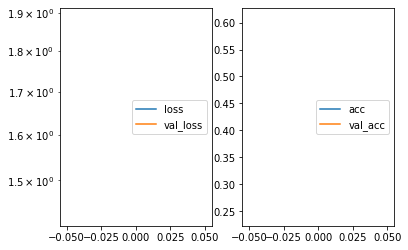

Predicted cell: Cells Probability: [[0.63331807]]
True Cell type: Cells
x [[0.44339484]]
True positional value x 0.2916666666666667
y [[0.7977688]]
True positional value y 0.2916666666666667


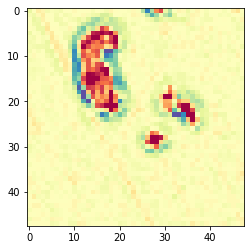

Epoch 2/250
5180/5180 [==============================] - 7s 1ms/step - loss: 1.1784 - acc: 0.7579 - val_loss: 1.0865 - val_acc: 0.8608

Epoch 00002: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 1.086516179881253, 'val_acc': 0.8608058616791889, 'loss': 1.1783642336208389, 'acc': 0.7579150602624223, 'lr': 1e-06}


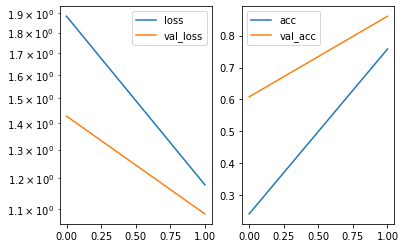

Predicted cell: Cells Probability: [[0.9356678]]
True Cell type: Cells
x [[0.42668146]]
True positional value x 0.2916666666666667
y [[0.38334468]]
True positional value y 0.2916666666666667


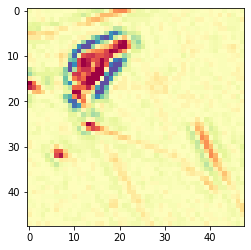

Epoch 3/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.9576 - acc: 0.8635 - val_loss: 0.9954 - val_acc: 0.8718

Epoch 00003: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.9953927513443943, 'val_acc': 0.8717948894797664, 'loss': 0.9575764371161295, 'acc': 0.8635135198652054, 'lr': 1e-06}


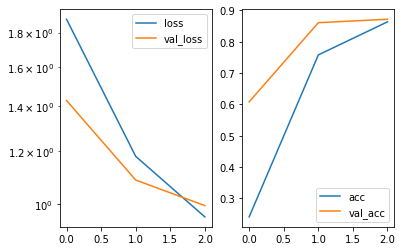

Predicted cell: Cells Probability: [[0.6867699]]
True Cell type: Normal
x [[0.39202672]]
True positional value x 0.5
y [[0.595698]]
True positional value y 0.5


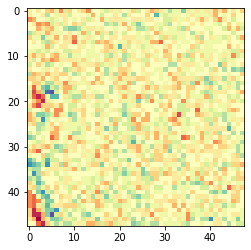

Epoch 4/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.8546 - acc: 0.9023 - val_loss: 0.9091 - val_acc: 0.8828

Epoch 00004: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.9091196837442699, 'val_acc': 0.8827838795089022, 'loss': 0.8545720901728597, 'acc': 0.9023166045719132, 'lr': 1e-06}


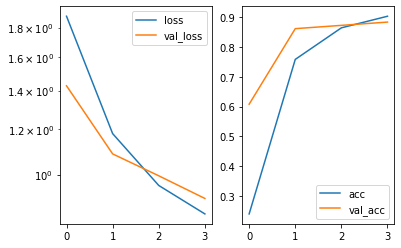

Predicted cell: Cells Probability: [[0.9668679]]
True Cell type: Cells
x [[0.60031384]]
True positional value x 0.7083333333333334
y [[0.49016148]]
True positional value y 0.5


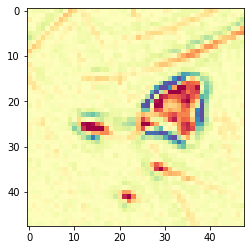

Epoch 5/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.7994 - acc: 0.9504 - val_loss: 0.8655 - val_acc: 0.9524

Epoch 00005: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8655273019175826, 'val_acc': 0.9523809377527063, 'loss': 0.7994207719117978, 'acc': 0.9503861019049832, 'lr': 1e-06}


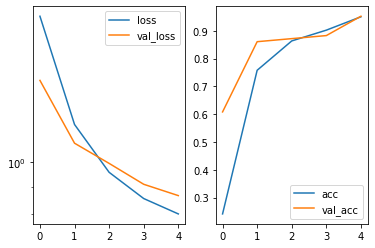

Predicted cell: Cells Probability: [[0.98995703]]
True Cell type: Cells
x [[0.44588545]]
True positional value x 0.2916666666666667
y [[0.6848554]]
True positional value y 0.7083333333333334


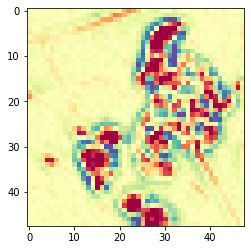

Epoch 6/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.7455 - acc: 0.9581 - val_loss: 0.8266 - val_acc: 0.9670

Epoch 00006: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8265730205909673, 'val_acc': 0.9670329657229748, 'loss': 0.7454541316363802, 'acc': 0.9581081091667234, 'lr': 1e-06}


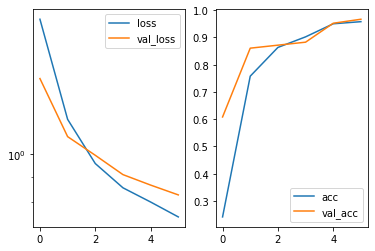

Predicted cell: Normal Probability: [[0.6860824]]
True Cell type: Normal
x [[0.4818312]]
True positional value x 0.5
y [[0.5083872]]
True positional value y 0.5


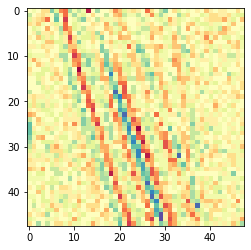

Epoch 7/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.7061 - acc: 0.9639 - val_loss: 0.8044 - val_acc: 0.9817

Epoch 00007: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.8044321026120868, 'val_acc': 0.9816849882349427, 'loss': 0.7061406877970603, 'acc': 0.963899623012911, 'lr': 1e-06}


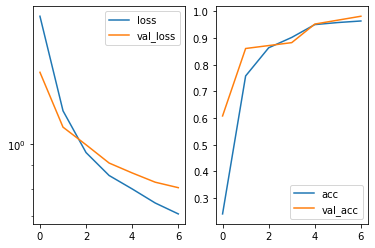

Predicted cell: Cells Probability: [[0.83840394]]
True Cell type: Cells
x [[0.4268771]]
True positional value x 0.5
y [[0.5291179]]
True positional value y 0.5


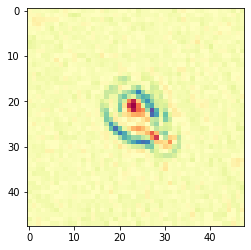

Epoch 8/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.6709 - acc: 0.9683 - val_loss: 0.7929 - val_acc: 0.9817

Epoch 00008: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.792885612655472, 'val_acc': 0.9816849882349427, 'loss': 0.6708558040696222, 'acc': 0.9683397734487379, 'lr': 1e-06}


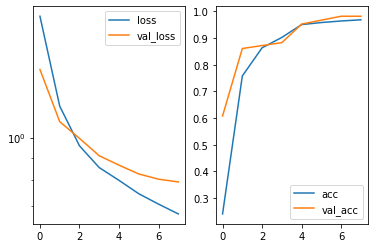

Predicted cell: Cells Probability: [[0.9341917]]
True Cell type: Cells
x [[0.85222685]]
True positional value x 0.7083333333333334
y [[0.39740267]]
True positional value y 0.2916666666666667


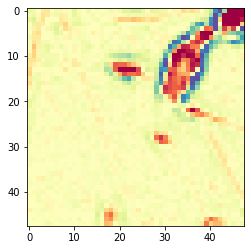

Epoch 9/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.6485 - acc: 0.9722 - val_loss: 0.7866 - val_acc: 0.9817

Epoch 00009: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7865789423495422, 'val_acc': 0.9816849882349427, 'loss': 0.6485122736816701, 'acc': 0.9722007828329521, 'lr': 1e-06}


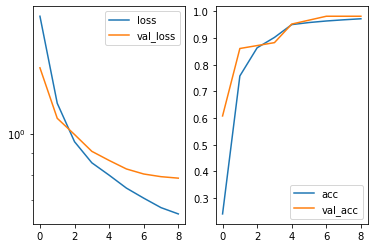

Predicted cell: Normal Probability: [[0.9273347]]
True Cell type: Normal
x [[0.42671832]]
True positional value x 0.5
y [[0.4263898]]
True positional value y 0.5


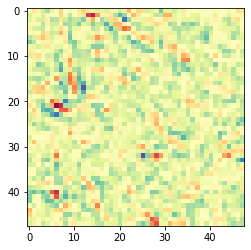

Epoch 10/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.6327 - acc: 0.9724 - val_loss: 0.7846 - val_acc: 0.9817

Epoch 00010: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7845665506827526, 'val_acc': 0.9816849882349427, 'loss': 0.6327131146629805, 'acc': 0.9723938337624303, 'lr': 1e-06}


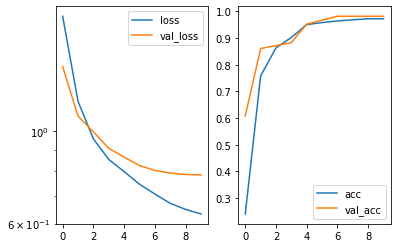

Predicted cell: Cells Probability: [[0.9888911]]
True Cell type: Cells
x [[0.48484984]]
True positional value x 0.7083333333333334
y [[0.73143446]]
True positional value y 0.5


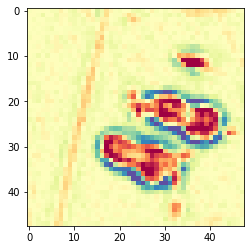

Epoch 11/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.6157 - acc: 0.9732 - val_loss: 0.7779 - val_acc: 0.9817

Epoch 00011: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7778508230880067, 'val_acc': 0.9816849882349427, 'loss': 0.6156820788346663, 'acc': 0.973166032877668, 'lr': 1e-06}


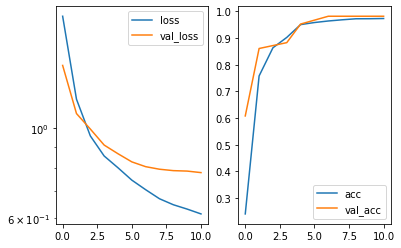

Predicted cell: Cells Probability: [[0.89640075]]
True Cell type: Cells
x [[0.18497376]]
True positional value x 0.2916666666666667
y [[0.70735925]]
True positional value y 0.5


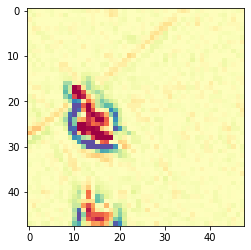

Epoch 12/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.6018 - acc: 0.9732 - val_loss: 0.7738 - val_acc: 0.9817

Epoch 00012: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.773827884660099, 'val_acc': 0.9816849882349427, 'loss': 0.60181093008822, 'acc': 0.9731660326475342, 'lr': 1e-06}


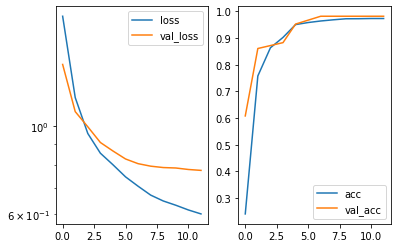

Predicted cell: Cells Probability: [[0.798897]]
True Cell type: Cells
x [[0.44701213]]
True positional value x 0.2916666666666667
y [[0.6618027]]
True positional value y 0.7083333333333334


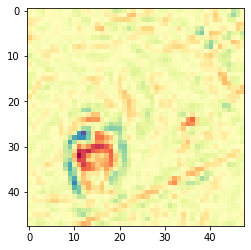

Epoch 13/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.5913 - acc: 0.9732 - val_loss: 0.7698 - val_acc: 0.9817

Epoch 00013: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7697674660455613, 'val_acc': 0.9816849882349427, 'loss': 0.5913343662000531, 'acc': 0.9731660317269992, 'lr': 1e-06}


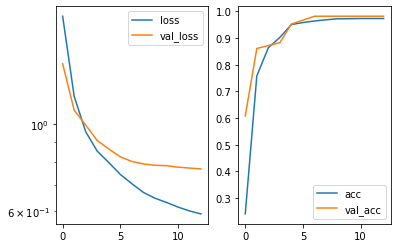

Predicted cell: Cells Probability: [[0.9467723]]
True Cell type: Cells
x [[0.32688838]]
True positional value x 0.2916666666666667
y [[0.41397876]]
True positional value y 0.2916666666666667


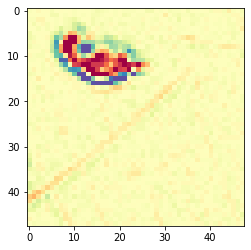

Epoch 14/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.5807 - acc: 0.9743 - val_loss: 0.7690 - val_acc: 0.9817

Epoch 00014: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7690082233904045, 'val_acc': 0.9816849882349427, 'loss': 0.5806975157564671, 'acc': 0.9743243350025309, 'lr': 1e-06}


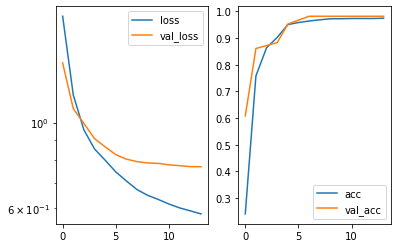

Predicted cell: Cells Probability: [[0.97414464]]
True Cell type: Cells
x [[0.39525726]]
True positional value x 0.5
y [[0.41513664]]
True positional value y 0.5


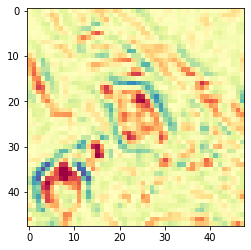

Epoch 15/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.5734 - acc: 0.9745 - val_loss: 0.7647 - val_acc: 0.9817

Epoch 00015: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7646588021582299, 'val_acc': 0.9816849882349427, 'loss': 0.5734483972479478, 'acc': 0.9745173850114741, 'lr': 1e-06}


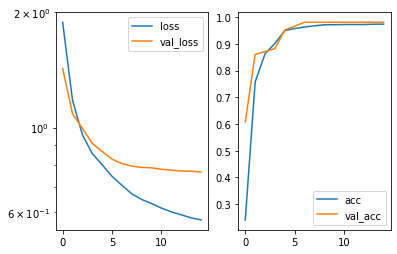

Predicted cell: Cells Probability: [[0.97254395]]
True Cell type: Cells
x [[0.47695205]]
True positional value x 0.2916666666666667
y [[0.7695506]]
True positional value y 0.7083333333333334


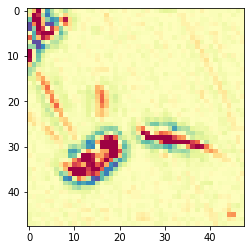

Epoch 16/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.5649 - acc: 0.9751 - val_loss: 0.7657 - val_acc: 0.9817

Epoch 00016: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7656729293393565, 'val_acc': 0.9816849882349427, 'loss': 0.5649199168194214, 'acc': 0.9750965329670999, 'lr': 1e-06}


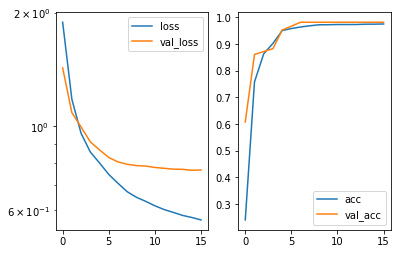

Predicted cell: Cells Probability: [[0.96747154]]
True Cell type: Cells
x [[0.76720846]]
True positional value x 0.7083333333333334
y [[0.5967747]]
True positional value y 0.7083333333333334


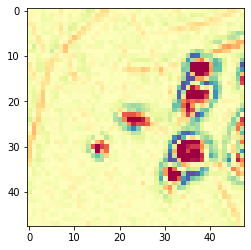

Epoch 17/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.5652 - acc: 0.9755 - val_loss: 0.7626 - val_acc: 0.9817

Epoch 00017: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7626154385643564, 'val_acc': 0.9816849882349427, 'loss': 0.5652204718598988, 'acc': 0.9754826364369926, 'lr': 1e-06}


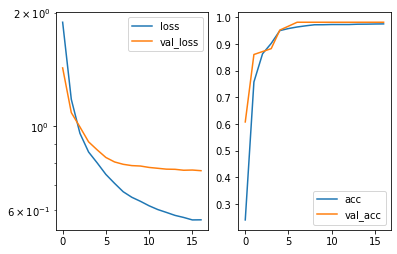

Predicted cell: Cells Probability: [[0.96142644]]
True Cell type: Cells
x [[0.15912998]]
True positional value x 0.2916666666666667
y [[0.6082951]]
True positional value y 0.7083333333333334


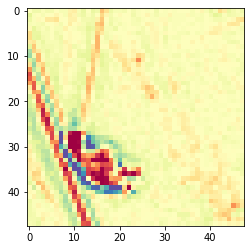

Epoch 18/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.5557 - acc: 0.9755 - val_loss: 0.7632 - val_acc: 0.9817

Epoch 00018: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.763176162819286, 'val_acc': 0.9816849882349427, 'loss': 0.5556694961882926, 'acc': 0.9754826362068588, 'lr': 1e-06}


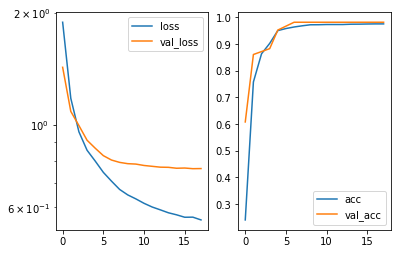

Predicted cell: Cells Probability: [[0.96505016]]
True Cell type: Cells
x [[0.34704238]]
True positional value x 0.5
y [[0.24086873]]
True positional value y 0.2916666666666667


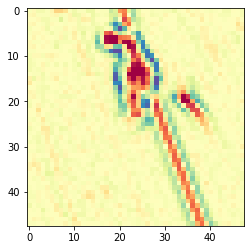

Epoch 19/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.5500 - acc: 0.9751 - val_loss: 0.7614 - val_acc: 0.9817

Epoch 00019: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7613947961356614, 'val_acc': 0.9816849882349427, 'loss': 0.5499718437783967, 'acc': 0.9750965361889725, 'lr': 1e-06}


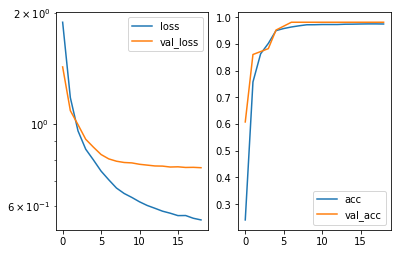

Predicted cell: Cells Probability: [[0.9754008]]
True Cell type: Cells
x [[0.4777353]]
True positional value x 0.2916666666666667
y [[0.76361537]]
True positional value y 0.7083333333333334


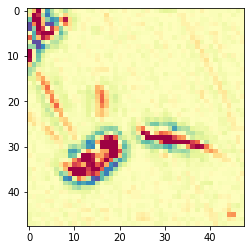

Epoch 20/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.5460 - acc: 0.9759 - val_loss: 0.7620 - val_acc: 0.9817

Epoch 00020: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7619720765085884, 'val_acc': 0.9816849882349427, 'loss': 0.5459933322368902, 'acc': 0.9758687376055478, 'lr': 1e-06}


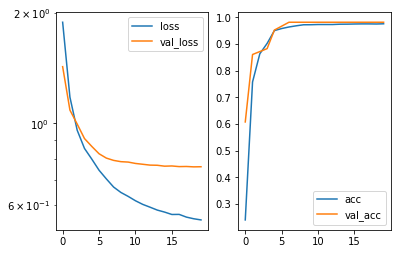

Predicted cell: Cells Probability: [[0.9931466]]
True Cell type: Cells
x [[0.16817828]]
True positional value x 0.7083333333333334
y [[0.34381056]]
True positional value y 0.2916666666666667


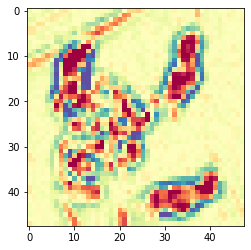

Epoch 21/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.5433 - acc: 0.9764 - val_loss: 0.7610 - val_acc: 0.9817

Epoch 00021: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7609818479517004, 'val_acc': 0.9816849882349427, 'loss': 0.5432710364518478, 'acc': 0.9764478887830462, 'lr': 1e-06}


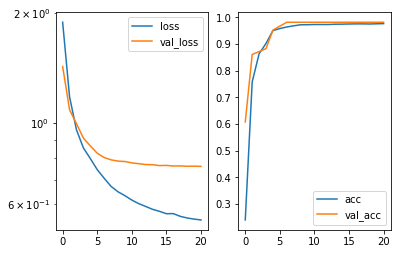

Predicted cell: Cells Probability: [[0.98375976]]
True Cell type: Cells
x [[0.64637786]]
True positional value x 0.5
y [[0.69488215]]
True positional value y 0.7083333333333334


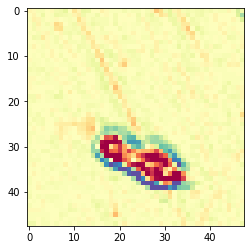

Epoch 22/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.5389 - acc: 0.9759 - val_loss: 0.7613 - val_acc: 0.9817

Epoch 00022: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.761308797549852, 'val_acc': 0.9816849882349427, 'loss': 0.5388677972854334, 'acc': 0.9758687362247452, 'lr': 1e-06}


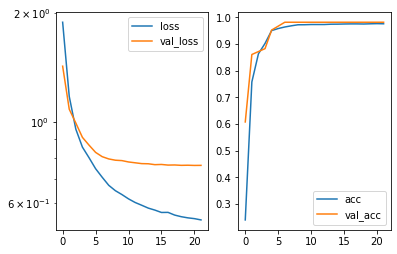

Predicted cell: Cells Probability: [[0.99115413]]
True Cell type: Cells
x [[0.5399682]]
True positional value x 0.5
y [[0.2649019]]
True positional value y 0.5


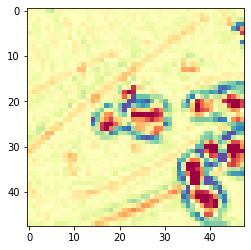

Epoch 23/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.5321 - acc: 0.9763 - val_loss: 0.7608 - val_acc: 0.9817

Epoch 00023: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7608081368736295, 'val_acc': 0.9816849882349427, 'loss': 0.5321440333104962, 'acc': 0.9762548304892875, 'lr': 1e-06}


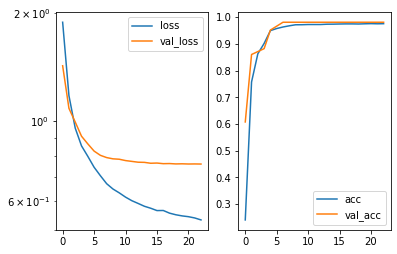

Predicted cell: Cells Probability: [[0.9355622]]
True Cell type: Cells
x [[0.618671]]
True positional value x 0.7083333333333334
y [[0.368896]]
True positional value y 0.5


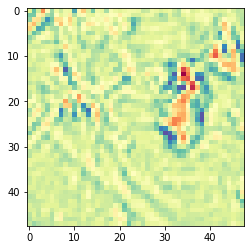

Epoch 24/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.5313 - acc: 0.9763 - val_loss: 0.7606 - val_acc: 0.9817

Epoch 00024: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7606145010326372, 'val_acc': 0.9816849882349427, 'loss': 0.531322460722279, 'acc': 0.976254833941294, 'lr': 1e-06}


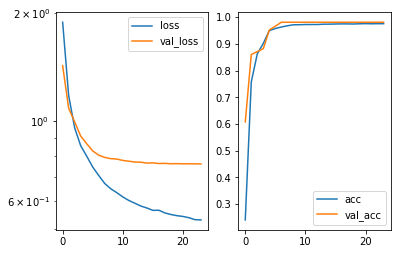

Predicted cell: Cells Probability: [[0.98000354]]
True Cell type: Cells
x [[0.4969597]]
True positional value x 0.5
y [[0.20156054]]
True positional value y 0.5


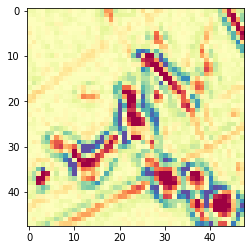

Epoch 25/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.5269 - acc: 0.9768 - val_loss: 0.7614 - val_acc: 0.9817

Epoch 00025: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7613518716214778, 'val_acc': 0.9816849882349427, 'loss': 0.5268634572682693, 'acc': 0.9768339897214676, 'lr': 1e-06}


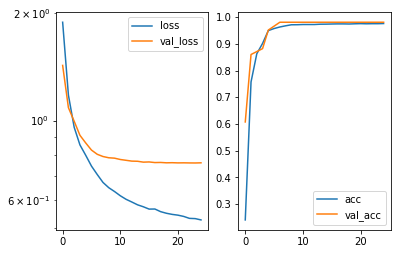

Predicted cell: Cells Probability: [[0.97984743]]
True Cell type: Cells
x [[0.5002744]]
True positional value x 0.5
y [[0.2073227]]
True positional value y 0.2916666666666667


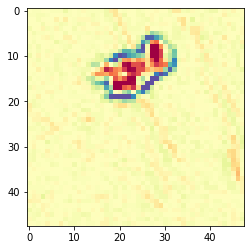

Epoch 26/250
5180/5180 [==============================] - 8s 1ms/step - loss: 0.5261 - acc: 0.9763 - val_loss: 0.7609 - val_acc: 0.9817

Epoch 00026: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7609029713567796, 'val_acc': 0.9816849882349427, 'loss': 0.5261382309856563, 'acc': 0.9762548304892875, 'lr': 1e-06}


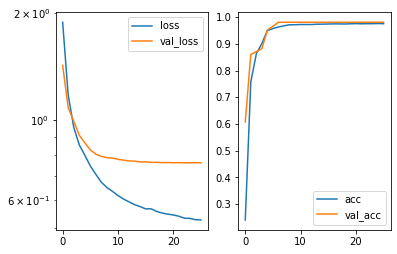

Predicted cell: Cells Probability: [[0.97453237]]
True Cell type: Normal
x [[0.6080904]]
True positional value x 0.5
y [[0.6419437]]
True positional value y 0.5


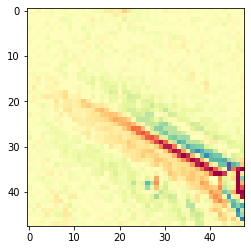

Epoch 27/250
5180/5180 [==============================] - 8s 1ms/step - loss: 0.5253 - acc: 0.9772 - val_loss: 0.7626 - val_acc: 0.9817

Epoch 00027: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7625670919924865, 'val_acc': 0.9816849882349427, 'loss': 0.5252598068428777, 'acc': 0.9772200897393539, 'lr': 1e-06}


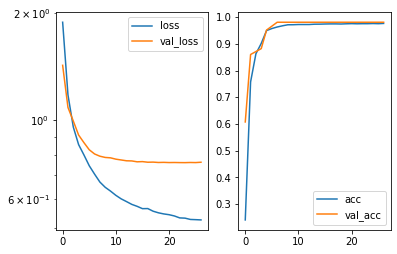

Predicted cell: Cells Probability: [[0.9881918]]
True Cell type: Cells
x [[0.7178468]]
True positional value x 0.7083333333333334
y [[0.12025385]]
True positional value y 0.2916666666666667


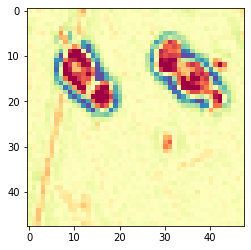

Epoch 28/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.5166 - acc: 0.9766 - val_loss: 0.7619 - val_acc: 0.9817

Epoch 00028: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7619182052629772, 'val_acc': 0.9816849882349427, 'loss': 0.5166298776980073, 'acc': 0.9766409351098492, 'lr': 1e-06}


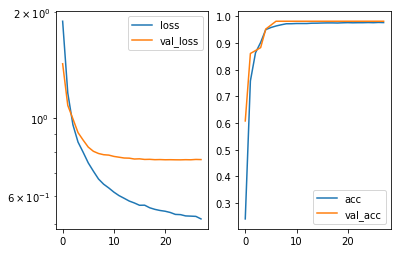

Predicted cell: Normal Probability: [[0.9884376]]
True Cell type: Normal
x [[0.43073863]]
True positional value x 0.5
y [[0.47830844]]
True positional value y 0.5


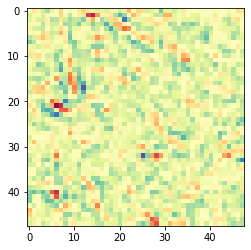

Epoch 29/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.5142 - acc: 0.9772 - val_loss: 0.7597 - val_acc: 0.9817

Epoch 00029: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7596932616862622, 'val_acc': 0.9816849882349427, 'loss': 0.5142220172412607, 'acc': 0.9772200862873475, 'lr': 1e-06}


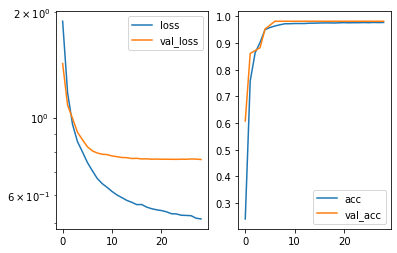

Predicted cell: Cells Probability: [[0.9596676]]
True Cell type: Cells
x [[0.5089508]]
True positional value x 0.5
y [[0.78367823]]
True positional value y 0.7083333333333334


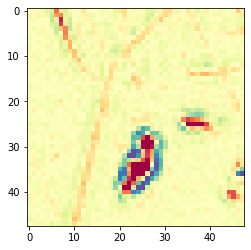

Epoch 30/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.5119 - acc: 0.9770 - val_loss: 0.7582 - val_acc: 0.9817

Epoch 00030: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7581540164930043, 'val_acc': 0.9816849882349427, 'loss': 0.5118728472229136, 'acc': 0.9770270362784044, 'lr': 1e-06}


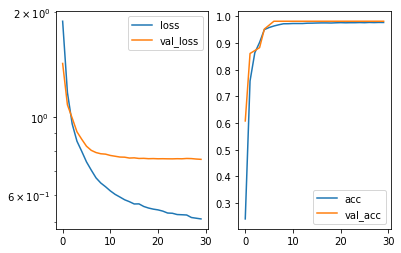

Predicted cell: Cells Probability: [[0.98464936]]
True Cell type: Cells
x [[0.23205535]]
True positional value x 0.2916666666666667
y [[0.36254036]]
True positional value y 0.5


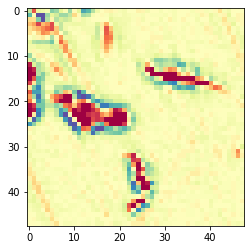

Epoch 31/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.5085 - acc: 0.9772 - val_loss: 0.7571 - val_acc: 0.9817

Epoch 00031: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7570575305393764, 'val_acc': 0.9816849882349427, 'loss': 0.508512564262368, 'acc': 0.9772200862873475, 'lr': 1e-06}


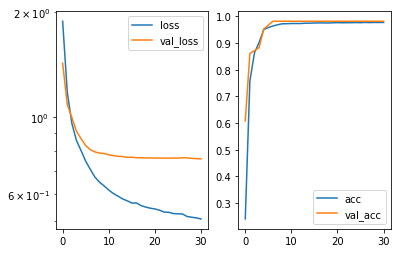

Predicted cell: Normal Probability: [[0.9697325]]
True Cell type: Normal
x [[0.4201877]]
True positional value x 0.5
y [[0.5374322]]
True positional value y 0.5


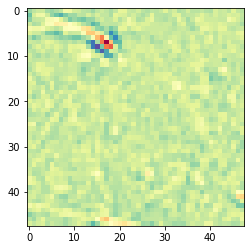

Epoch 32/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.5120 - acc: 0.9768 - val_loss: 0.7571 - val_acc: 0.9817

Epoch 00032: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7571386983106424, 'val_acc': 0.9816849882349427, 'loss': 0.5120328050322515, 'acc': 0.9768339888009325, 'lr': 1e-06}


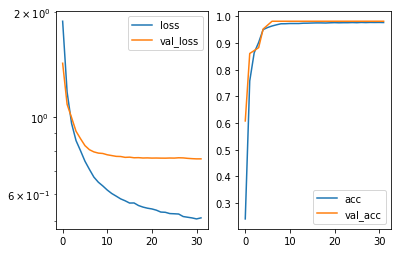

Predicted cell: Normal Probability: [[0.9878137]]
True Cell type: Normal
x [[0.5426755]]
True positional value x 0.5
y [[0.50283384]]
True positional value y 0.5


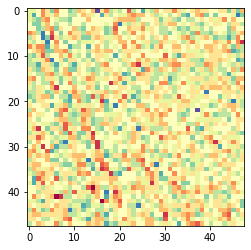

Epoch 33/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.5078 - acc: 0.9776 - val_loss: 0.7570 - val_acc: 0.9817

Epoch 00033: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7570215675420376, 'val_acc': 0.9816849882349427, 'loss': 0.5077823688164641, 'acc': 0.97760618423403, 'lr': 1e-06}


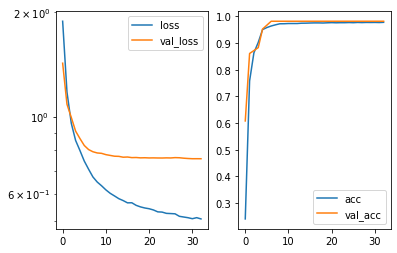

Predicted cell: Cells Probability: [[0.9204238]]
True Cell type: Cells
x [[0.6025295]]
True positional value x 0.5
y [[0.52854794]]
True positional value y 0.2916666666666667


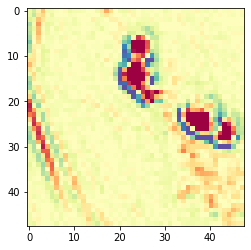

Epoch 34/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.5068 - acc: 0.9778 - val_loss: 0.7574 - val_acc: 0.9817

Epoch 00034: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7574261232610151, 'val_acc': 0.9816849882349427, 'loss': 0.5067603221040895, 'acc': 0.9777992386155147, 'lr': 1e-06}


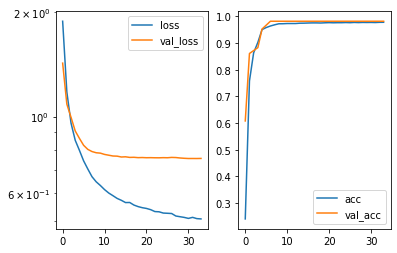

Predicted cell: Cells Probability: [[0.98146445]]
True Cell type: Cells
x [[0.77919465]]
True positional value x 0.7083333333333334
y [[0.22897397]]
True positional value y 0.2916666666666667


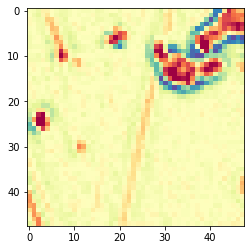

Epoch 35/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.5061 - acc: 0.9780 - val_loss: 0.7559 - val_acc: 0.9817

Epoch 00035: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7558783015488705, 'val_acc': 0.9816849882349427, 'loss': 0.5061492044262904, 'acc': 0.9779922911559292, 'lr': 1e-06}


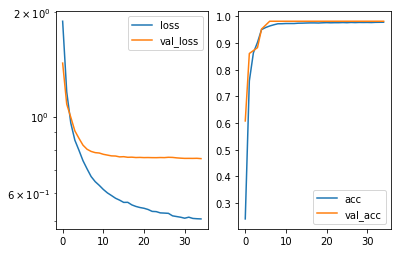

Predicted cell: Cells Probability: [[0.94708997]]
True Cell type: Cells
x [[0.509134]]
True positional value x 0.7083333333333334
y [[0.6583882]]
True positional value y 0.5


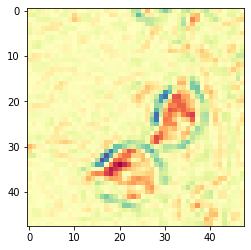

Epoch 36/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.5008 - acc: 0.9786 - val_loss: 0.7578 - val_acc: 0.9817

Epoch 00036: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7577960111282684, 'val_acc': 0.9816849882349427, 'loss': 0.5008453244638259, 'acc': 0.978571440952625, 'lr': 1e-06}


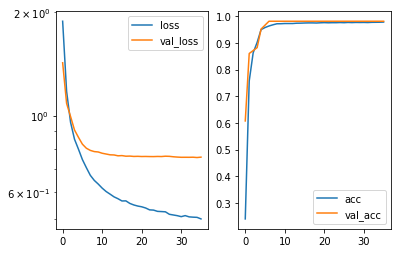

Predicted cell: Cells Probability: [[0.992262]]
True Cell type: Cells
x [[0.6371367]]
True positional value x 0.5
y [[0.65203667]]
True positional value y 0.2916666666666667


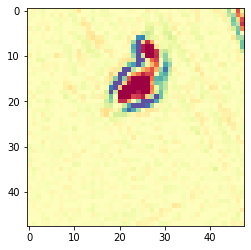

Epoch 37/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.5015 - acc: 0.9786 - val_loss: 0.7585 - val_acc: 0.9817

Epoch 00037: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7584818848323472, 'val_acc': 0.9816849882349427, 'loss': 0.501451997913449, 'acc': 0.9785714386512874, 'lr': 1e-06}


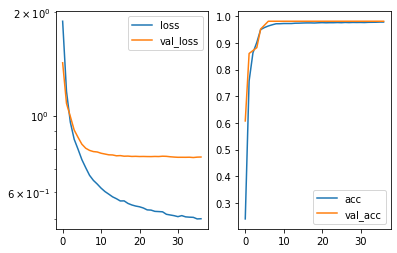

Predicted cell: Cells Probability: [[0.976773]]
True Cell type: Cells
x [[0.32851794]]
True positional value x 0.5
y [[0.5444516]]
True positional value y 0.5


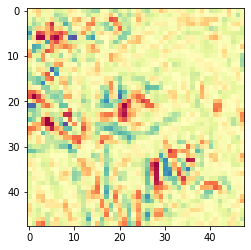

Epoch 38/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4968 - acc: 0.9790 - val_loss: 0.7582 - val_acc: 0.9817

Epoch 00038: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.758230888363206, 'val_acc': 0.9816849882349427, 'loss': 0.4967734292437211, 'acc': 0.9789575398198426, 'lr': 1e-06}


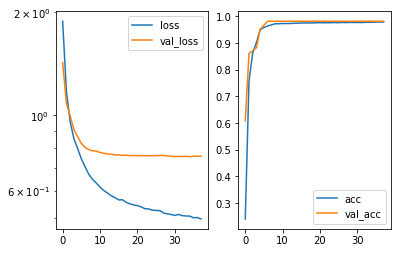

Predicted cell: Cells Probability: [[0.9860243]]
True Cell type: Cells
x [[0.41838577]]
True positional value x 0.7083333333333334
y [[0.32860917]]
True positional value y 0.2916666666666667


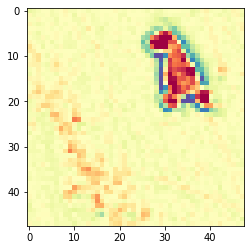

Epoch 39/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4952 - acc: 0.9790 - val_loss: 0.7578 - val_acc: 0.9817

Epoch 00039: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.757841265681899, 'val_acc': 0.9816849882349427, 'loss': 0.49515070372106484, 'acc': 0.9789575400499764, 'lr': 1e-06}


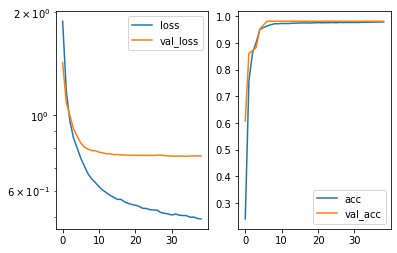

Predicted cell: Cells Probability: [[0.9748378]]
True Cell type: Cells
x [[0.6781242]]
True positional value x 0.7083333333333334
y [[0.43410033]]
True positional value y 0.7083333333333334


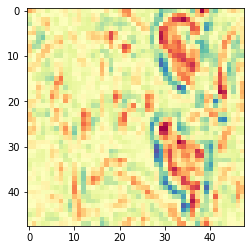

Epoch 40/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4934 - acc: 0.9788 - val_loss: 0.7573 - val_acc: 0.9817

Epoch 00040: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7572528029972817, 'val_acc': 0.9816849882349427, 'loss': 0.4934256747652665, 'acc': 0.9787644909615683, 'lr': 1e-06}


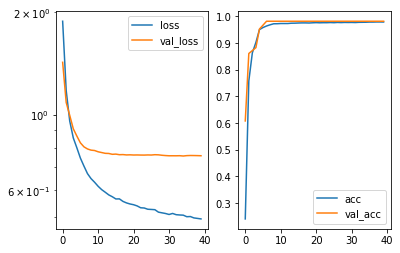

Predicted cell: Cells Probability: [[0.9656488]]
True Cell type: Cells
x [[0.5122731]]
True positional value x 0.5
y [[0.785804]]
True positional value y 0.7083333333333334


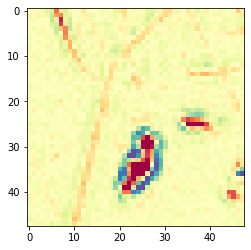

Epoch 41/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4935 - acc: 0.9792 - val_loss: 0.7561 - val_acc: 0.9817

Epoch 00041: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7560554114016858, 'val_acc': 0.9816849882349427, 'loss': 0.49347970223334764, 'acc': 0.979150588678117, 'lr': 1e-06}


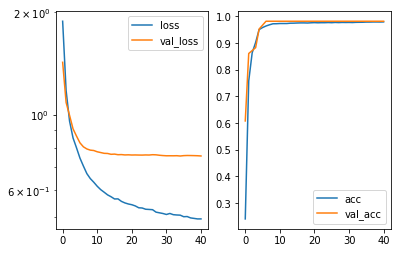

Predicted cell: Cells Probability: [[0.9836421]]
True Cell type: Cells
x [[0.36915812]]
True positional value x 0.5
y [[0.37447912]]
True positional value y 0.5


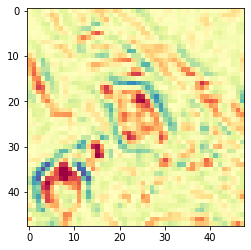

Epoch 42/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4891 - acc: 0.9793 - val_loss: 0.7572 - val_acc: 0.9817

Epoch 00042: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7571660441793365, 'val_acc': 0.9816849882349427, 'loss': 0.4891232099082019, 'acc': 0.9793436386870601, 'lr': 1e-06}


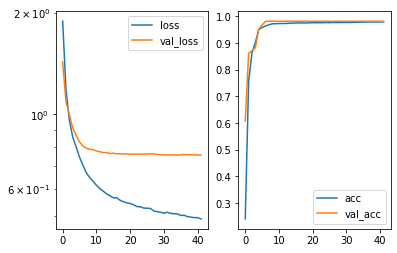

Predicted cell: Cells Probability: [[0.9942326]]
True Cell type: Cells
x [[0.6270871]]
True positional value x 0.2916666666666667
y [[0.38895744]]
True positional value y 0.5


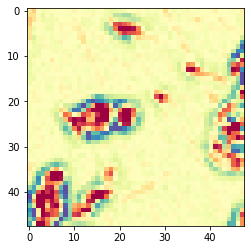

Epoch 43/250
5180/5180 [==============================] - 8s 1ms/step - loss: 0.4889 - acc: 0.9795 - val_loss: 0.7567 - val_acc: 0.9817

Epoch 00043: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7567056068133958, 'val_acc': 0.9816849882349427, 'loss': 0.48885546653427214, 'acc': 0.9795366912274748, 'lr': 1e-06}


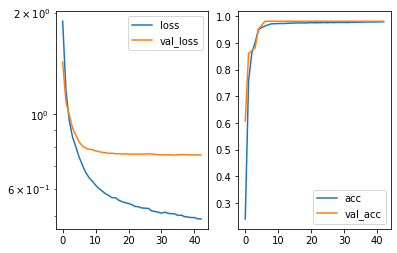

Predicted cell: Normal Probability: [[0.97794294]]
True Cell type: Normal
x [[0.42504644]]
True positional value x 0.5
y [[0.5454089]]
True positional value y 0.5


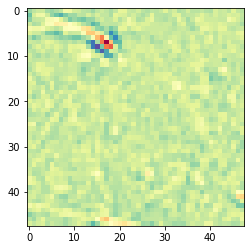

Epoch 44/250
5180/5180 [==============================] - 8s 1ms/step - loss: 0.4883 - acc: 0.9805 - val_loss: 0.7558 - val_acc: 0.9817

Epoch 00044: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.755807333158486, 'val_acc': 0.9816849882349427, 'loss': 0.48834239032737997, 'acc': 0.9805019421927257, 'lr': 1e-06}


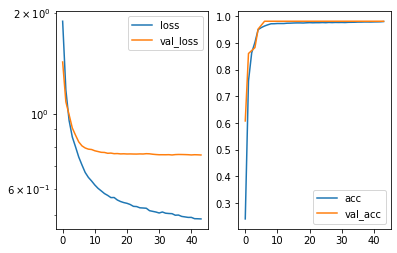

Predicted cell: Cells Probability: [[0.9906714]]
True Cell type: Cells
x [[0.6869007]]
True positional value x 0.7083333333333334
y [[0.26648745]]
True positional value y 0.5


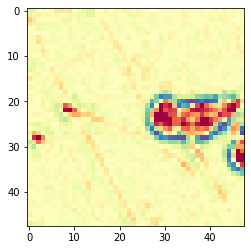

Epoch 45/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4907 - acc: 0.9792 - val_loss: 0.7545 - val_acc: 0.9817

Epoch 00045: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7545393635501791, 'val_acc': 0.9816849882349427, 'loss': 0.4907231570210696, 'acc': 0.9791505909794546, 'lr': 1e-06}


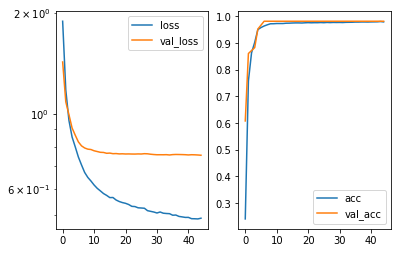

Predicted cell: Cells Probability: [[0.98283374]]
True Cell type: Cells
x [[0.7760029]]
True positional value x 0.7083333333333334
y [[0.68989664]]
True positional value y 0.7083333333333334


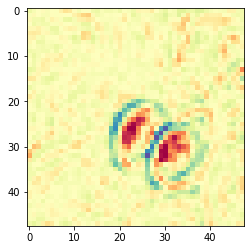

Epoch 46/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4852 - acc: 0.9807 - val_loss: 0.7552 - val_acc: 0.9817

Epoch 00046: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7552100037917112, 'val_acc': 0.9816849882349427, 'loss': 0.4852174515889878, 'acc': 0.9806949933523377, 'lr': 1e-06}


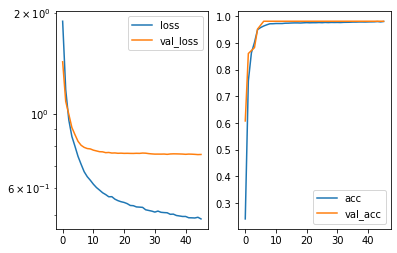

Predicted cell: Cells Probability: [[0.9213522]]
True Cell type: Cells
x [[0.43552724]]
True positional value x 0.5
y [[0.5618237]]
True positional value y 0.5


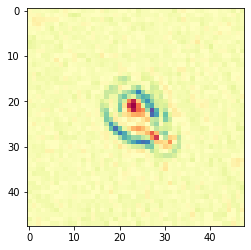

Epoch 47/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4853 - acc: 0.9803 - val_loss: 0.7558 - val_acc: 0.9817

Epoch 00047: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7558498646750118, 'val_acc': 0.9816849882349427, 'loss': 0.48534710872127285, 'acc': 0.980308888731776, 'lr': 1e-06}


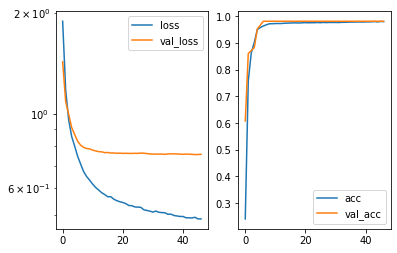

Predicted cell: Cells Probability: [[0.9951929]]
True Cell type: Cells
x [[0.36268574]]
True positional value x 0.2916666666666667
y [[0.44977054]]
True positional value y 0.7083333333333334


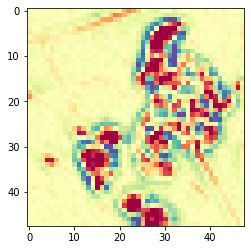

Epoch 48/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4847 - acc: 0.9805 - val_loss: 0.7571 - val_acc: 0.9817

Epoch 00048: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7571163101074023, 'val_acc': 0.9816849882349427, 'loss': 0.4846955779436472, 'acc': 0.9805019401215218, 'lr': 1e-06}


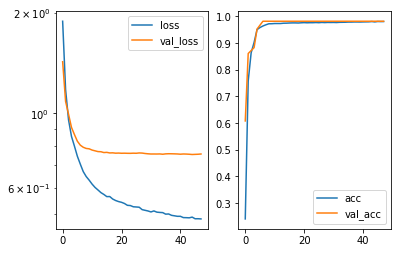

Predicted cell: Cells Probability: [[0.9748513]]
True Cell type: Cells
x [[0.41320604]]
True positional value x 0.5
y [[0.3667034]]
True positional value y 0.2916666666666667


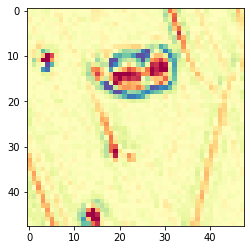

Epoch 49/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4823 - acc: 0.9817 - val_loss: 0.7560 - val_acc: 0.9817

Epoch 00049: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7560375797879565, 'val_acc': 0.9816849882349427, 'loss': 0.48231611380705963, 'acc': 0.9816602376437095, 'lr': 1e-06}


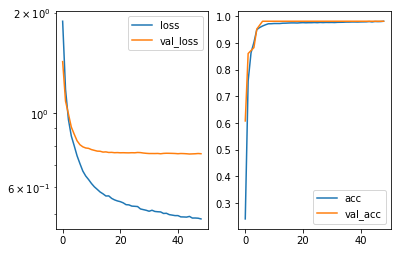

Predicted cell: Cells Probability: [[0.9734674]]
True Cell type: Cells
x [[0.40347576]]
True positional value x 0.2916666666666667
y [[0.68933374]]
True positional value y 0.7083333333333334


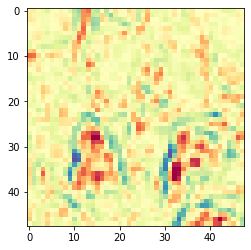

Epoch 50/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4813 - acc: 0.9815 - val_loss: 0.7550 - val_acc: 0.9817

Epoch 00050: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7549691663120256, 'val_acc': 0.9816849882349427, 'loss': 0.48128542258012247, 'acc': 0.9814671933881104, 'lr': 1e-06}


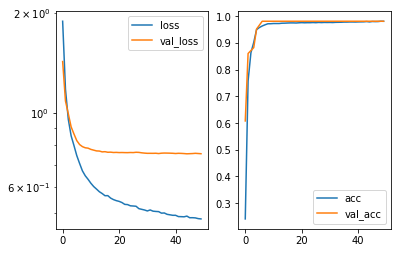

Predicted cell: Cells Probability: [[0.99641466]]
True Cell type: Cells
x [[0.3039653]]
True positional value x 0.5
y [[0.27931142]]
True positional value y 0.2916666666666667


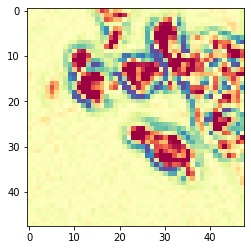

Epoch 51/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4796 - acc: 0.9811 - val_loss: 0.7553 - val_acc: 0.9817

Epoch 00051: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7552577462388482, 'val_acc': 0.9816849882349427, 'loss': 0.47958455364216246, 'acc': 0.9810810887675487, 'lr': 1e-06}


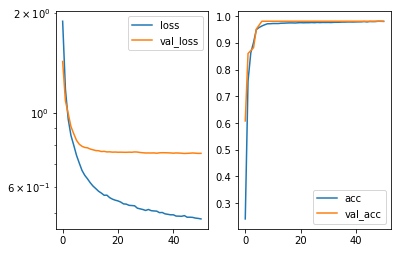

Predicted cell: Cells Probability: [[0.99064165]]
True Cell type: Cells
x [[0.8668331]]
True positional value x 0.7083333333333334
y [[0.72309977]]
True positional value y 0.5


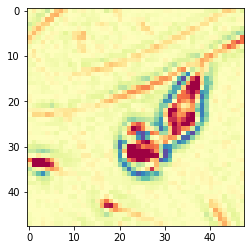

Epoch 52/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4810 - acc: 0.9819 - val_loss: 0.7555 - val_acc: 0.9817

Epoch 00052: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7555323070658869, 'val_acc': 0.9816849882349427, 'loss': 0.48100688259573976, 'acc': 0.9818532934059968, 'lr': 1e-06}


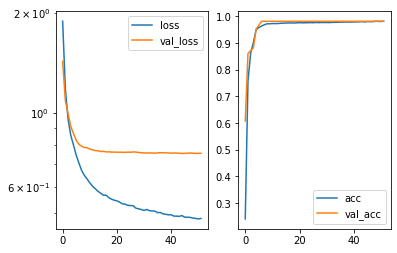

Predicted cell: Cells Probability: [[0.8795681]]
True Cell type: Cells
x [[0.5027106]]
True positional value x 0.7083333333333334
y [[0.4107015]]
True positional value y 0.2916666666666667


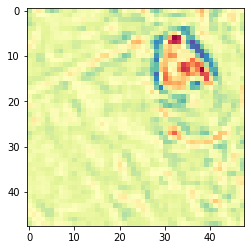

Epoch 53/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4773 - acc: 0.9815 - val_loss: 0.7536 - val_acc: 0.9817

Epoch 00053: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7535875481126946, 'val_acc': 0.9816849882349427, 'loss': 0.47726216946789657, 'acc': 0.9814671933881104, 'lr': 1e-06}


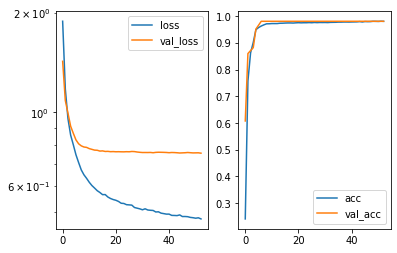

Predicted cell: Cells Probability: [[0.9648254]]
True Cell type: Cells
x [[0.38698894]]
True positional value x 0.2916666666666667
y [[0.5332233]]
True positional value y 0.2916666666666667


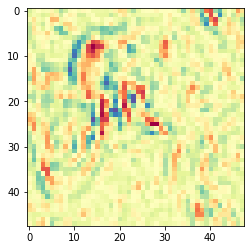

Epoch 54/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4759 - acc: 0.9830 - val_loss: 0.7531 - val_acc: 0.9817

Epoch 00054: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7531165000283238, 'val_acc': 0.9816849882349427, 'loss': 0.47594298911370825, 'acc': 0.9830115934596558, 'lr': 1e-06}


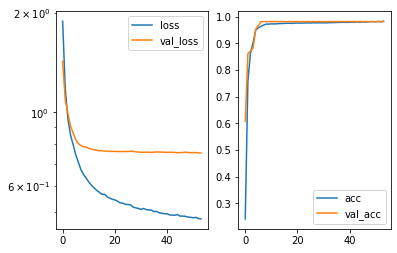

Predicted cell: Cells Probability: [[0.9653667]]
True Cell type: Cells
x [[0.36208698]]
True positional value x 0.2916666666666667
y [[0.7695708]]
True positional value y 0.7083333333333334


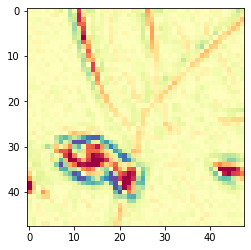

Epoch 55/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4760 - acc: 0.9830 - val_loss: 0.7544 - val_acc: 0.9817

Epoch 00055: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7543981116769951, 'val_acc': 0.9816849882349427, 'loss': 0.4760446358601559, 'acc': 0.9830115900076494, 'lr': 1e-06}


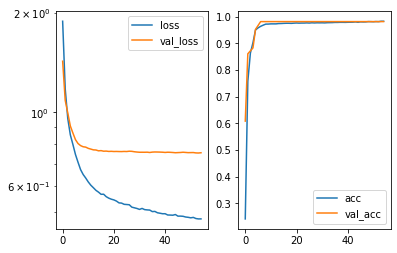

Predicted cell: Cells Probability: [[0.9809326]]
True Cell type: Cells
x [[0.57083774]]
True positional value x 0.2916666666666667
y [[0.7062306]]
True positional value y 0.5


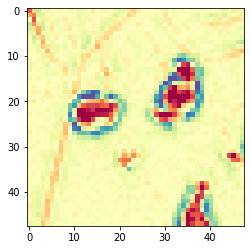

Epoch 56/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4755 - acc: 0.9834 - val_loss: 0.7543 - val_acc: 0.9853

Epoch 00056: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7543235349131154, 'val_acc': 0.9853479938629346, 'loss': 0.4755283261588181, 'acc': 0.9833976934775422, 'lr': 1e-06}


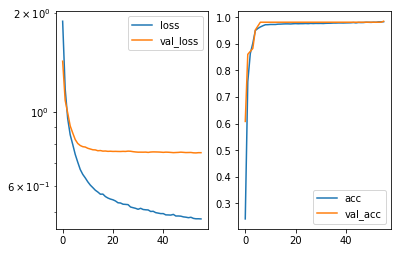

Predicted cell: Cells Probability: [[0.99409467]]
True Cell type: Cells
x [[0.6345269]]
True positional value x 0.5
y [[0.6630353]]
True positional value y 0.2916666666666667


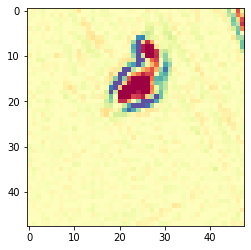

Epoch 57/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4738 - acc: 0.9842 - val_loss: 0.7536 - val_acc: 0.9817

Epoch 00057: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7535506115728245, 'val_acc': 0.9816849882349427, 'loss': 0.47384515657848375, 'acc': 0.9841698960447863, 'lr': 1e-06}


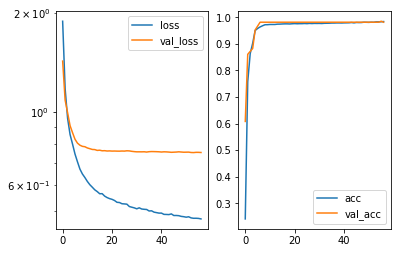

Predicted cell: Cells Probability: [[0.99427396]]
True Cell type: Cells
x [[0.6367596]]
True positional value x 0.5
y [[0.66116375]]
True positional value y 0.2916666666666667


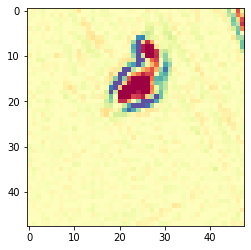

Epoch 58/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4726 - acc: 0.9836 - val_loss: 0.7534 - val_acc: 0.9817

Epoch 00058: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7533629248430441, 'val_acc': 0.9816849882349427, 'loss': 0.472625935860122, 'acc': 0.9835907423358166, 'lr': 1e-06}


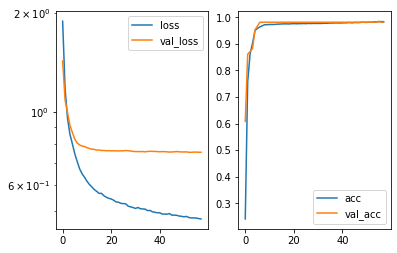

Predicted cell: Cells Probability: [[0.98857087]]
True Cell type: Cells
x [[0.57254344]]
True positional value x 0.7083333333333334
y [[0.72699463]]
True positional value y 0.7083333333333334


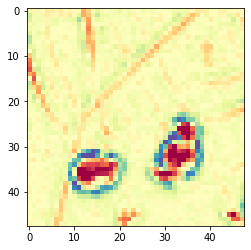

Epoch 59/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4702 - acc: 0.9859 - val_loss: 0.7530 - val_acc: 0.9853

Epoch 00059: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7530415988230443, 'val_acc': 0.9853479938629346, 'loss': 0.4702361755389504, 'acc': 0.9859073470458101, 'lr': 1e-06}


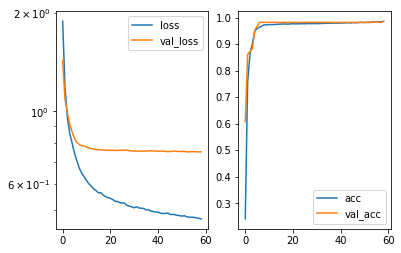

Predicted cell: Cells Probability: [[0.9884741]]
True Cell type: Cells
x [[0.5709855]]
True positional value x 0.7083333333333334
y [[0.7278865]]
True positional value y 0.7083333333333334


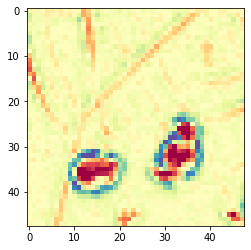

Epoch 60/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4729 - acc: 0.9836 - val_loss: 0.7528 - val_acc: 0.9853

Epoch 00060: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7527674770617223, 'val_acc': 0.9853479938629346, 'loss': 0.47292267275132727, 'acc': 0.983590744867288, 'lr': 1e-06}


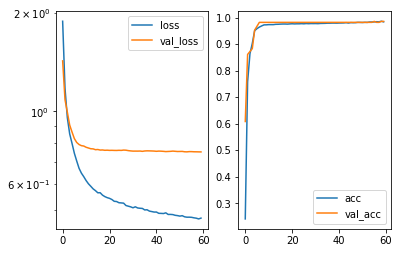

Predicted cell: Cells Probability: [[0.9676212]]
True Cell type: Cells
x [[0.390692]]
True positional value x 0.2916666666666667
y [[0.53165126]]
True positional value y 0.2916666666666667


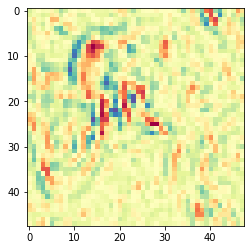

Epoch 61/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4719 - acc: 0.9857 - val_loss: 0.7518 - val_acc: 0.9817

Epoch 00061: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7517827913001344, 'val_acc': 0.9816849882349427, 'loss': 0.4718762893934508, 'acc': 0.9857142935848604, 'lr': 1e-06}


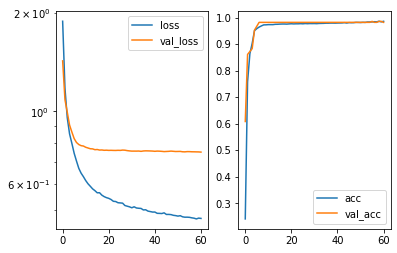

Predicted cell: Cells Probability: [[0.9909025]]
True Cell type: Cells
x [[0.5210355]]
True positional value x 0.7083333333333334
y [[0.5396001]]
True positional value y 0.5


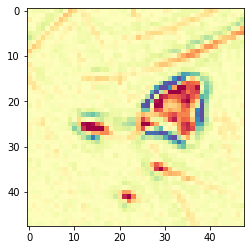

Epoch 62/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4679 - acc: 0.9871 - val_loss: 0.7524 - val_acc: 0.9817

Epoch 00062: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7524437535376776, 'val_acc': 0.9816849882349427, 'loss': 0.46794537779907464, 'acc': 0.9870656447981315, 'lr': 1e-06}


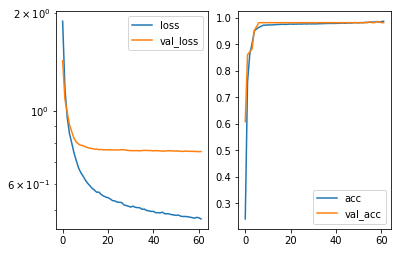

Predicted cell: Cells Probability: [[0.9914385]]
True Cell type: Cells
x [[0.8695362]]
True positional value x 0.7083333333333334
y [[0.71804565]]
True positional value y 0.5


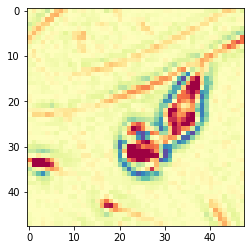

Epoch 63/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4669 - acc: 0.9869 - val_loss: 0.7528 - val_acc: 0.9853

Epoch 00063: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.752846632248316, 'val_acc': 0.9853479938629346, 'loss': 0.46694748868813385, 'acc': 0.9868725982411948, 'lr': 1e-06}


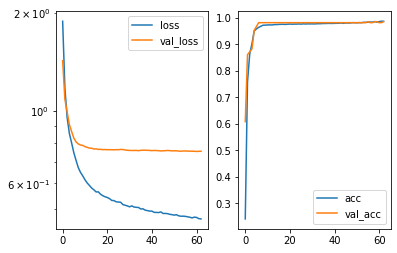

Predicted cell: Cells Probability: [[0.9684332]]
True Cell type: Cells
x [[0.39571854]]
True positional value x 0.2916666666666667
y [[0.5782629]]
True positional value y 0.5


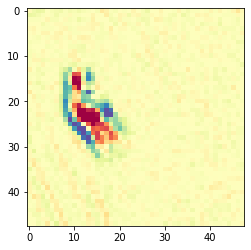

Epoch 64/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4667 - acc: 0.9869 - val_loss: 0.7518 - val_acc: 0.9853

Epoch 00064: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7518235591305045, 'val_acc': 0.9853479938629346, 'loss': 0.46666840846474106, 'acc': 0.9868725950193221, 'lr': 1e-06}


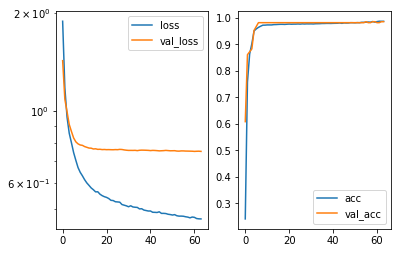

Predicted cell: Cells Probability: [[0.9714163]]
True Cell type: Cells
x [[0.51375663]]
True positional value x 0.5
y [[0.79548544]]
True positional value y 0.7083333333333334


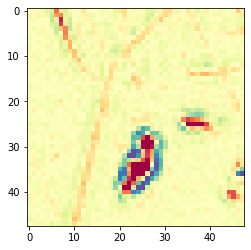

Epoch 65/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4651 - acc: 0.9888 - val_loss: 0.7514 - val_acc: 0.9853

Epoch 00065: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7514197042573503, 'val_acc': 0.9853479938629346, 'loss': 0.46514789765866105, 'acc': 0.9888030983306266, 'lr': 1e-06}


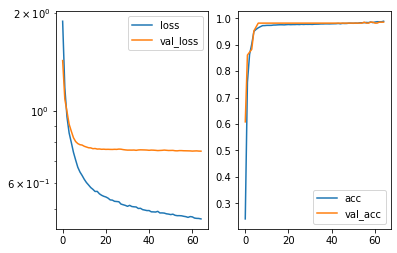

Predicted cell: Cells Probability: [[0.90203595]]
True Cell type: Cells
x [[0.68701935]]
True positional value x 0.7083333333333334
y [[0.48821318]]
True positional value y 0.2916666666666667


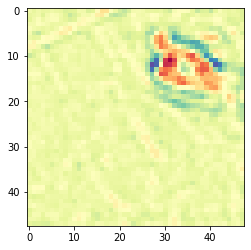

Epoch 66/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4663 - acc: 0.9882 - val_loss: 0.7511 - val_acc: 0.9853

Epoch 00066: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.751095135351677, 'val_acc': 0.9853479938629346, 'loss': 0.4662889157022749, 'acc': 0.9882239483037971, 'lr': 1e-06}


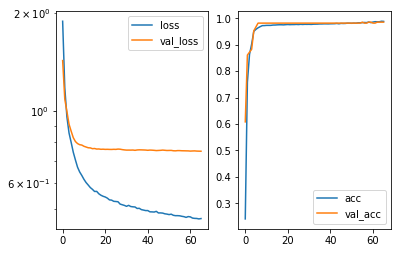

Predicted cell: Cells Probability: [[0.9920839]]
True Cell type: Cells
x [[0.7571768]]
True positional value x 0.5
y [[0.3961998]]
True positional value y 0.2916666666666667


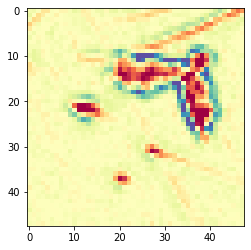

Epoch 67/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4649 - acc: 0.9884 - val_loss: 0.7518 - val_acc: 0.9853

Epoch 00067: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7518202861150106, 'val_acc': 0.9853479938629346, 'loss': 0.4649246393713712, 'acc': 0.9884169948607338, 'lr': 1e-06}


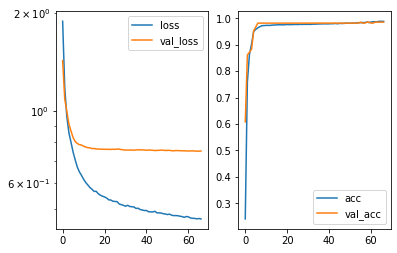

Predicted cell: Cells Probability: [[0.9922627]]
True Cell type: Cells
x [[0.7559402]]
True positional value x 0.5
y [[0.39479005]]
True positional value y 0.2916666666666667


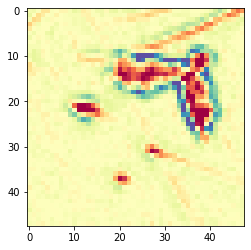

Epoch 68/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4659 - acc: 0.9890 - val_loss: 0.7509 - val_acc: 0.9853

Epoch 00068: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7508917289339142, 'val_acc': 0.9853479938629346, 'loss': 0.46594148621135695, 'acc': 0.9889961471889009, 'lr': 1e-06}


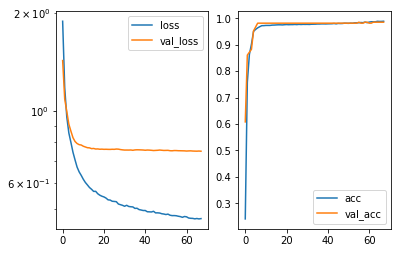

Predicted cell: Normal Probability: [[0.97468096]]
True Cell type: Normal
x [[0.59889096]]
True positional value x 0.5
y [[0.43046784]]
True positional value y 0.5


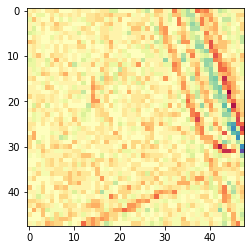

Epoch 69/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4644 - acc: 0.9907 - val_loss: 0.7506 - val_acc: 0.9853

Epoch 00069: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7505951032533751, 'val_acc': 0.9853479938629346, 'loss': 0.4643552481667876, 'acc': 0.9907335972693896, 'lr': 1e-06}


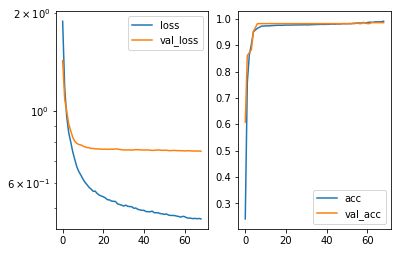

Predicted cell: Cells Probability: [[0.9980204]]
True Cell type: Cells
x [[0.7455533]]
True positional value x 0.5
y [[0.6521311]]
True positional value y 0.5


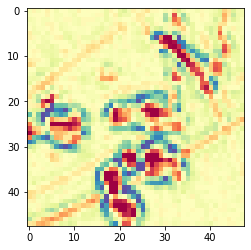

Epoch 70/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4645 - acc: 0.9900 - val_loss: 0.7514 - val_acc: 0.9853

Epoch 00070: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7514036236665188, 'val_acc': 0.9853479938629346, 'loss': 0.4644509756427014, 'acc': 0.9899613995349545, 'lr': 1e-06}


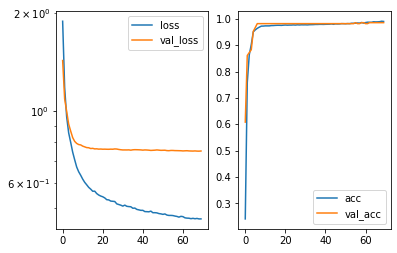

Predicted cell: Cells Probability: [[0.99123806]]
True Cell type: Cells
x [[0.53248155]]
True positional value x 0.2916666666666667
y [[0.75582594]]
True positional value y 0.7083333333333334


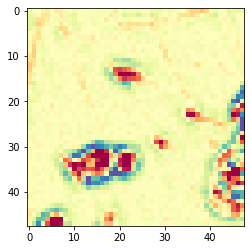

Epoch 71/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4631 - acc: 0.9917 - val_loss: 0.7517 - val_acc: 0.9853

Epoch 00071: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.751746749703264, 'val_acc': 0.9853479938629346, 'loss': 0.46312635906874905, 'acc': 0.9916988484647743, 'lr': 1e-06}


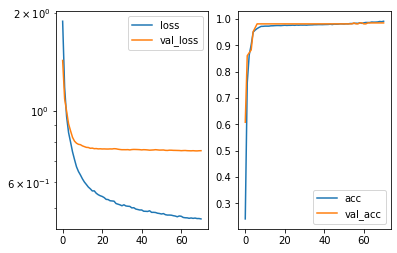

Predicted cell: Cells Probability: [[0.9887812]]
True Cell type: Cells
x [[0.70201665]]
True positional value x 0.7083333333333334
y [[0.5791034]]
True positional value y 0.2916666666666667


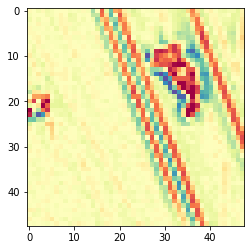

Epoch 72/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4630 - acc: 0.9917 - val_loss: 0.7518 - val_acc: 0.9853

Epoch 00072: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7518236132768484, 'val_acc': 0.9853479938629346, 'loss': 0.46295996740978196, 'acc': 0.9916988484647743, 'lr': 1e-06}


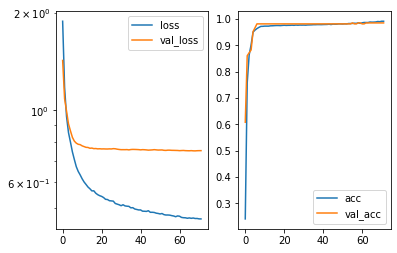

Predicted cell: Cells Probability: [[0.9771324]]
True Cell type: Cells
x [[0.6706666]]
True positional value x 0.5
y [[0.3242364]]
True positional value y 0.2916666666666667


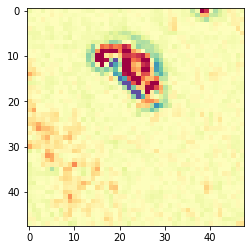

Epoch 73/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4610 - acc: 0.9923 - val_loss: 0.7514 - val_acc: 0.9853

Epoch 00073: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7514114355866289, 'val_acc': 0.9853479938629346, 'loss': 0.46103541777400897, 'acc': 0.9922779961902662, 'lr': 1e-06}


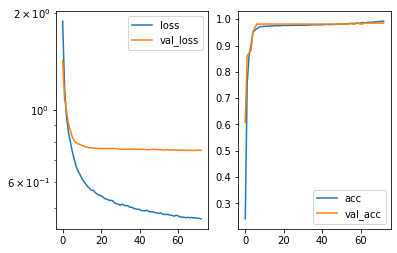

Predicted cell: Cells Probability: [[0.9927071]]
True Cell type: Cells
x [[0.5907392]]
True positional value x 0.7083333333333334
y [[0.31315005]]
True positional value y 0.7083333333333334


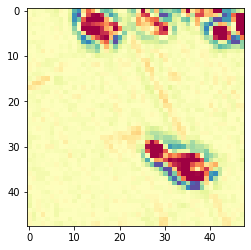

Epoch 74/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4597 - acc: 0.9936 - val_loss: 0.7506 - val_acc: 0.9853

Epoch 00074: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7505932013630431, 'val_acc': 0.9853479938629346, 'loss': 0.459681579044887, 'acc': 0.993629349704875, 'lr': 1e-06}


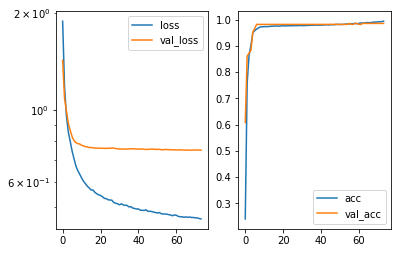

Predicted cell: Cells Probability: [[0.9678407]]
True Cell type: Cells
x [[0.7066153]]
True positional value x 0.7083333333333334
y [[0.7729164]]
True positional value y 0.7083333333333334


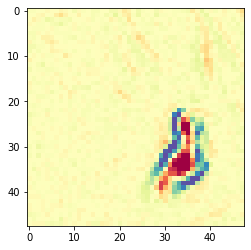

Epoch 75/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4594 - acc: 0.9940 - val_loss: 0.7505 - val_acc: 0.9853

Epoch 00075: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7504820507087987, 'val_acc': 0.9853479938629346, 'loss': 0.45940303744956795, 'acc': 0.9940154497227613, 'lr': 1e-06}


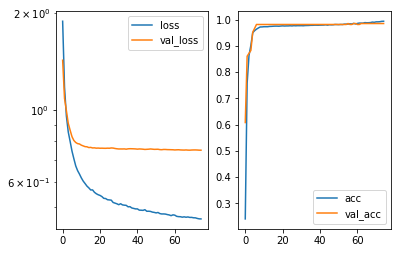

Predicted cell: Cells Probability: [[0.99079555]]
True Cell type: Cells
x [[0.44546333]]
True positional value x 0.5
y [[0.33456308]]
True positional value y 0.7083333333333334


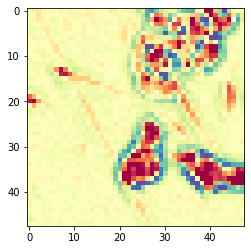

Epoch 76/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4608 - acc: 0.9940 - val_loss: 0.7515 - val_acc: 0.9853

Epoch 00076: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7515102083429749, 'val_acc': 0.9853479938629346, 'loss': 0.4608250147587544, 'acc': 0.9940154485720926, 'lr': 1e-06}


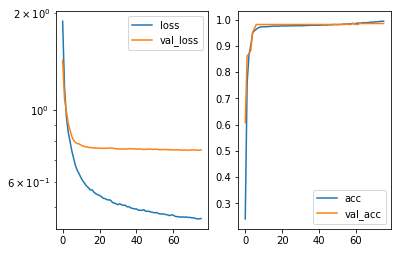

Predicted cell: Cells Probability: [[0.9611841]]
True Cell type: Cells
x [[0.26171213]]
True positional value x 0.2916666666666667
y [[0.6583116]]
True positional value y 0.7083333333333334


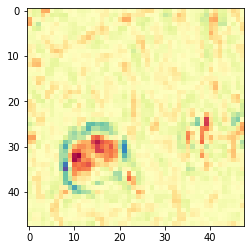

Epoch 77/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4606 - acc: 0.9927 - val_loss: 0.7515 - val_acc: 0.9853

Epoch 00077: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7515474846074869, 'val_acc': 0.9853479938629346, 'loss': 0.46060588161917726, 'acc': 0.9926640996601591, 'lr': 1e-06}


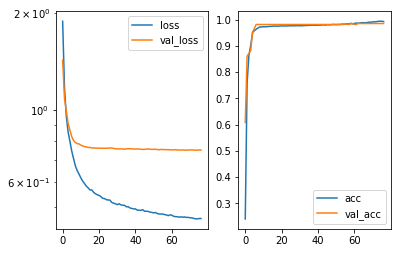

Predicted cell: Cells Probability: [[0.99882644]]
True Cell type: Cells
x [[0.44104746]]
True positional value x 0.5
y [[0.7857566]]
True positional value y 0.5


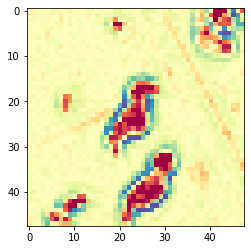

Epoch 78/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4593 - acc: 0.9931 - val_loss: 0.7515 - val_acc: 0.9853

Epoch 00078: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7515029051364996, 'val_acc': 0.9853479938629346, 'loss': 0.4593448635464009, 'acc': 0.9930501985273766, 'lr': 1e-06}


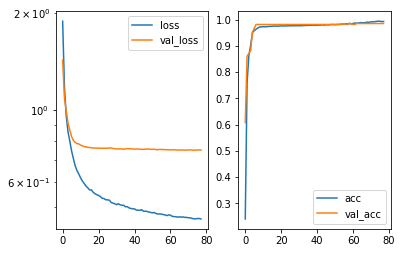

Predicted cell: Cells Probability: [[0.9237685]]
True Cell type: Cells
x [[0.66654545]]
True positional value x 0.5
y [[0.5949893]]
True positional value y 0.7083333333333334


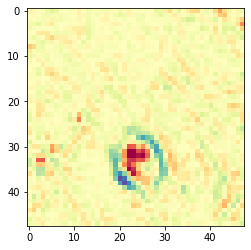

Epoch 79/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4588 - acc: 0.9946 - val_loss: 0.7519 - val_acc: 0.9853

Epoch 00079: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7519450436581622, 'val_acc': 0.9853479938629346, 'loss': 0.4587998690522315, 'acc': 0.9945945997495909, 'lr': 1e-06}


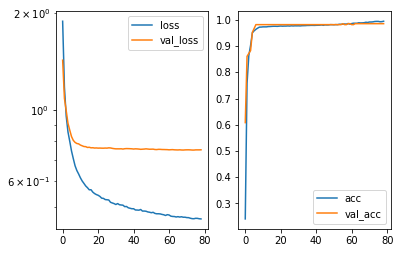

Predicted cell: Cells Probability: [[0.9942332]]
True Cell type: Cells
x [[0.2545666]]
True positional value x 0.2916666666666667
y [[0.59880537]]
True positional value y 0.5


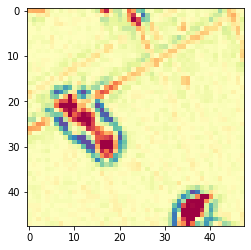

Epoch 80/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4574 - acc: 0.9956 - val_loss: 0.7519 - val_acc: 0.9853

Epoch 00080: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7518978472594376, 'val_acc': 0.9853479938629346, 'loss': 0.45739459669267807, 'acc': 0.9955598497943068, 'lr': 1e-06}


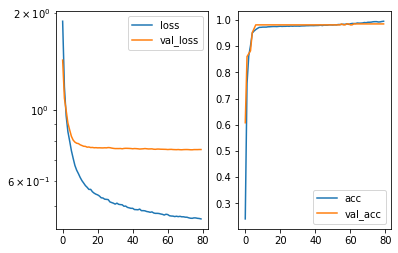

Predicted cell: Cells Probability: [[0.9917389]]
True Cell type: Cells
x [[0.39562342]]
True positional value x 0.2916666666666667
y [[0.48602507]]
True positional value y 0.7083333333333334


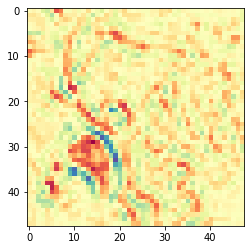

Epoch 81/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4567 - acc: 0.9965 - val_loss: 0.7508 - val_acc: 0.9853

Epoch 00081: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7508067811801756, 'val_acc': 0.9853479938629346, 'loss': 0.45666722383738484, 'acc': 0.9965250998390227, 'lr': 1e-06}


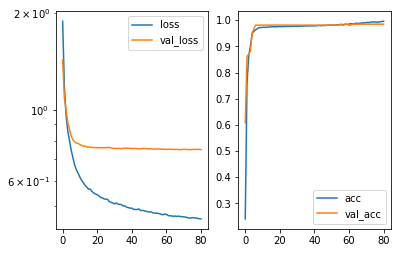

Predicted cell: Cells Probability: [[0.9845834]]
True Cell type: Cells
x [[0.43720046]]
True positional value x 0.2916666666666667
y [[0.56170785]]
True positional value y 0.5


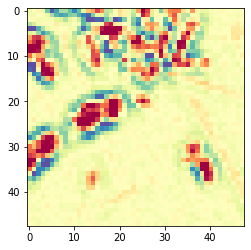

Epoch 82/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4580 - acc: 0.9954 - val_loss: 0.7510 - val_acc: 0.9853

Epoch 00082: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7510074442559547, 'val_acc': 0.9853479938629346, 'loss': 0.45795655825883724, 'acc': 0.9953667997853636, 'lr': 1e-06}


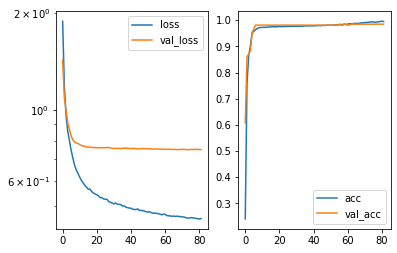

Predicted cell: Cells Probability: [[0.9737951]]
True Cell type: Cells
x [[0.6512429]]
True positional value x 0.7083333333333334
y [[0.3691332]]
True positional value y 0.5


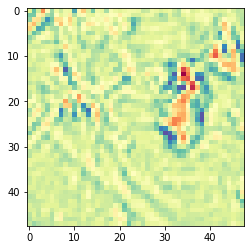

Epoch 83/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4556 - acc: 0.9965 - val_loss: 0.7504 - val_acc: 0.9853

Epoch 00083: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7504312961529462, 'val_acc': 0.9853479938629346, 'loss': 0.45564205029756405, 'acc': 0.9965250998390227, 'lr': 1e-06}


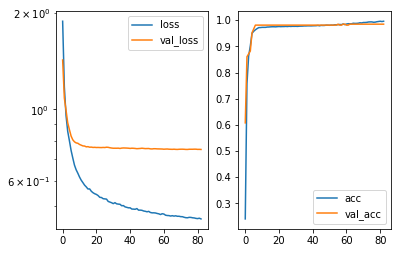

Predicted cell: Cells Probability: [[0.9964311]]
True Cell type: Cells
x [[0.43966007]]
True positional value x 0.5
y [[0.71752316]]
True positional value y 0.2916666666666667


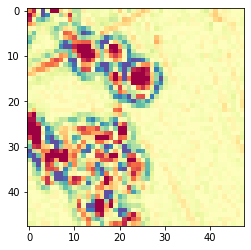

Epoch 84/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4542 - acc: 0.9973 - val_loss: 0.7505 - val_acc: 0.9853

Epoch 00084: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7505445949760549, 'val_acc': 0.9853479938629346, 'loss': 0.4542224981379785, 'acc': 0.9972972998747954, 'lr': 1e-06}


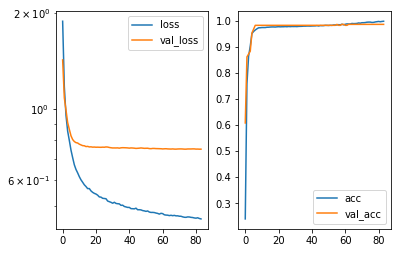

Predicted cell: Cells Probability: [[0.9950753]]
True Cell type: Cells
x [[0.84932536]]
True positional value x 0.7083333333333334
y [[0.40197876]]
True positional value y 0.7083333333333334


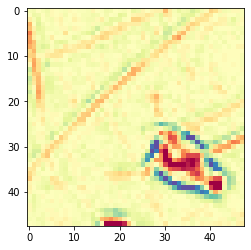

Epoch 85/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4542 - acc: 0.9975 - val_loss: 0.7511 - val_acc: 0.9853

Epoch 00085: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7511209135963803, 'val_acc': 0.9853479938629346, 'loss': 0.45423073750205023, 'acc': 0.9974903498837386, 'lr': 1e-06}


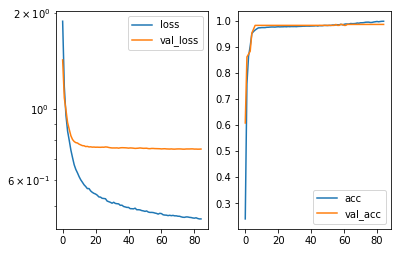

Predicted cell: Cells Probability: [[0.9930889]]
True Cell type: Cells
x [[0.366281]]
True positional value x 0.5
y [[0.30552518]]
True positional value y 0.2916666666666667


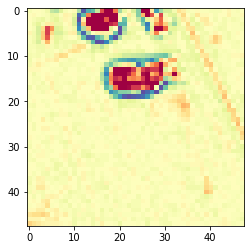

Epoch 86/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4584 - acc: 0.9948 - val_loss: 0.7506 - val_acc: 0.9853

Epoch 00086: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7506280681152484, 'val_acc': 0.9853479938629346, 'loss': 0.4583881439849677, 'acc': 0.9947876463065276, 'lr': 1e-06}


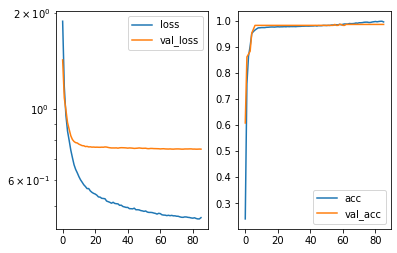

Predicted cell: Cells Probability: [[0.9855239]]
True Cell type: Cells
x [[0.3375465]]
True positional value x 0.5
y [[0.5199345]]
True positional value y 0.7083333333333334


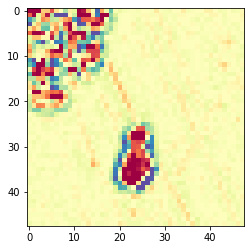

Epoch 87/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4550 - acc: 0.9975 - val_loss: 0.7513 - val_acc: 0.9853

Epoch 00087: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7513162408556256, 'val_acc': 0.9853479938629346, 'loss': 0.45498672829631676, 'acc': 0.9974903498837386, 'lr': 1e-06}


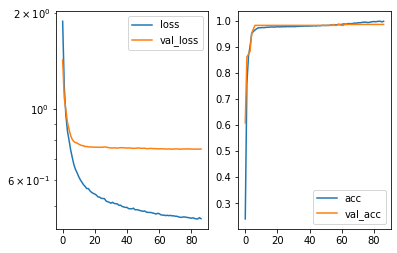

Predicted cell: Normal Probability: [[0.9730381]]
True Cell type: Normal
x [[0.43576124]]
True positional value x 0.5
y [[0.54612195]]
True positional value y 0.5


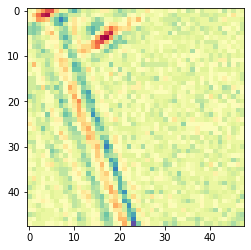

Epoch 88/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4532 - acc: 0.9979 - val_loss: 0.7500 - val_acc: 0.9853

Epoch 00088: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7500453296598497, 'val_acc': 0.9853479938629346, 'loss': 0.45324966679668793, 'acc': 0.997876449901625, 'lr': 1e-06}


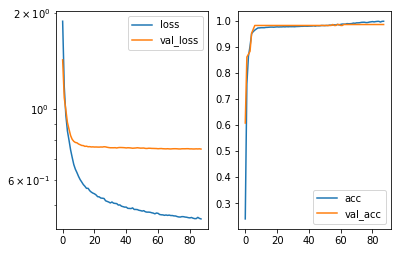

Predicted cell: Cells Probability: [[0.99243873]]
True Cell type: Cells
x [[0.30956498]]
True positional value x 0.5
y [[0.824328]]
True positional value y 0.7083333333333334


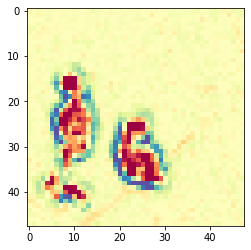

Epoch 89/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4530 - acc: 0.9979 - val_loss: 0.7504 - val_acc: 0.9853

Epoch 00089: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7504409228489076, 'val_acc': 0.9853479938629346, 'loss': 0.45295287501858006, 'acc': 0.997876449901625, 'lr': 1e-06}


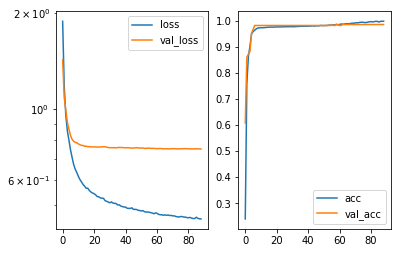

Predicted cell: Cells Probability: [[0.96571386]]
True Cell type: Cells
x [[0.25774992]]
True positional value x 0.2916666666666667
y [[0.65824515]]
True positional value y 0.7083333333333334


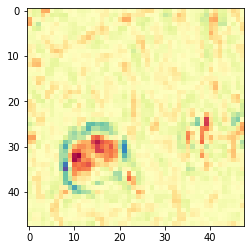

Epoch 90/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4515 - acc: 0.9990 - val_loss: 0.7500 - val_acc: 0.9853

Epoch 00090: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7499662142096858, 'val_acc': 0.9853479938629346, 'loss': 0.45145905558667127, 'acc': 0.9990347499552841, 'lr': 1e-06}


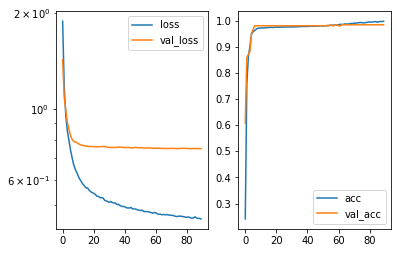

Predicted cell: Cells Probability: [[0.9951153]]
True Cell type: Cells
x [[0.09830004]]
True positional value x 0.2916666666666667
y [[0.5170788]]
True positional value y 0.2916666666666667


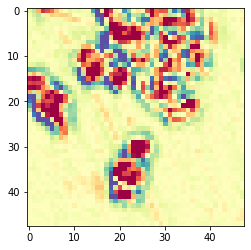

Epoch 91/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4528 - acc: 0.9969 - val_loss: 0.7511 - val_acc: 0.9853

Epoch 00091: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7510991301728692, 'val_acc': 0.9853479938629346, 'loss': 0.45276867549391786, 'acc': 0.9969111998569091, 'lr': 1e-06}


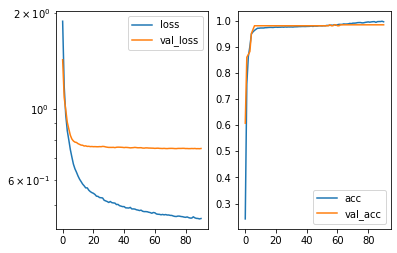

Predicted cell: Normal Probability: [[0.97907525]]
True Cell type: Normal
x [[0.60210997]]
True positional value x 0.5
y [[0.437234]]
True positional value y 0.5


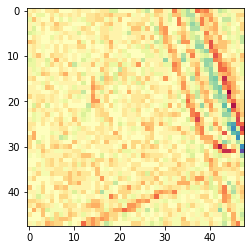

Epoch 92/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4522 - acc: 0.9973 - val_loss: 0.7507 - val_acc: 0.9853

Epoch 00092: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7507340089305417, 'val_acc': 0.9853479938629346, 'loss': 0.4522064077347862, 'acc': 0.9972972998747954, 'lr': 1e-06}


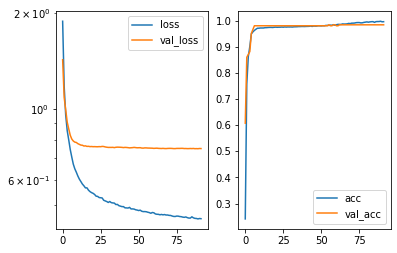

Predicted cell: Cells Probability: [[0.98252815]]
True Cell type: Cells
x [[0.6542913]]
True positional value x 0.7083333333333334
y [[0.6443034]]
True positional value y 0.7083333333333334


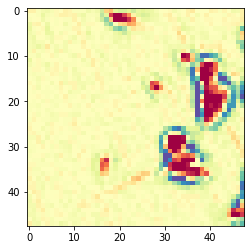

Epoch 93/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4516 - acc: 0.9983 - val_loss: 0.7504 - val_acc: 0.9853

Epoch 00093: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7504193287192683, 'val_acc': 0.9853479938629346, 'loss': 0.4516410269562342, 'acc': 0.9982625499195114, 'lr': 1e-06}


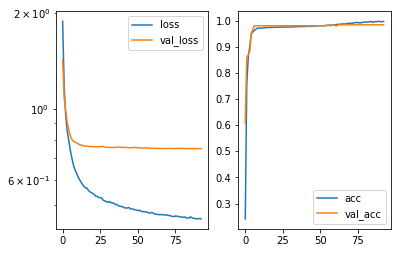

Predicted cell: Normal Probability: [[0.99064153]]
True Cell type: Normal
x [[0.46021986]]
True positional value x 0.5
y [[0.6562945]]
True positional value y 0.5


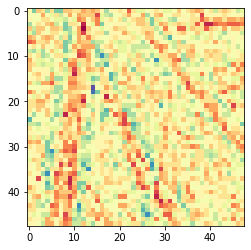

Epoch 94/250
5180/5180 [==============================] - 8s 1ms/step - loss: 0.4515 - acc: 0.9977 - val_loss: 0.7506 - val_acc: 0.9853

Epoch 00094: ReduceLROnPlateau reducing learning rate to 9.999999974752428e-08.

Epoch 00094: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7506303774131523, 'val_acc': 0.9853479938629346, 'loss': 0.45148765465467594, 'acc': 0.9976833998926818, 'lr': 1e-06}


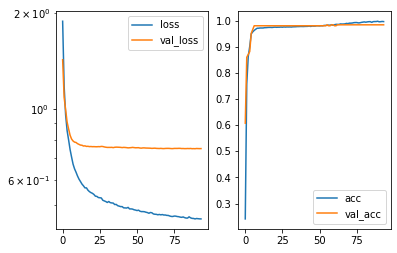

Predicted cell: Cells Probability: [[0.9912497]]
True Cell type: Cells
x [[0.16588339]]
True positional value x 0.5
y [[0.33598632]]
True positional value y 0.2916666666666667


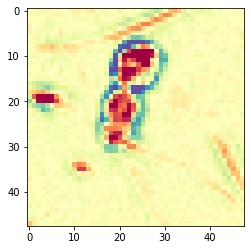

Epoch 95/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4517 - acc: 0.9969 - val_loss: 0.7513 - val_acc: 0.9853

Epoch 00095: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7513207068373432, 'val_acc': 0.9853479938629346, 'loss': 0.45172074724808625, 'acc': 0.9969111987062402, 'lr': 1e-07}


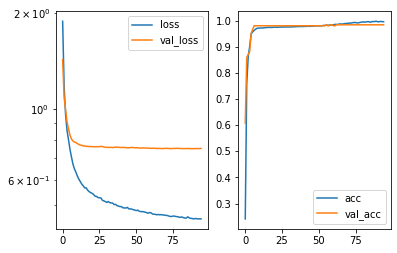

Predicted cell: Cells Probability: [[0.98502964]]
True Cell type: Cells
x [[0.3826086]]
True positional value x 0.2916666666666667
y [[0.70058227]]
True positional value y 0.5


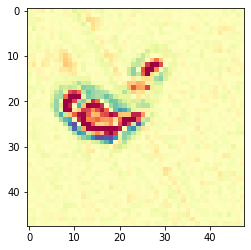

Epoch 96/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4506 - acc: 0.9988 - val_loss: 0.7512 - val_acc: 0.9853

Epoch 00096: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7511896654799745, 'val_acc': 0.9853479938629346, 'loss': 0.4505567479317713, 'acc': 0.9988416999463409, 'lr': 1e-07}


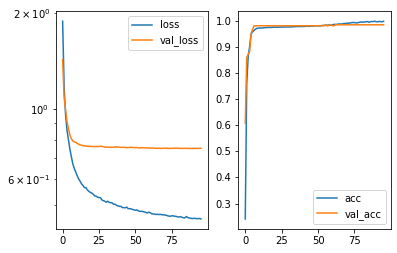

Predicted cell: Cells Probability: [[0.99099135]]
True Cell type: Cells
x [[0.38772073]]
True positional value x 0.2916666666666667
y [[0.51338124]]
True positional value y 0.5


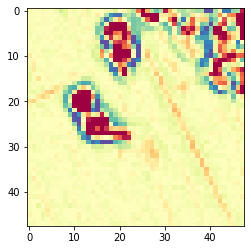

Epoch 97/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4492 - acc: 0.9986 - val_loss: 0.7510 - val_acc: 0.9853

Epoch 00097: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.751028502598787, 'val_acc': 0.9853479938629346, 'loss': 0.44922520364113294, 'acc': 0.9986486487867289, 'lr': 1e-07}


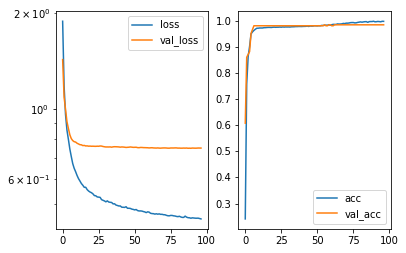

Predicted cell: Cells Probability: [[0.99428755]]
True Cell type: Cells
x [[0.5168299]]
True positional value x 0.7083333333333334
y [[0.54681087]]
True positional value y 0.5


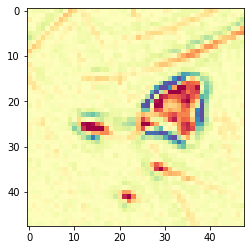

Epoch 98/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4518 - acc: 0.9979 - val_loss: 0.7508 - val_acc: 0.9853

Epoch 00098: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7508220556891445, 'val_acc': 0.9853479938629346, 'loss': 0.4518062465439432, 'acc': 0.997876449901625, 'lr': 1e-07}


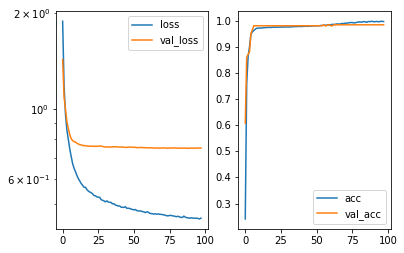

Predicted cell: Cells Probability: [[0.9358768]]
True Cell type: Cells
x [[0.31304467]]
True positional value x 0.2916666666666667
y [[0.36916834]]
True positional value y 0.2916666666666667


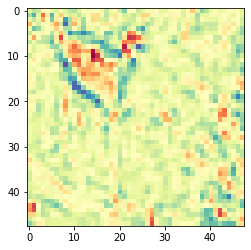

Epoch 99/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4506 - acc: 0.9981 - val_loss: 0.7507 - val_acc: 0.9853

Epoch 00099: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7506631739410289, 'val_acc': 0.9853479938629346, 'loss': 0.45058605592683476, 'acc': 0.9980694987598994, 'lr': 1e-07}


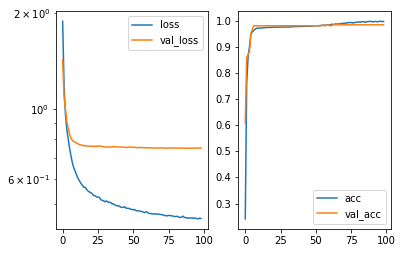

Predicted cell: Cells Probability: [[0.93575513]]
True Cell type: Cells
x [[0.311578]]
True positional value x 0.2916666666666667
y [[0.3694248]]
True positional value y 0.2916666666666667


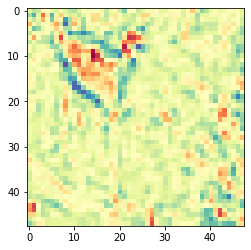

Epoch 100/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4512 - acc: 0.9977 - val_loss: 0.7505 - val_acc: 0.9853

Epoch 00100: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.75048040164696, 'val_acc': 0.9853479938629346, 'loss': 0.45119348294946676, 'acc': 0.997683398742013, 'lr': 1e-07}


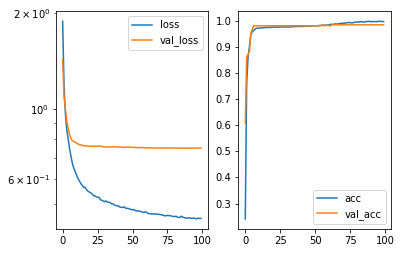

Predicted cell: Cells Probability: [[0.9815191]]
True Cell type: Cells
x [[0.5390645]]
True positional value x 0.2916666666666667
y [[0.25693554]]
True positional value y 0.2916666666666667


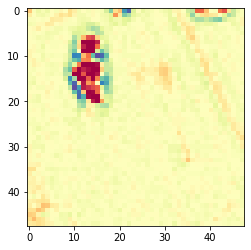

Epoch 101/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4528 - acc: 0.9979 - val_loss: 0.7504 - val_acc: 0.9853

Epoch 00101: ReduceLROnPlateau reducing learning rate to 1.0000000116860975e-08.

Epoch 00101: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7503978952820047, 'val_acc': 0.9853479938629346, 'loss': 0.45284629949731714, 'acc': 0.997876449901625, 'lr': 1e-07}


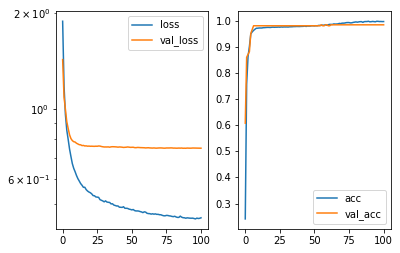

Predicted cell: Cells Probability: [[0.98715067]]
True Cell type: Cells
x [[0.25970235]]
True positional value x 0.2916666666666667
y [[0.6059653]]
True positional value y 0.5


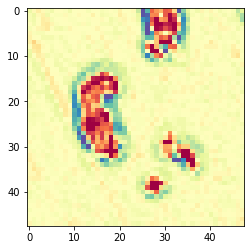

Epoch 102/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4513 - acc: 0.9975 - val_loss: 0.7501 - val_acc: 0.9853

Epoch 00102: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7501063724577208, 'val_acc': 0.9853479938629346, 'loss': 0.45130098291805815, 'acc': 0.9974903498837386, 'lr': 1e-08}


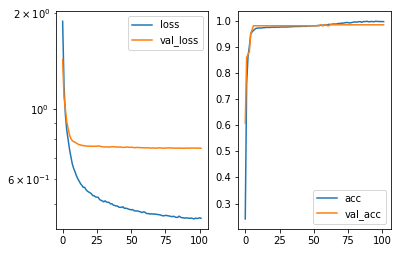

Predicted cell: Cells Probability: [[0.9959715]]
True Cell type: Cells
x [[0.835942]]
True positional value x 0.7083333333333334
y [[0.7961593]]
True positional value y 0.2916666666666667


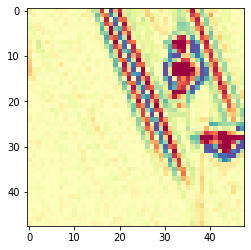

Epoch 103/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4499 - acc: 0.9990 - val_loss: 0.7501 - val_acc: 0.9853

Epoch 00103: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7501107773064694, 'val_acc': 0.9853479938629346, 'loss': 0.4499247550504088, 'acc': 0.9990347499552841, 'lr': 1e-08}


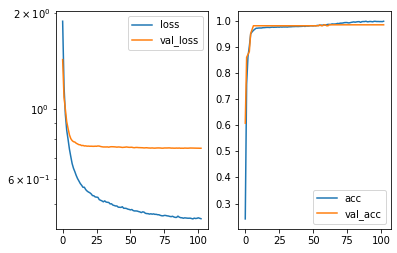

Predicted cell: Normal Probability: [[0.9803923]]
True Cell type: Normal
x [[0.60030806]]
True positional value x 0.5
y [[0.44645262]]
True positional value y 0.5


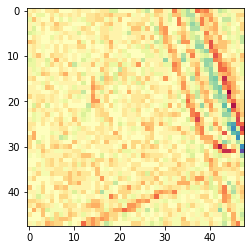

Epoch 104/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4508 - acc: 0.9985 - val_loss: 0.7501 - val_acc: 0.9853

Epoch 00104: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7500803385462079, 'val_acc': 0.9853479938629346, 'loss': 0.4508274584203153, 'acc': 0.9984555999284546, 'lr': 1e-08}


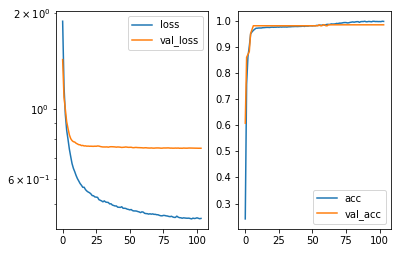

Predicted cell: Cells Probability: [[0.9353903]]
True Cell type: Cells
x [[0.3559896]]
True positional value x 0.2916666666666667
y [[0.4375247]]
True positional value y 0.2916666666666667


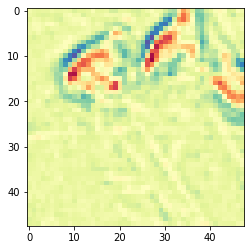

Epoch 105/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4528 - acc: 0.9973 - val_loss: 0.7501 - val_acc: 0.9853

Epoch 00105: ReduceLROnPlateau reducing learning rate to 9.999999939225292e-10.

Epoch 00105: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7501438517710228, 'val_acc': 0.9853479938629346, 'loss': 0.4527820072579108, 'acc': 0.9972972987241266, 'lr': 1e-08}


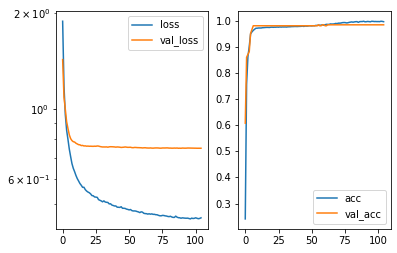

Predicted cell: Cells Probability: [[0.9690907]]
True Cell type: Cells
x [[0.2600021]]
True positional value x 0.2916666666666667
y [[0.6601662]]
True positional value y 0.7083333333333334


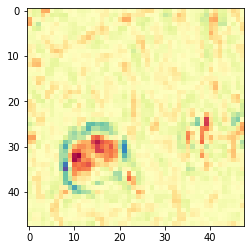

Epoch 106/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4525 - acc: 0.9981 - val_loss: 0.7501 - val_acc: 0.9853

Epoch 00106: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7500822686013722, 'val_acc': 0.9853479938629346, 'loss': 0.4524731923714568, 'acc': 0.9980694999105681, 'lr': 1e-09}


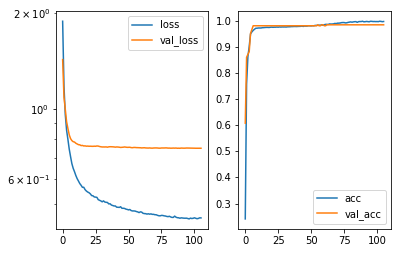

Predicted cell: Cells Probability: [[0.9920719]]
True Cell type: Cells
x [[0.79557663]]
True positional value x 0.7083333333333334
y [[0.39994684]]
True positional value y 0.5


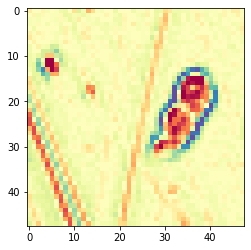

Epoch 107/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4511 - acc: 0.9990 - val_loss: 0.7501 - val_acc: 0.9853

Epoch 00107: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7500634826583303, 'val_acc': 0.9853479938629346, 'loss': 0.4510896217408788, 'acc': 0.9990347499552841, 'lr': 1e-09}


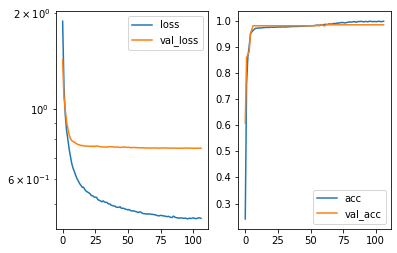

Predicted cell: Cells Probability: [[0.99654835]]
True Cell type: Cells
x [[0.6453381]]
True positional value x 0.5
y [[0.665836]]
True positional value y 0.2916666666666667


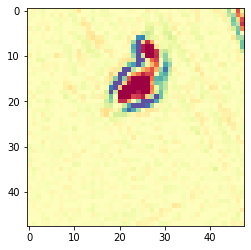

Epoch 108/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4512 - acc: 0.9979 - val_loss: 0.7501 - val_acc: 0.9853

Epoch 00108: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7501019632423317, 'val_acc': 0.9853479938629346, 'loss': 0.4511973630047213, 'acc': 0.997876449901625, 'lr': 1e-09}


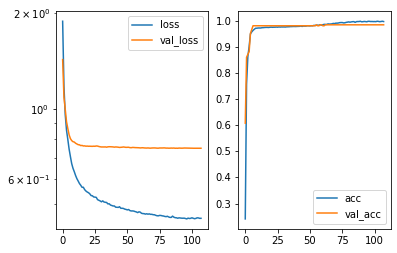

Predicted cell: Cells Probability: [[0.99806994]]
True Cell type: Cells
x [[0.4906612]]
True positional value x 0.7083333333333334
y [[0.3995139]]
True positional value y 0.2916666666666667


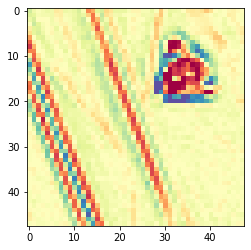

Epoch 109/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4509 - acc: 0.9975 - val_loss: 0.7501 - val_acc: 0.9853

Epoch 00109: ReduceLROnPlateau reducing learning rate to 9.999999717180686e-11.

Epoch 00109: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7501102677195064, 'val_acc': 0.9853479938629346, 'loss': 0.4509144910974392, 'acc': 0.9974903498837386, 'lr': 1e-09}


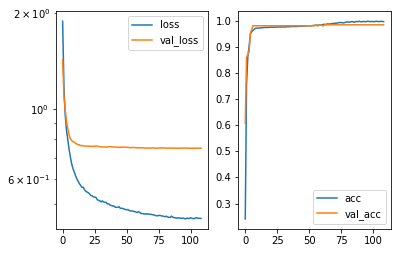

Predicted cell: Cells Probability: [[0.99360234]]
True Cell type: Cells
x [[0.2686003]]
True positional value x 0.2916666666666667
y [[0.7323295]]
True positional value y 0.2916666666666667


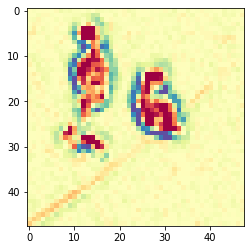

Epoch 110/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4507 - acc: 0.9983 - val_loss: 0.7502 - val_acc: 0.9853

Epoch 00110: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7501509045506571, 'val_acc': 0.9853479938629346, 'loss': 0.45074579660496655, 'acc': 0.9982625499195114, 'lr': 9.9999994e-11}


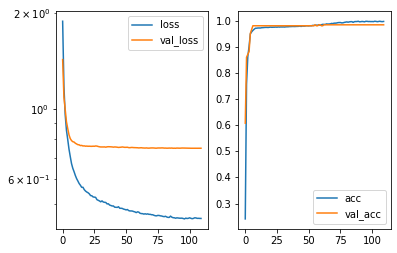

Predicted cell: Cells Probability: [[0.997145]]
True Cell type: Cells
x [[0.44892034]]
True positional value x 0.5
y [[0.7122231]]
True positional value y 0.2916666666666667


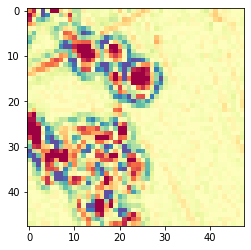

Epoch 111/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4500 - acc: 0.9986 - val_loss: 0.7502 - val_acc: 0.9853

Epoch 00111: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7502051541656801, 'val_acc': 0.9853479938629346, 'loss': 0.450022575247702, 'acc': 0.9986486499373978, 'lr': 9.9999994e-11}


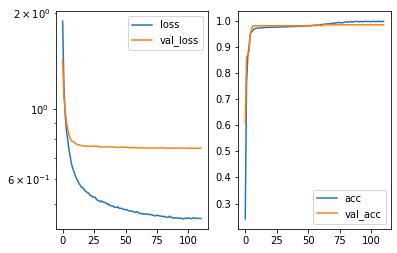

Predicted cell: Cells Probability: [[0.9901854]]
True Cell type: Cells
x [[0.48992378]]
True positional value x 0.2916666666666667
y [[0.76432407]]
True positional value y 0.7083333333333334


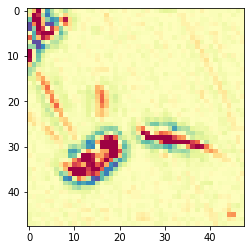

Epoch 112/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4510 - acc: 0.9979 - val_loss: 0.7502 - val_acc: 0.9853

Epoch 00112: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7501573123774685, 'val_acc': 0.9853479938629346, 'loss': 0.45099564638837425, 'acc': 0.997876449901625, 'lr': 9.9999994e-11}


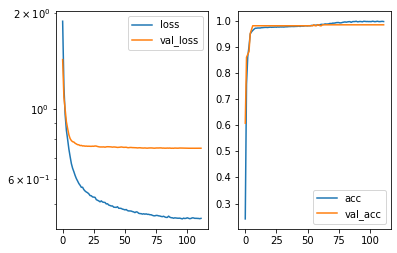

Predicted cell: Cells Probability: [[0.992508]]
True Cell type: Cells
x [[0.3182366]]
True positional value x 0.2916666666666667
y [[0.3960684]]
True positional value y 0.7083333333333334


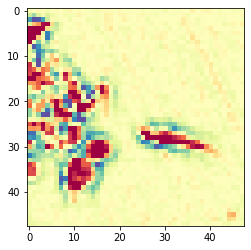

Epoch 113/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4513 - acc: 0.9985 - val_loss: 0.7501 - val_acc: 0.9853

Epoch 00113: ReduceLROnPlateau reducing learning rate to 9.99999943962493e-12.

Epoch 00113: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7501262766974313, 'val_acc': 0.9853479938629346, 'loss': 0.4512588805213398, 'acc': 0.9984555999284546, 'lr': 9.9999994e-11}


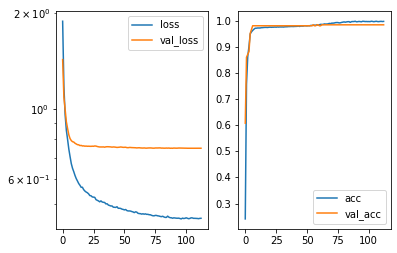

Predicted cell: Cells Probability: [[0.9753128]]
True Cell type: Cells
x [[0.32498193]]
True positional value x 0.7083333333333334
y [[0.7426601]]
True positional value y 0.7083333333333334


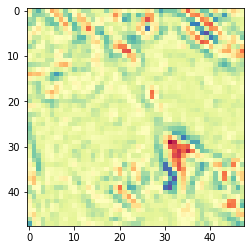

Epoch 114/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4503 - acc: 0.9985 - val_loss: 0.7501 - val_acc: 0.9853

Epoch 00114: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7501011678587386, 'val_acc': 0.9853479938629346, 'loss': 0.45027181241503095, 'acc': 0.9984555999284546, 'lr': 9.999999e-12}


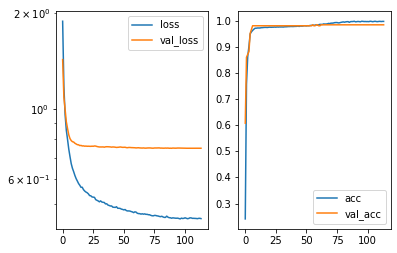

Predicted cell: Cells Probability: [[0.9915091]]
True Cell type: Cells
x [[0.7243926]]
True positional value x 0.7083333333333334
y [[0.59907454]]
True positional value y 0.7083333333333334


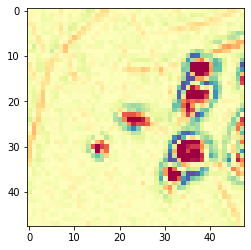

Epoch 115/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4515 - acc: 0.9983 - val_loss: 0.7503 - val_acc: 0.9853

Epoch 00115: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7502680030061212, 'val_acc': 0.9853479938629346, 'loss': 0.451474560503794, 'acc': 0.9982625499195114, 'lr': 9.999999e-12}


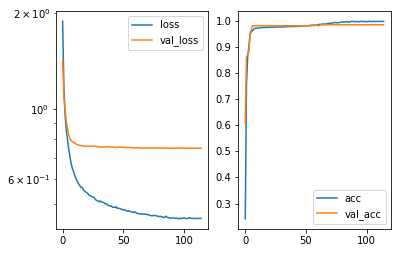

Predicted cell: Cells Probability: [[0.9848299]]
True Cell type: Cells
x [[0.2186129]]
True positional value x 0.5
y [[0.27745107]]
True positional value y 0.2916666666666667


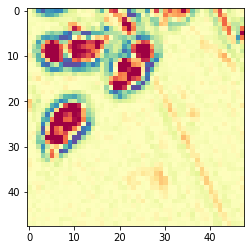

Epoch 116/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4497 - acc: 0.9985 - val_loss: 0.7501 - val_acc: 0.9853

Epoch 00116: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7501289414398836, 'val_acc': 0.9853479938629346, 'loss': 0.44969757735499083, 'acc': 0.9984555999284546, 'lr': 9.999999e-12}


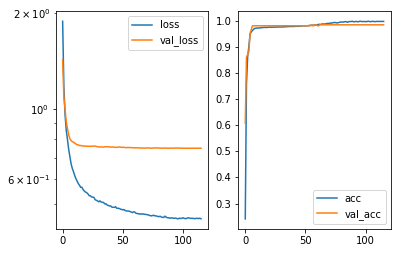

Predicted cell: Normal Probability: [[0.9965396]]
True Cell type: Normal
x [[0.49217355]]
True positional value x 0.5
y [[0.4031554]]
True positional value y 0.5


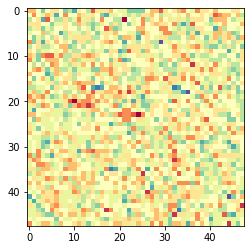

Epoch 117/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4516 - acc: 0.9977 - val_loss: 0.7503 - val_acc: 0.9853

Epoch 00117: ReduceLROnPlateau reducing learning rate to 9.999999092680235e-13.

Epoch 00117: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7502608207555918, 'val_acc': 0.9853479938629346, 'loss': 0.4516061905728344, 'acc': 0.9976833998926818, 'lr': 9.999999e-12}


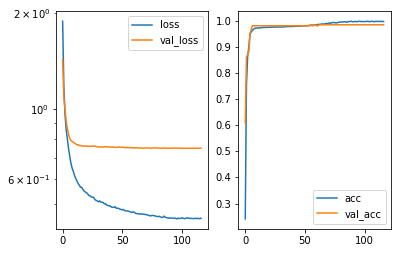

Predicted cell: Normal Probability: [[0.98976713]]
True Cell type: Normal
x [[0.44233057]]
True positional value x 0.5
y [[0.51586676]]
True positional value y 0.5


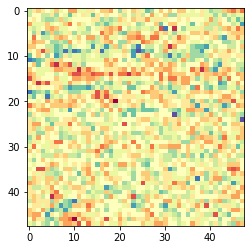

Epoch 118/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4491 - acc: 0.9992 - val_loss: 0.7502 - val_acc: 0.9853

Epoch 00118: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.750153056431166, 'val_acc': 0.9853479938629346, 'loss': 0.44913733695924973, 'acc': 0.9992277999642273, 'lr': 9.999999e-13}


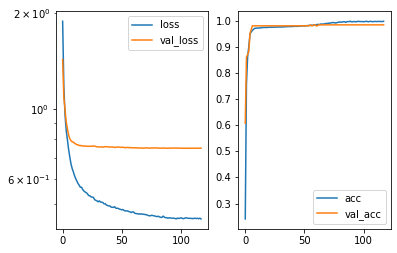

Predicted cell: Cells Probability: [[0.9958079]]
True Cell type: Cells
x [[0.5663417]]
True positional value x 0.5
y [[0.28880456]]
True positional value y 0.5


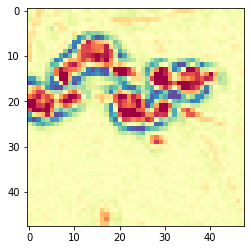

Epoch 119/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4494 - acc: 0.9983 - val_loss: 0.7502 - val_acc: 0.9853

Epoch 00119: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7501975651625749, 'val_acc': 0.9853479938629346, 'loss': 0.4494264388176465, 'acc': 0.9982625499195114, 'lr': 9.999999e-13}


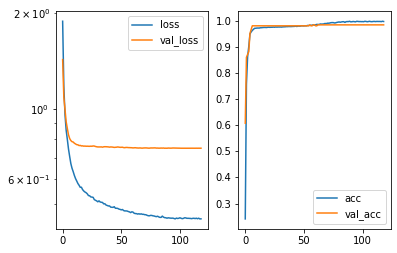

Predicted cell: Normal Probability: [[0.95282257]]
True Cell type: Normal
x [[0.46246377]]
True positional value x 0.5
y [[0.48879778]]
True positional value y 0.5


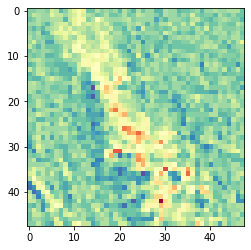

Epoch 120/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4516 - acc: 0.9981 - val_loss: 0.7502 - val_acc: 0.9853

Epoch 00120: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7502097306234059, 'val_acc': 0.9853479938629346, 'loss': 0.4515921572460631, 'acc': 0.9980694999105681, 'lr': 9.999999e-13}


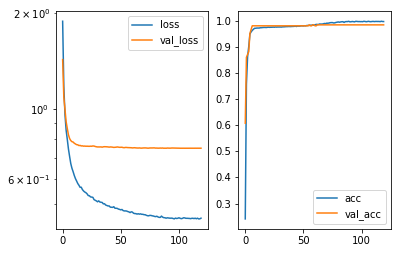

Predicted cell: Cells Probability: [[0.99185187]]
True Cell type: Cells
x [[0.36850291]]
True positional value x 0.5
y [[0.88624775]]
True positional value y 0.7083333333333334


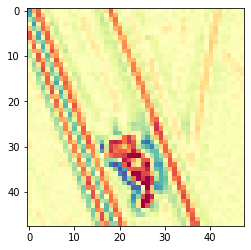

Epoch 121/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4522 - acc: 0.9975 - val_loss: 0.7502 - val_acc: 0.9853

Epoch 00121: ReduceLROnPlateau reducing learning rate to 9.9999988758398e-14.

Epoch 00121: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7502497019785228, 'val_acc': 0.9853479938629346, 'loss': 0.45219892010265333, 'acc': 0.9974903498837386, 'lr': 9.999999e-13}


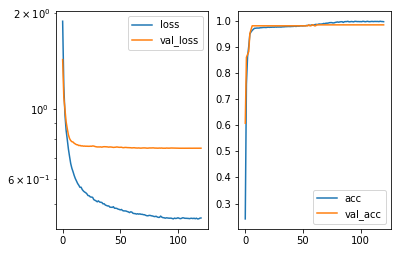

Predicted cell: Cells Probability: [[0.99840003]]
True Cell type: Cells
x [[0.4392296]]
True positional value x 0.7083333333333334
y [[0.5341353]]
True positional value y 0.2916666666666667


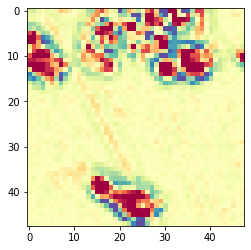

Epoch 122/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4541 - acc: 0.9963 - val_loss: 0.7502 - val_acc: 0.9853

Epoch 00122: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7502475998777173, 'val_acc': 0.9853479938629346, 'loss': 0.4540528054403062, 'acc': 0.9963320498300795, 'lr': 9.999999e-14}


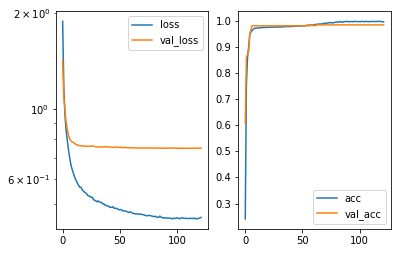

Predicted cell: Normal Probability: [[0.95297974]]
True Cell type: Normal
x [[0.46272948]]
True positional value x 0.5
y [[0.48892948]]
True positional value y 0.5


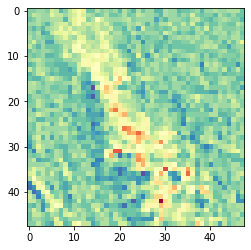

Epoch 123/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4517 - acc: 0.9981 - val_loss: 0.7503 - val_acc: 0.9853

Epoch 00123: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7503067305236509, 'val_acc': 0.9853479938629346, 'loss': 0.45170210664336746, 'acc': 0.9980694999105681, 'lr': 9.999999e-14}


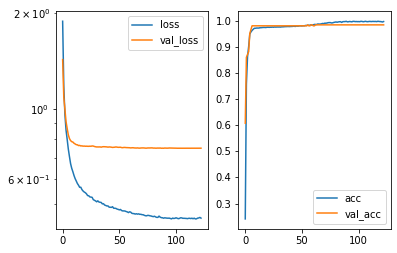

Predicted cell: Cells Probability: [[0.9931151]]
True Cell type: Cells
x [[0.51154774]]
True positional value x 0.5
y [[0.54935414]]
True positional value y 0.5


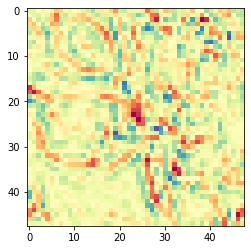

Epoch 124/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4498 - acc: 0.9988 - val_loss: 0.7503 - val_acc: 0.9853

Epoch 00124: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7503330155170007, 'val_acc': 0.9853479938629346, 'loss': 0.4498102793822417, 'acc': 0.9988416999463409, 'lr': 9.999999e-14}


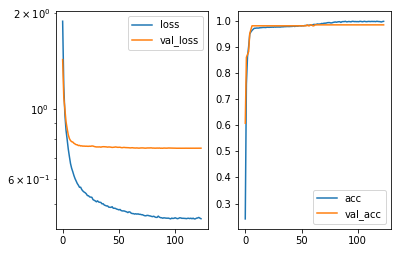

Predicted cell: Cells Probability: [[0.9320712]]
True Cell type: Cells
x [[0.66491735]]
True positional value x 0.5
y [[0.608872]]
True positional value y 0.7083333333333334


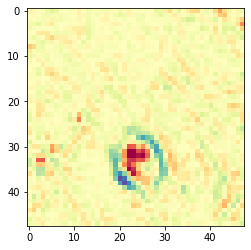

Epoch 125/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4519 - acc: 0.9979 - val_loss: 0.7503 - val_acc: 0.9853

Epoch 00125: ReduceLROnPlateau reducing learning rate to 9.999999146890344e-15.

Epoch 00125: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7503035609975403, 'val_acc': 0.9853479938629346, 'loss': 0.4518719214270014, 'acc': 0.997876449901625, 'lr': 9.999999e-14}


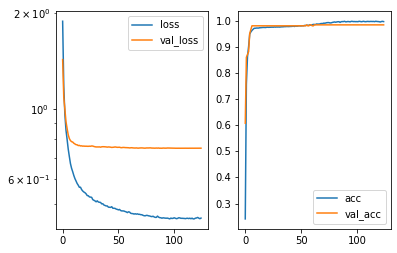

Predicted cell: Normal Probability: [[0.9867115]]
True Cell type: Normal
x [[0.5054561]]
True positional value x 0.5
y [[0.52492756]]
True positional value y 0.5


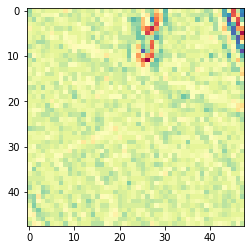

Epoch 126/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4501 - acc: 0.9986 - val_loss: 0.7503 - val_acc: 0.9853

Epoch 00126: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.750328452595861, 'val_acc': 0.9853479938629346, 'loss': 0.45010496106387105, 'acc': 0.9986486499373978, 'lr': 9.999999e-15}


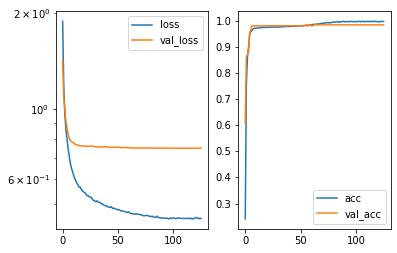

Predicted cell: Normal Probability: [[0.9897713]]
True Cell type: Normal
x [[0.44227552]]
True positional value x 0.5
y [[0.5160609]]
True positional value y 0.5


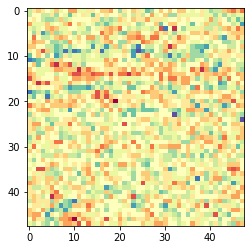

Epoch 127/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4496 - acc: 0.9986 - val_loss: 0.7503 - val_acc: 0.9853

Epoch 00127: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7502702083779779, 'val_acc': 0.9853479938629346, 'loss': 0.4496305248912237, 'acc': 0.9986486499373978, 'lr': 9.999999e-15}


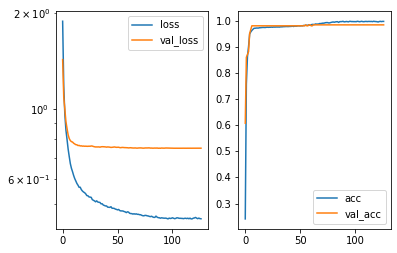

Predicted cell: Cells Probability: [[0.999949]]
True Cell type: Cells
x [[0.18760121]]
True positional value x 0.2916666666666667
y [[0.29280373]]
True positional value y 0.5


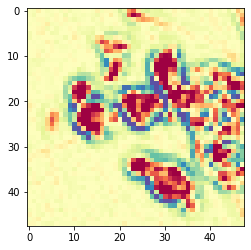

Epoch 128/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4505 - acc: 0.9986 - val_loss: 0.7503 - val_acc: 0.9853

Epoch 00128: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7502646760626154, 'val_acc': 0.9853479938629346, 'loss': 0.4505217349207079, 'acc': 0.9986486499373978, 'lr': 9.999999e-15}


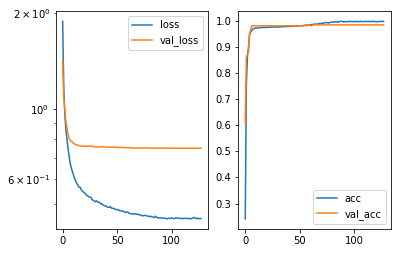

Predicted cell: Cells Probability: [[0.98462534]]
True Cell type: Cells
x [[0.36177412]]
True positional value x 0.5
y [[0.569577]]
True positional value y 0.5


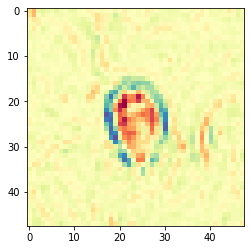

Epoch 129/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4504 - acc: 0.9990 - val_loss: 0.7502 - val_acc: 0.9853

Epoch 00129: ReduceLROnPlateau reducing learning rate to 9.999998977483753e-16.

Epoch 00129: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7501588863330882, 'val_acc': 0.9853479938629346, 'loss': 0.45042275830125256, 'acc': 0.9990347499552841, 'lr': 9.999999e-15}


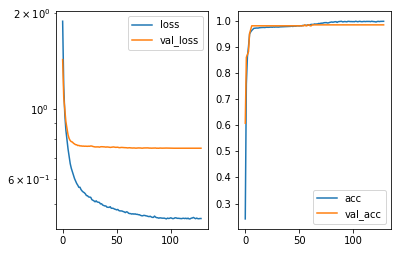

Predicted cell: Cells Probability: [[0.9752446]]
True Cell type: Cells
x [[0.32526433]]
True positional value x 0.7083333333333334
y [[0.7423032]]
True positional value y 0.7083333333333334


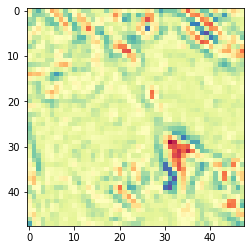

Epoch 130/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4493 - acc: 0.9985 - val_loss: 0.7501 - val_acc: 0.9853

Epoch 00130: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7501345335782229, 'val_acc': 0.9853479938629346, 'loss': 0.44931617137548086, 'acc': 0.9984555999284546, 'lr': 9.999999e-16}


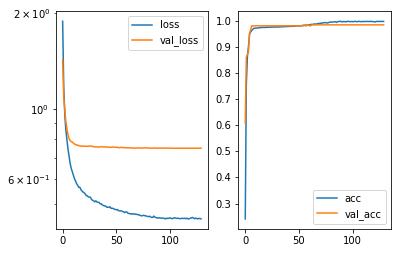

Predicted cell: Cells Probability: [[0.9876803]]
True Cell type: Cells
x [[0.24805596]]
True positional value x 0.2916666666666667
y [[0.11351989]]
True positional value y 0.2916666666666667


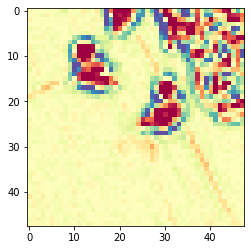

Epoch 131/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4519 - acc: 0.9985 - val_loss: 0.7501 - val_acc: 0.9853

Epoch 00131: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7500985500576732, 'val_acc': 0.9853479938629346, 'loss': 0.45191500108674687, 'acc': 0.9984555999284546, 'lr': 9.999999e-16}


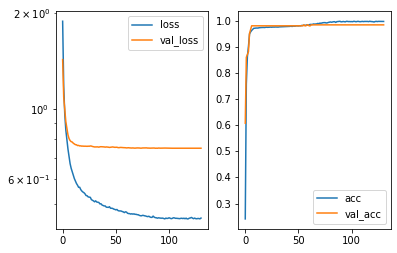

Predicted cell: Cells Probability: [[0.9560541]]
True Cell type: Cells
x [[0.28967625]]
True positional value x 0.5
y [[0.7217839]]
True positional value y 0.5


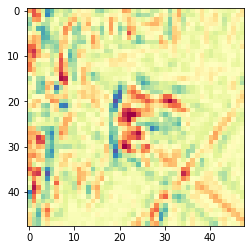

Epoch 132/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4511 - acc: 0.9977 - val_loss: 0.7501 - val_acc: 0.9853

Epoch 00132: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7501472564407321, 'val_acc': 0.9853479938629346, 'loss': 0.4510628215134374, 'acc': 0.9976833998926818, 'lr': 9.999999e-16}


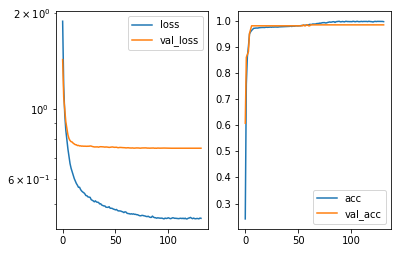

Predicted cell: Cells Probability: [[0.98234344]]
True Cell type: Cells
x [[0.4677955]]
True positional value x 0.5
y [[0.5468246]]
True positional value y 0.5


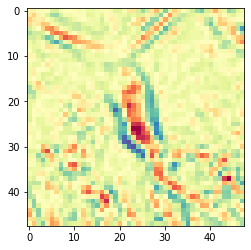

Epoch 133/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4509 - acc: 0.9985 - val_loss: 0.7501 - val_acc: 0.9853

Epoch 00133: ReduceLROnPlateau reducing learning rate to 9.999998977483754e-17.

Epoch 00133: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7501443043733255, 'val_acc': 0.9853479938629346, 'loss': 0.45085749893114835, 'acc': 0.9984555999284546, 'lr': 9.999999e-16}


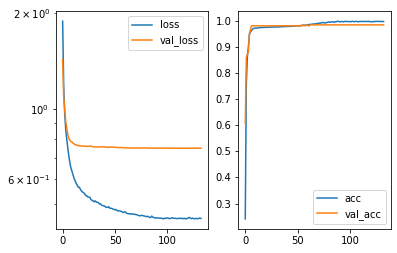

Predicted cell: Cells Probability: [[0.97552925]]
True Cell type: Cells
x [[0.15382291]]
True positional value x 0.2916666666666667
y [[0.5255563]]
True positional value y 0.7083333333333334


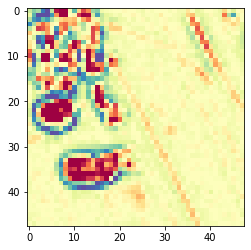

Epoch 134/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4493 - acc: 0.9990 - val_loss: 0.7500 - val_acc: 0.9853

Epoch 00134: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.750049413560511, 'val_acc': 0.9853479938629346, 'loss': 0.4493393301963806, 'acc': 0.9990347499552841, 'lr': 9.999999e-17}


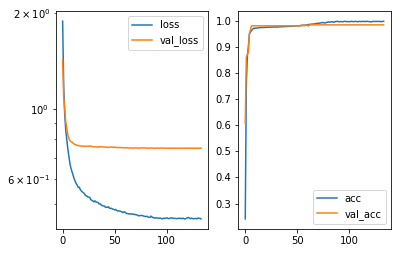

Predicted cell: Cells Probability: [[0.9943072]]
True Cell type: Cells
x [[0.7538625]]
True positional value x 0.2916666666666667
y [[0.5581591]]
True positional value y 0.7083333333333334


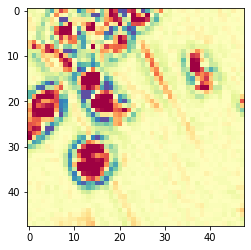

Epoch 135/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4506 - acc: 0.9983 - val_loss: 0.7501 - val_acc: 0.9853

Epoch 00135: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7500548174966386, 'val_acc': 0.9853479938629346, 'loss': 0.45064311943459234, 'acc': 0.9982625499195114, 'lr': 9.999999e-17}


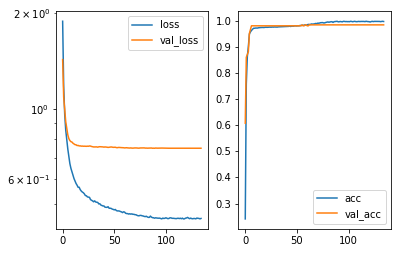

Predicted cell: Cells Probability: [[0.9153236]]
True Cell type: Cells
x [[0.22898068]]
True positional value x 0.2916666666666667
y [[0.3022912]]
True positional value y 0.2916666666666667


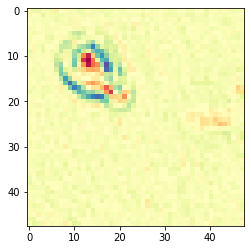

Epoch 136/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4518 - acc: 0.9979 - val_loss: 0.7500 - val_acc: 0.9853

Epoch 00136: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.749979779833839, 'val_acc': 0.9853479938629346, 'loss': 0.4517803224357399, 'acc': 0.997876449901625, 'lr': 9.999999e-17}


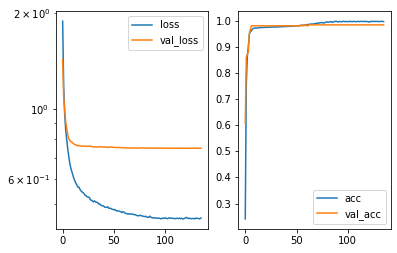

Predicted cell: Cells Probability: [[0.9692816]]
True Cell type: Cells
x [[0.8547745]]
True positional value x 0.7083333333333334
y [[0.48830572]]
True positional value y 0.2916666666666667


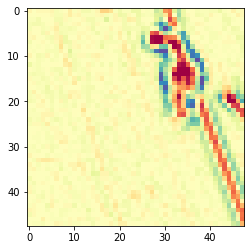

Epoch 137/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4510 - acc: 0.9986 - val_loss: 0.7501 - val_acc: 0.9853

Epoch 00137: ReduceLROnPlateau reducing learning rate to 9.999998845134856e-18.

Epoch 00137: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7501162310223003, 'val_acc': 0.9853479938629346, 'loss': 0.4510191561632635, 'acc': 0.9986486499373978, 'lr': 9.999999e-17}


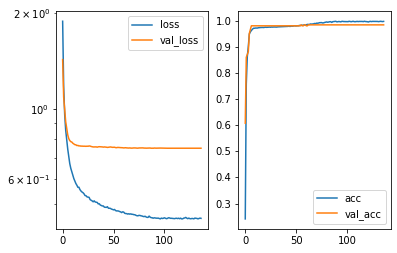

Predicted cell: Cells Probability: [[0.99343455]]
True Cell type: Cells
x [[0.29805422]]
True positional value x 0.5
y [[0.820659]]
True positional value y 0.7083333333333334


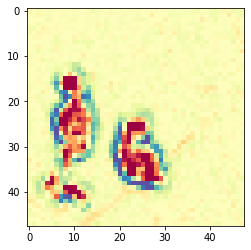

Epoch 138/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4511 - acc: 0.9988 - val_loss: 0.7502 - val_acc: 0.9853

Epoch 00138: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7501728261783446, 'val_acc': 0.9853479938629346, 'loss': 0.4510571813951588, 'acc': 0.9988416999463409, 'lr': 9.999999e-18}


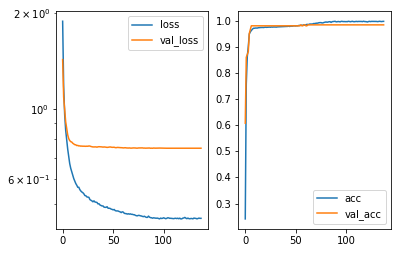

Predicted cell: Cells Probability: [[0.9785212]]
True Cell type: Cells
x [[0.65291166]]
True positional value x 0.7083333333333334
y [[0.60210234]]
True positional value y 0.7083333333333334


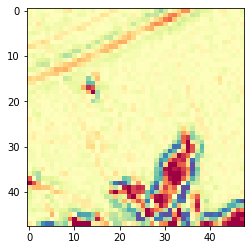

Epoch 139/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4511 - acc: 0.9981 - val_loss: 0.7502 - val_acc: 0.9853

Epoch 00139: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7501821301795624, 'val_acc': 0.9853479938629346, 'loss': 0.45109884596239186, 'acc': 0.9980694999105681, 'lr': 9.999999e-18}


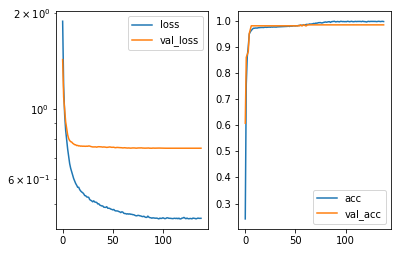

Predicted cell: Cells Probability: [[0.9863733]]
True Cell type: Cells
x [[0.60856074]]
True positional value x 0.5
y [[0.19243774]]
True positional value y 0.2916666666666667


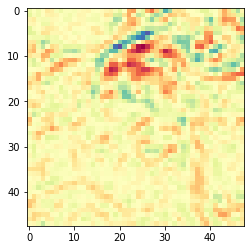

Epoch 140/250
5180/5180 [==============================] - 8s 1ms/step - loss: 0.4489 - acc: 0.9988 - val_loss: 0.7503 - val_acc: 0.9853

Epoch 00140: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.750250749317281, 'val_acc': 0.9853479938629346, 'loss': 0.44893218513621325, 'acc': 0.9988416999463409, 'lr': 9.999999e-18}


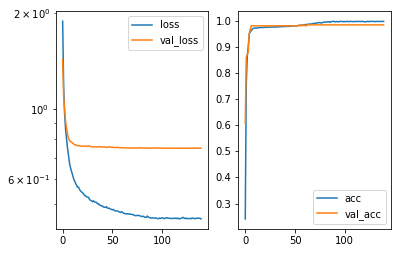

Predicted cell: Cells Probability: [[0.9846229]]
True Cell type: Cells
x [[0.3619701]]
True positional value x 0.5
y [[0.5694902]]
True positional value y 0.5


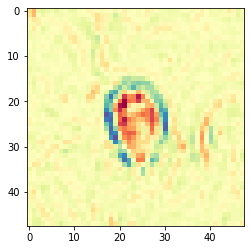

Epoch 141/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4526 - acc: 0.9975 - val_loss: 0.7503 - val_acc: 0.9853

Epoch 00141: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7502541618469434, 'val_acc': 0.9853479938629346, 'loss': 0.4526425277864611, 'acc': 0.9974903498837386, 'lr': 9.999999e-18}


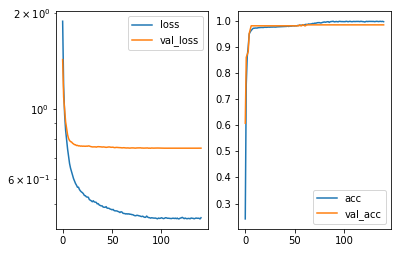

Predicted cell: Cells Probability: [[0.9906819]]
True Cell type: Cells
x [[0.20925675]]
True positional value x 0.2916666666666667
y [[0.8874318]]
True positional value y 0.7083333333333334


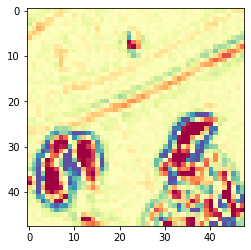

Epoch 142/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4529 - acc: 0.9969 - val_loss: 0.7501 - val_acc: 0.9853

Epoch 00142: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7500912787276747, 'val_acc': 0.9853479938629346, 'loss': 0.45294549796572064, 'acc': 0.9969111987062402, 'lr': 9.999999e-18}


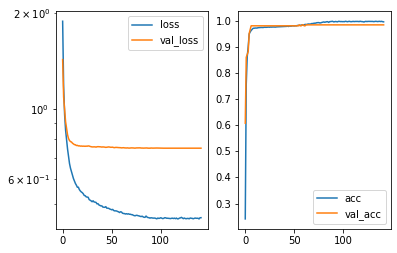

Predicted cell: Cells Probability: [[0.9906585]]
True Cell type: Cells
x [[0.21020624]]
True positional value x 0.2916666666666667
y [[0.88774353]]
True positional value y 0.7083333333333334


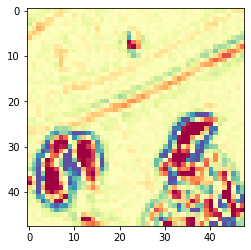

Epoch 143/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4497 - acc: 0.9988 - val_loss: 0.7501 - val_acc: 0.9853

Epoch 00143: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7500901861941858, 'val_acc': 0.9853479938629346, 'loss': 0.4496678284236363, 'acc': 0.9988416999463409, 'lr': 9.999999e-18}


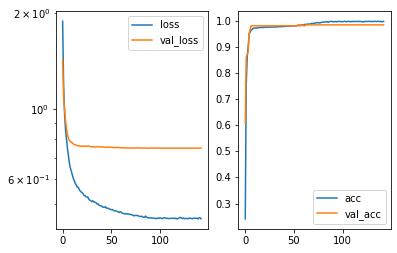

Predicted cell: Cells Probability: [[0.9872485]]
True Cell type: Cells
x [[0.34607622]]
True positional value x 0.2916666666666667
y [[0.51676226]]
True positional value y 0.7083333333333334


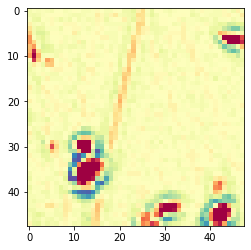

Epoch 144/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4512 - acc: 0.9981 - val_loss: 0.7502 - val_acc: 0.9853

Epoch 00144: ReduceLROnPlateau reducing learning rate to 9.999999010570977e-19.

Epoch 00144: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7501696062175346, 'val_acc': 0.9853479938629346, 'loss': 0.4512369593598207, 'acc': 0.9980694999105681, 'lr': 9.999999e-18}


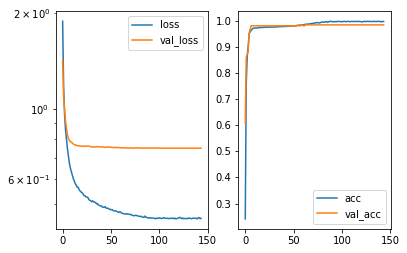

Predicted cell: Cells Probability: [[0.9987709]]
True Cell type: Cells
x [[0.38268068]]
True positional value x 0.5
y [[0.48077112]]
True positional value y 0.7083333333333334


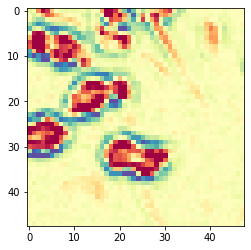

Epoch 145/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4502 - acc: 0.9981 - val_loss: 0.7502 - val_acc: 0.9853

Epoch 00145: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7501728820713448, 'val_acc': 0.9853479938629346, 'loss': 0.4501747907818975, 'acc': 0.9980694999105681, 'lr': 9.999999e-19}


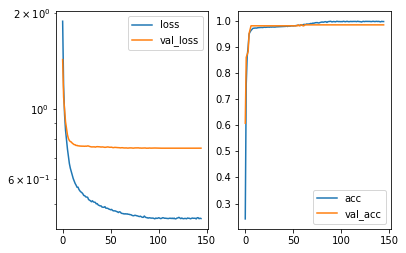

Predicted cell: Cells Probability: [[0.9668697]]
True Cell type: Cells
x [[0.31596658]]
True positional value x 0.2916666666666667
y [[0.59148216]]
True positional value y 0.5


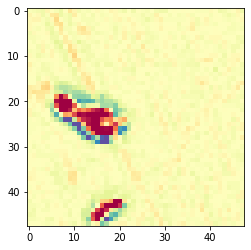

Epoch 146/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4520 - acc: 0.9985 - val_loss: 0.7501 - val_acc: 0.9853

Epoch 00146: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7501149863113851, 'val_acc': 0.9853479938629346, 'loss': 0.4519804032612952, 'acc': 0.9984555999284546, 'lr': 9.999999e-19}


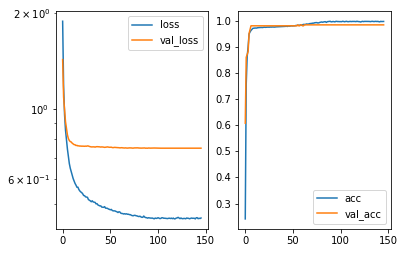

Predicted cell: Cells Probability: [[0.9741004]]
True Cell type: Cells
x [[0.4189645]]
True positional value x 0.2916666666666667
y [[0.7293063]]
True positional value y 0.7083333333333334


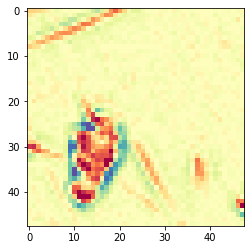

Epoch 147/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4515 - acc: 0.9975 - val_loss: 0.7502 - val_acc: 0.9853

Epoch 00147: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7501881718635559, 'val_acc': 0.9853479938629346, 'loss': 0.45148253440856934, 'acc': 0.9974903487330699, 'lr': 9.999999e-19}


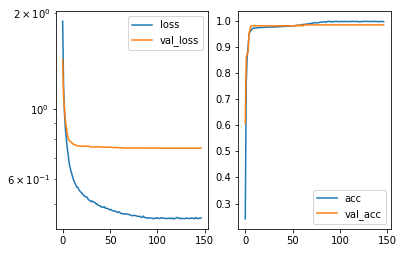

Predicted cell: Cells Probability: [[0.9977241]]
True Cell type: Cells
x [[0.33011675]]
True positional value x 0.5
y [[0.5126357]]
True positional value y 0.7083333333333334


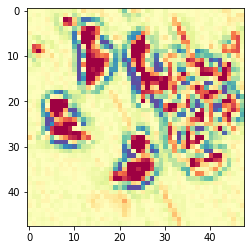

Epoch 148/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4510 - acc: 0.9985 - val_loss: 0.7503 - val_acc: 0.9853

Epoch 00148: ReduceLROnPlateau reducing learning rate to 9.999999424161285e-20.

Epoch 00148: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7502747180261018, 'val_acc': 0.9853479938629346, 'loss': 0.4510192459154313, 'acc': 0.9984555999284546, 'lr': 9.999999e-19}


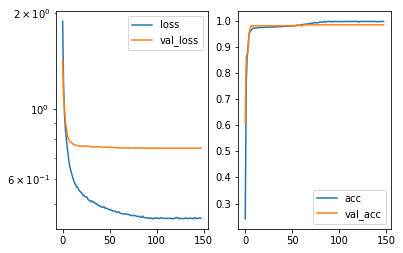

Predicted cell: Cells Probability: [[0.98746663]]
True Cell type: Cells
x [[0.3270543]]
True positional value x 0.5
y [[0.58145314]]
True positional value y 0.5


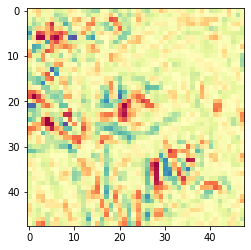

Epoch 149/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4516 - acc: 0.9983 - val_loss: 0.7502 - val_acc: 0.9853

Epoch 00149: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7502376362954304, 'val_acc': 0.9853479938629346, 'loss': 0.45155477316683323, 'acc': 0.9982625499195114, 'lr': 1e-19}


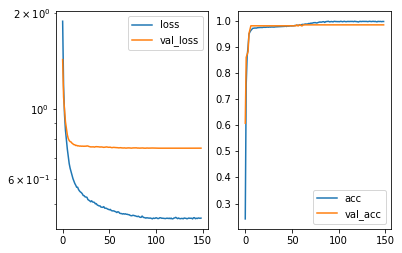

Predicted cell: Cells Probability: [[0.9602401]]
True Cell type: Cells
x [[0.48632103]]
True positional value x 0.5
y [[0.61912656]]
True positional value y 0.7083333333333334


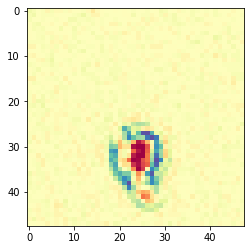

Epoch 150/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4503 - acc: 0.9990 - val_loss: 0.7503 - val_acc: 0.9853

Epoch 00150: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7502593922091054, 'val_acc': 0.9853479938629346, 'loss': 0.4503228968174761, 'acc': 0.9990347499552841, 'lr': 1e-19}


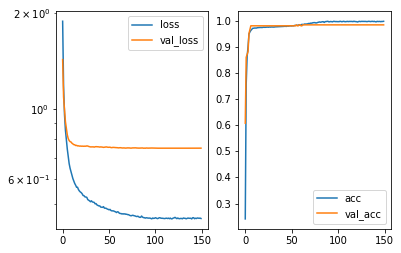

Predicted cell: Cells Probability: [[0.9965191]]
True Cell type: Cells
x [[0.36062986]]
True positional value x 0.5
y [[0.299278]]
True positional value y 0.5


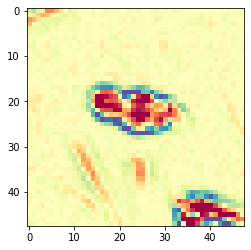

Epoch 151/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4499 - acc: 0.9983 - val_loss: 0.7502 - val_acc: 0.9853

Epoch 00151: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.750224504060361, 'val_acc': 0.9853479938629346, 'loss': 0.449886446984118, 'acc': 0.9982625499195114, 'lr': 1e-19}


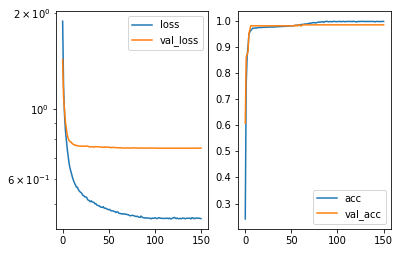

Predicted cell: Normal Probability: [[0.99671054]]
True Cell type: Normal
x [[0.57011384]]
True positional value x 0.5
y [[0.58171755]]
True positional value y 0.5


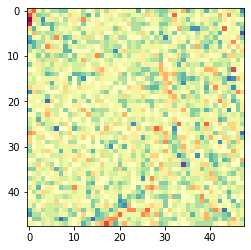

Epoch 152/250
5180/5180 [==============================] - 8s 1ms/step - loss: 0.4504 - acc: 0.9985 - val_loss: 0.7501 - val_acc: 0.9853

Epoch 00152: ReduceLROnPlateau reducing learning rate to 9.999999682655225e-21.

Epoch 00152: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7501419972587418, 'val_acc': 0.9853479938629346, 'loss': 0.4503556729283572, 'acc': 0.9984555999284546, 'lr': 1e-19}


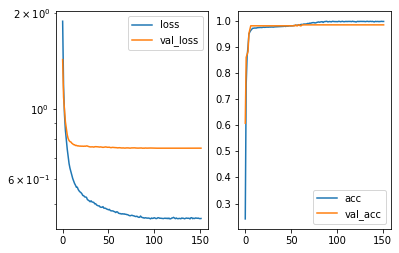

Predicted cell: Normal Probability: [[0.9991271]]
True Cell type: Normal
x [[0.5145477]]
True positional value x 0.5
y [[0.5393874]]
True positional value y 0.5


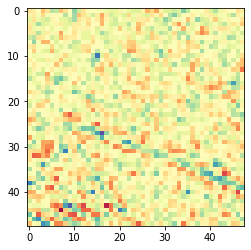

Epoch 153/250
5180/5180 [==============================] - 8s 1ms/step - loss: 0.4516 - acc: 0.9985 - val_loss: 0.7502 - val_acc: 0.9853

Epoch 00153: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7502028660459833, 'val_acc': 0.9853479938629346, 'loss': 0.451593799710734, 'acc': 0.9984555999284546, 'lr': 1e-20}


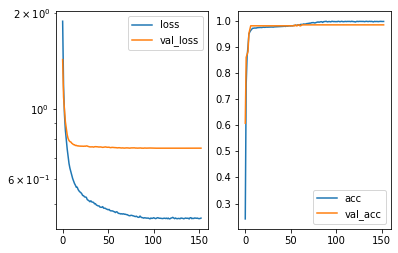

Predicted cell: Cells Probability: [[0.97973365]]
True Cell type: Cells
x [[0.5972569]]
True positional value x 0.7083333333333334
y [[0.58452183]]
True positional value y 0.5


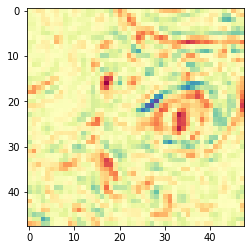

Epoch 154/250
5180/5180 [==============================] - 8s 1ms/step - loss: 0.4512 - acc: 0.9979 - val_loss: 0.7502 - val_acc: 0.9853

Epoch 00154: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7502457213489128, 'val_acc': 0.9853479938629346, 'loss': 0.4512010331779833, 'acc': 0.997876449901625, 'lr': 1e-20}


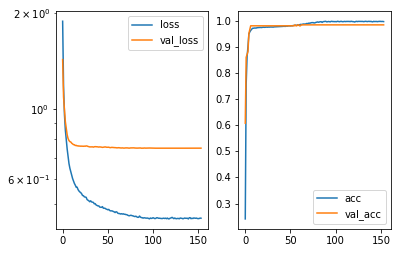

Predicted cell: Cells Probability: [[0.9869442]]
True Cell type: Cells
x [[0.3783491]]
True positional value x 0.2916666666666667
y [[0.3735928]]
True positional value y 0.5


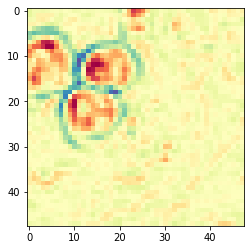

Epoch 155/250
5180/5180 [==============================] - 8s 1ms/step - loss: 0.4497 - acc: 0.9994 - val_loss: 0.7502 - val_acc: 0.9853

Epoch 00155: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7502054135441344, 'val_acc': 0.9853479938629346, 'loss': 0.4496760501824751, 'acc': 0.9994208499731705, 'lr': 1e-20}


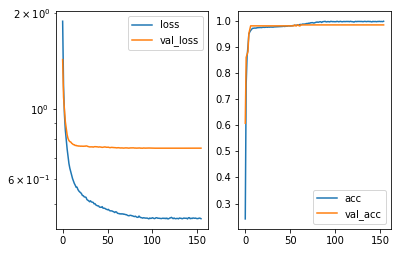

Predicted cell: Cells Probability: [[0.97551435]]
True Cell type: Cells
x [[0.15283823]]
True positional value x 0.2916666666666667
y [[0.5253529]]
True positional value y 0.7083333333333334


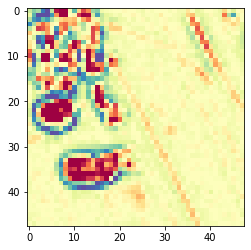

Epoch 156/250
5180/5180 [==============================] - 8s 1ms/step - loss: 0.4502 - acc: 0.9983 - val_loss: 0.7502 - val_acc: 0.9853

Epoch 00156: ReduceLROnPlateau reducing learning rate to 9.999999682655225e-22.

Epoch 00156: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7501775790483524, 'val_acc': 0.9853479938629346, 'loss': 0.4501500981194632, 'acc': 0.9982625499195114, 'lr': 1e-20}


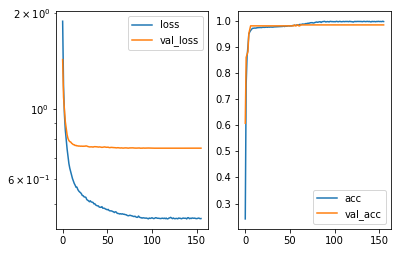

Predicted cell: Cells Probability: [[0.93592364]]
True Cell type: Cells
x [[0.6175195]]
True positional value x 0.5
y [[0.57850033]]
True positional value y 0.2916666666666667


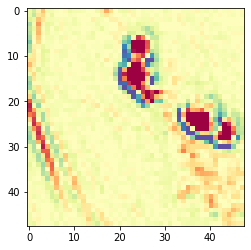

Epoch 157/250
5180/5180 [==============================] - 8s 1ms/step - loss: 0.4511 - acc: 0.9979 - val_loss: 0.7502 - val_acc: 0.9853

Epoch 00157: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7502388148517399, 'val_acc': 0.9853479938629346, 'loss': 0.45106793301446096, 'acc': 0.9978764487509562, 'lr': 1e-21}


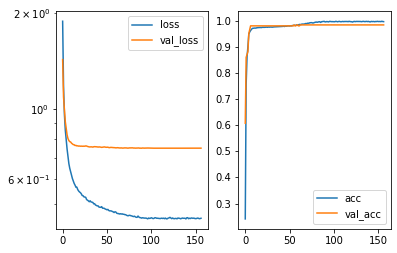

Predicted cell: Cells Probability: [[0.98408717]]
True Cell type: Cells
x [[0.48152098]]
True positional value x 0.5
y [[0.5403422]]
True positional value y 0.5


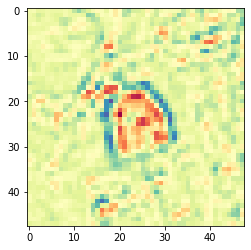

Epoch 158/250
5180/5180 [==============================] - 8s 1ms/step - loss: 0.4522 - acc: 0.9985 - val_loss: 0.7503 - val_acc: 0.9853

Epoch 00158: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7502766574695433, 'val_acc': 0.9853479938629346, 'loss': 0.45220547155063584, 'acc': 0.9984555999284546, 'lr': 1e-21}


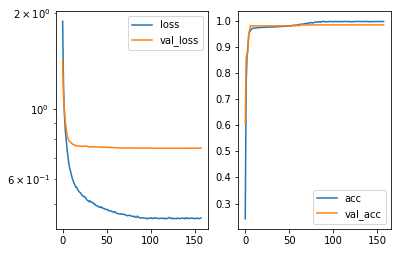

Predicted cell: Normal Probability: [[0.9987791]]
True Cell type: Normal
x [[0.49787647]]
True positional value x 0.5
y [[0.4214377]]
True positional value y 0.5


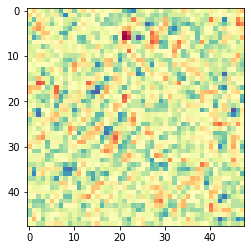

Epoch 159/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4514 - acc: 0.9979 - val_loss: 0.7502 - val_acc: 0.9853

Epoch 00159: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7502276089601901, 'val_acc': 0.9853479938629346, 'loss': 0.4513549899042343, 'acc': 0.997876449901625, 'lr': 1e-21}


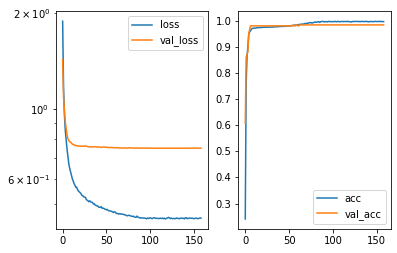

Predicted cell: Cells Probability: [[0.9945581]]
True Cell type: Cells
x [[0.52843165]]
True positional value x 0.5
y [[0.28255016]]
True positional value y 0.5


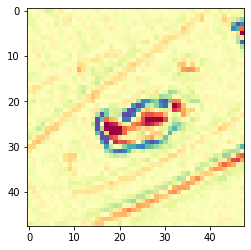

Epoch 160/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4497 - acc: 0.9986 - val_loss: 0.7501 - val_acc: 0.9853

Epoch 00160: ReduceLROnPlateau reducing learning rate to 9.999999682655225e-23.

Epoch 00160: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7501300466366303, 'val_acc': 0.9853479938629346, 'loss': 0.449704043423347, 'acc': 0.9986486499373978, 'lr': 1e-21}


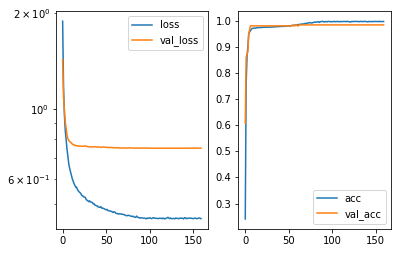

Predicted cell: Cells Probability: [[0.9860275]]
True Cell type: Cells
x [[0.8518854]]
True positional value x 0.7083333333333334
y [[0.41033918]]
True positional value y 0.2916666666666667


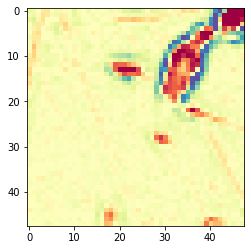

Epoch 161/250
5180/5180 [==============================] - 8s 1ms/step - loss: 0.4506 - acc: 0.9975 - val_loss: 0.7501 - val_acc: 0.9853

Epoch 00161: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7501311162452557, 'val_acc': 0.9853479938629346, 'loss': 0.45055511835459117, 'acc': 0.9974903498837386, 'lr': 9.9999997e-23}


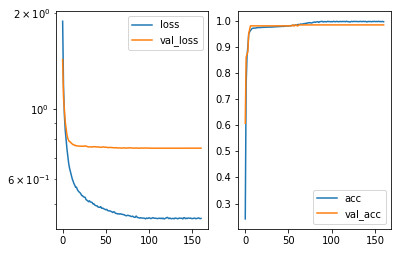

Predicted cell: Cells Probability: [[0.98461795]]
True Cell type: Cells
x [[0.36215633]]
True positional value x 0.5
y [[0.569619]]
True positional value y 0.5


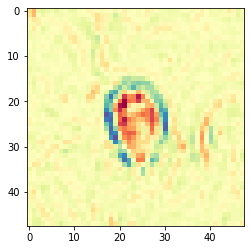

Epoch 162/250
5180/5180 [==============================] - 8s 1ms/step - loss: 0.4509 - acc: 0.9985 - val_loss: 0.7501 - val_acc: 0.9853

Epoch 00162: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7501224995532751, 'val_acc': 0.9853479938629346, 'loss': 0.45093663295723757, 'acc': 0.9984555999284546, 'lr': 9.9999997e-23}


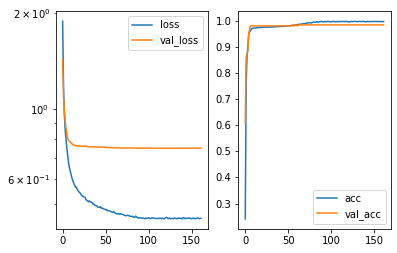

Predicted cell: Cells Probability: [[0.9774426]]
True Cell type: Cells
x [[0.53288114]]
True positional value x 0.5
y [[0.16266476]]
True positional value y 0.2916666666666667


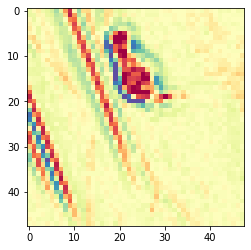

Epoch 163/250
5180/5180 [==============================] - 8s 1ms/step - loss: 0.4520 - acc: 0.9975 - val_loss: 0.7502 - val_acc: 0.9853

Epoch 00163: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.750196886804951, 'val_acc': 0.9853479938629346, 'loss': 0.45196752520601724, 'acc': 0.9974903498837386, 'lr': 9.9999997e-23}


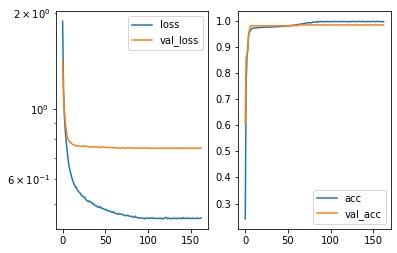

Predicted cell: Cells Probability: [[0.99671245]]
True Cell type: Cells
x [[0.6367236]]
True positional value x 0.5
y [[0.60982174]]
True positional value y 0.7083333333333334


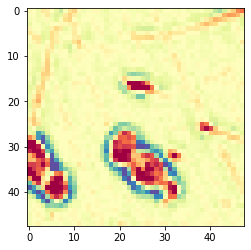

Epoch 164/250
5180/5180 [==============================] - 8s 1ms/step - loss: 0.4509 - acc: 0.9985 - val_loss: 0.7502 - val_acc: 0.9853

Epoch 00164: ReduceLROnPlateau reducing learning rate to 9.999999682655227e-24.

Epoch 00164: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.750238972050803, 'val_acc': 0.9853479938629346, 'loss': 0.45089169957002617, 'acc': 0.9984555999284546, 'lr': 9.9999997e-23}


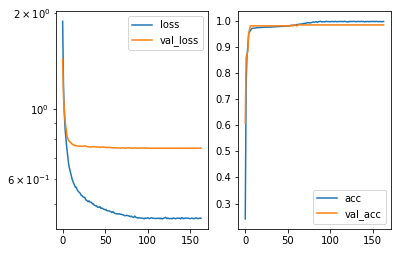

Predicted cell: Normal Probability: [[0.9979449]]
True Cell type: Normal
x [[0.45387763]]
True positional value x 0.5
y [[0.4443184]]
True positional value y 0.5


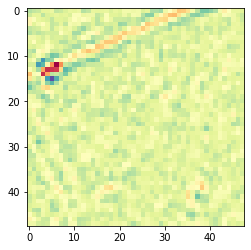

Epoch 165/250
5180/5180 [==============================] - 8s 1ms/step - loss: 0.4532 - acc: 0.9971 - val_loss: 0.7502 - val_acc: 0.9853

Epoch 00165: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7502144234521049, 'val_acc': 0.9853479938629346, 'loss': 0.45324351313491584, 'acc': 0.9971042498658522, 'lr': 1e-23}


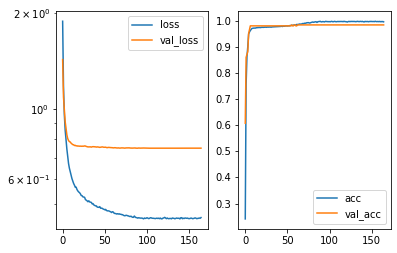

Predicted cell: Cells Probability: [[0.98714966]]
True Cell type: Cells
x [[0.26115423]]
True positional value x 0.2916666666666667
y [[0.604989]]
True positional value y 0.5


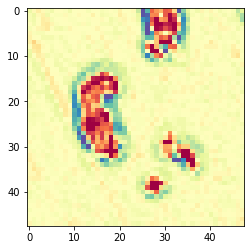

Epoch 166/250
5180/5180 [==============================] - 8s 1ms/step - loss: 0.4505 - acc: 0.9983 - val_loss: 0.7502 - val_acc: 0.9853

Epoch 00166: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7502243088715242, 'val_acc': 0.9853479938629346, 'loss': 0.45047969477517263, 'acc': 0.9982625499195114, 'lr': 1e-23}


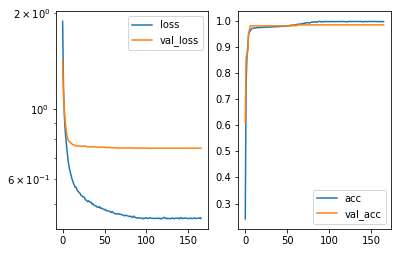

Predicted cell: Normal Probability: [[0.9985915]]
True Cell type: Normal
x [[0.41394138]]
True positional value x 0.5
y [[0.5291774]]
True positional value y 0.5


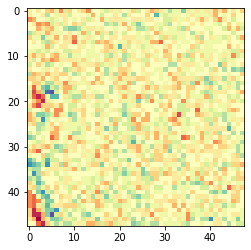

Epoch 167/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4517 - acc: 0.9983 - val_loss: 0.7501 - val_acc: 0.9853

Epoch 00167: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7501379345362876, 'val_acc': 0.9853479938629346, 'loss': 0.45170342185782647, 'acc': 0.9982625499195114, 'lr': 1e-23}


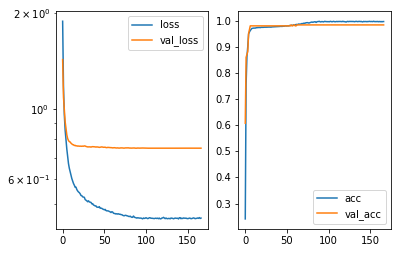

Predicted cell: Cells Probability: [[0.9922356]]
True Cell type: Normal
x [[0.57805234]]
True positional value x 0.5
y [[0.63814515]]
True positional value y 0.5


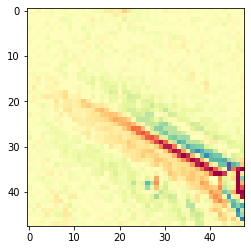

Epoch 168/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4510 - acc: 0.9990 - val_loss: 0.7502 - val_acc: 0.9853

Epoch 00168: ReduceLROnPlateau reducing learning rate to 9.999999998199588e-25.

Epoch 00168: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7501524132249993, 'val_acc': 0.9853479938629346, 'loss': 0.4510306506543546, 'acc': 0.9990347499552841, 'lr': 1e-23}


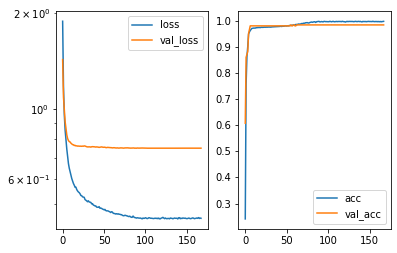

Predicted cell: Cells Probability: [[0.99388254]]
True Cell type: Cells
x [[0.5359413]]
True positional value x 0.2916666666666667
y [[0.26840585]]
True positional value y 0.2916666666666667


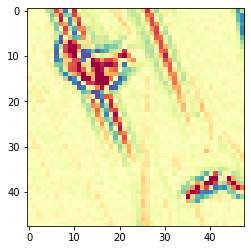

Epoch 169/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4502 - acc: 0.9981 - val_loss: 0.7501 - val_acc: 0.9853

Epoch 00169: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7500874948152255, 'val_acc': 0.9853479938629346, 'loss': 0.4502466201321959, 'acc': 0.9980694999105681, 'lr': 1e-24}


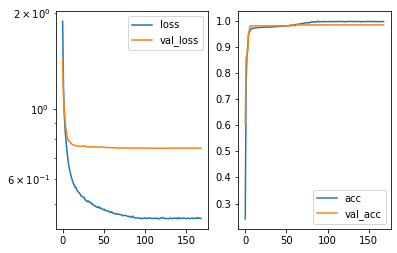

Predicted cell: Cells Probability: [[0.99256915]]
True Cell type: Cells
x [[0.46772757]]
True positional value x 0.5
y [[0.2042116]]
True positional value y 0.5


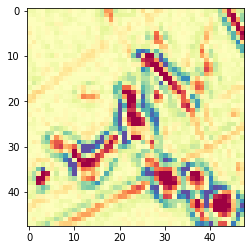

Epoch 170/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4509 - acc: 0.9986 - val_loss: 0.7501 - val_acc: 0.9853

Epoch 00170: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7500550244754051, 'val_acc': 0.9853479938629346, 'loss': 0.4508533424852437, 'acc': 0.9986486499373978, 'lr': 1e-24}


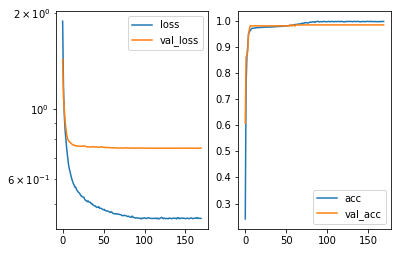

Predicted cell: Cells Probability: [[0.99412525]]
True Cell type: Cells
x [[0.87961465]]
True positional value x 0.7083333333333334
y [[0.7212278]]
True positional value y 0.5


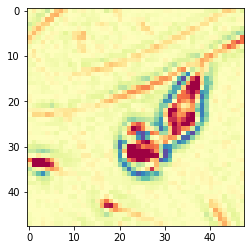

Epoch 171/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4510 - acc: 0.9986 - val_loss: 0.7502 - val_acc: 0.9853

Epoch 00171: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7501521023201855, 'val_acc': 0.9853479938629346, 'loss': 0.45103591312312713, 'acc': 0.9986486499373978, 'lr': 1e-24}


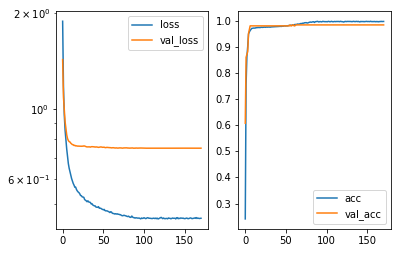

Predicted cell: Cells Probability: [[0.9944841]]
True Cell type: Cells
x [[0.63902134]]
True positional value x 0.7083333333333334
y [[0.3892455]]
True positional value y 0.5


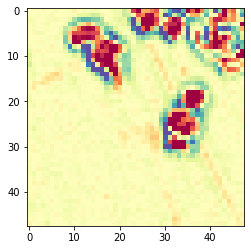

Epoch 172/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4511 - acc: 0.9983 - val_loss: 0.7501 - val_acc: 0.9853

Epoch 00172: ReduceLROnPlateau reducing learning rate to 1.0000000195414814e-25.

Epoch 00172: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7501059087204845, 'val_acc': 0.9853479938629346, 'loss': 0.4510506432949346, 'acc': 0.9982625499195114, 'lr': 1e-24}


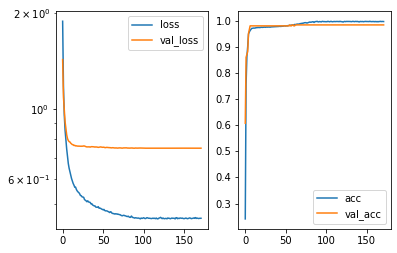

Predicted cell: Cells Probability: [[0.9690717]]
True Cell type: Cells
x [[0.25942823]]
True positional value x 0.2916666666666667
y [[0.66071975]]
True positional value y 0.7083333333333334


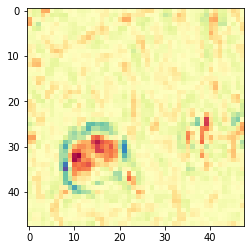

Epoch 173/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4501 - acc: 0.9988 - val_loss: 0.7502 - val_acc: 0.9853

Epoch 00173: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7502278484704293, 'val_acc': 0.9853479938629346, 'loss': 0.4501331114861035, 'acc': 0.9988416999463409, 'lr': 1e-25}


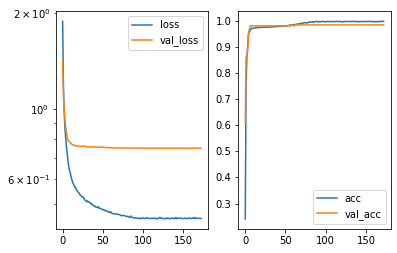

Predicted cell: Cells Probability: [[0.7412633]]
True Cell type: Cells
x [[0.6942818]]
True positional value x 0.7083333333333334
y [[0.35455343]]
True positional value y 0.2916666666666667


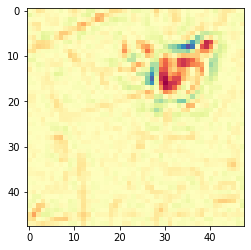

Epoch 174/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4504 - acc: 0.9981 - val_loss: 0.7503 - val_acc: 0.9853

Epoch 00174: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7502898501825856, 'val_acc': 0.9853479938629346, 'loss': 0.45041266003170527, 'acc': 0.9980694999105681, 'lr': 1e-25}


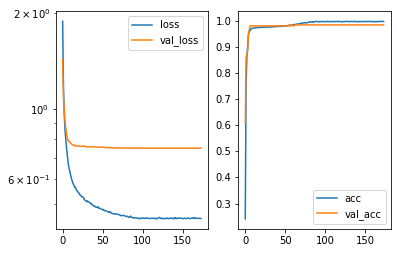

Predicted cell: Cells Probability: [[0.992769]]
True Cell type: Cells
x [[0.8201234]]
True positional value x 0.7083333333333334
y [[0.54038817]]
True positional value y 0.5


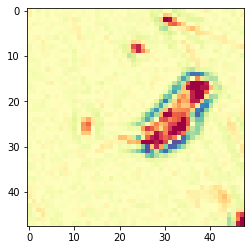

Epoch 175/250
5180/5180 [==============================] - 8s 1ms/step - loss: 0.4522 - acc: 0.9969 - val_loss: 0.7502 - val_acc: 0.9853

Epoch 00175: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7502280124377855, 'val_acc': 0.9853479938629346, 'loss': 0.4521662820720304, 'acc': 0.9969111998569091, 'lr': 1e-25}


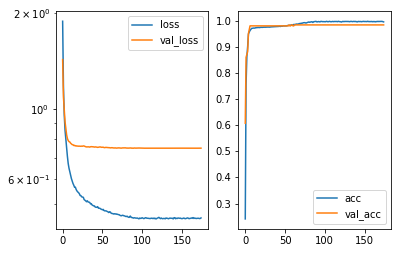

Predicted cell: Cells Probability: [[0.9157003]]
True Cell type: Cells
x [[0.22828162]]
True positional value x 0.2916666666666667
y [[0.30153948]]
True positional value y 0.2916666666666667


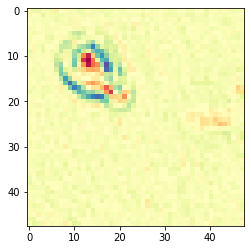

Epoch 176/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4505 - acc: 0.9977 - val_loss: 0.7503 - val_acc: 0.9853

Epoch 00176: ReduceLROnPlateau reducing learning rate to 1.0000000195414814e-26.

Epoch 00176: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7502784025974762, 'val_acc': 0.9853479938629346, 'loss': 0.4505226563762974, 'acc': 0.9976833998926818, 'lr': 1e-25}


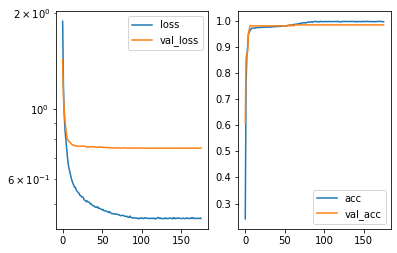

Predicted cell: Cells Probability: [[0.990302]]
True Cell type: Cells
x [[0.31401086]]
True positional value x 0.2916666666666667
y [[0.62252563]]
True positional value y 0.5


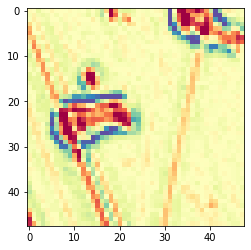

Epoch 177/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4515 - acc: 0.9975 - val_loss: 0.7501 - val_acc: 0.9853

Epoch 00177: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7500995978330954, 'val_acc': 0.9853479938629346, 'loss': 0.4515394147298511, 'acc': 0.9974903498837386, 'lr': 1e-26}


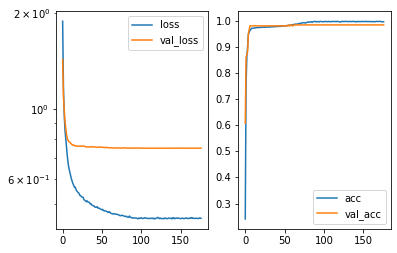

Predicted cell: Cells Probability: [[0.98297095]]
True Cell type: Cells
x [[0.44463706]]
True positional value x 0.2916666666666667
y [[0.5208287]]
True positional value y 0.7083333333333334


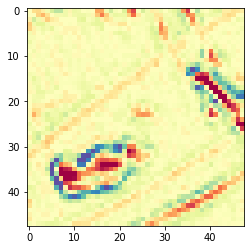

Epoch 178/250
5180/5180 [==============================] - 8s 1ms/step - loss: 0.4500 - acc: 0.9981 - val_loss: 0.7501 - val_acc: 0.9853

Epoch 00178: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7501474841610416, 'val_acc': 0.9853479938629346, 'loss': 0.4499915440110166, 'acc': 0.9980694999105681, 'lr': 1e-26}


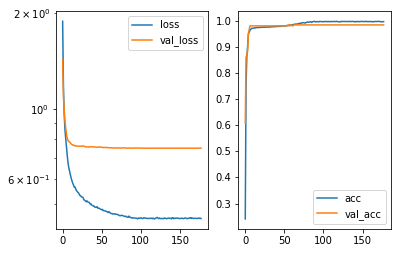

Predicted cell: Cells Probability: [[0.99011153]]
True Cell type: Cells
x [[0.7330873]]
True positional value x 0.7083333333333334
y [[0.2407149]]
True positional value y 0.7083333333333334


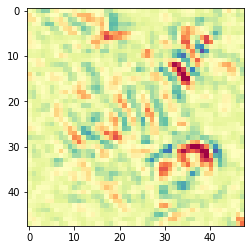

Epoch 179/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4506 - acc: 0.9990 - val_loss: 0.7502 - val_acc: 0.9853

Epoch 00179: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7501949154850327, 'val_acc': 0.9853479938629346, 'loss': 0.4505751567917901, 'acc': 0.9990347499552841, 'lr': 1e-26}


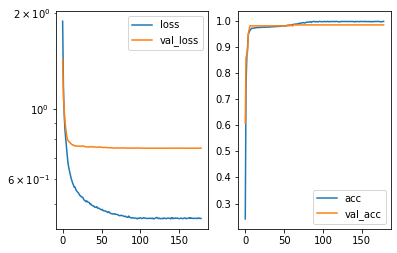

Predicted cell: Cells Probability: [[0.99185055]]
True Cell type: Cells
x [[0.17135684]]
True positional value x 0.5
y [[0.33812314]]
True positional value y 0.2916666666666667


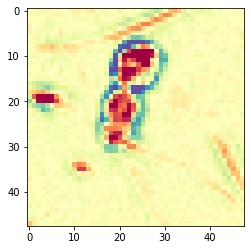

Epoch 180/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4522 - acc: 0.9973 - val_loss: 0.7503 - val_acc: 0.9853

Epoch 00180: ReduceLROnPlateau reducing learning rate to 9.999999887266024e-28.

Epoch 00180: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7502874087938022, 'val_acc': 0.9853479938629346, 'loss': 0.45219333452607674, 'acc': 0.9972972998747954, 'lr': 1e-26}


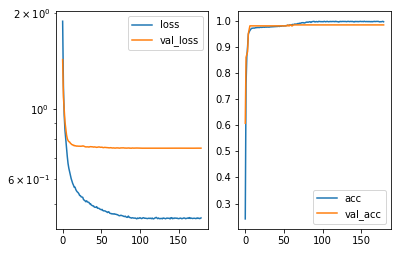

Predicted cell: Cells Probability: [[0.9918643]]
True Cell type: Cells
x [[0.36789075]]
True positional value x 0.5
y [[0.88657033]]
True positional value y 0.7083333333333334


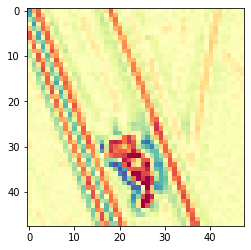

Epoch 181/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4510 - acc: 0.9986 - val_loss: 0.7503 - val_acc: 0.9853

Epoch 00181: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7503351831174159, 'val_acc': 0.9853479938629346, 'loss': 0.45103552212586273, 'acc': 0.9986486499373978, 'lr': 1e-27}


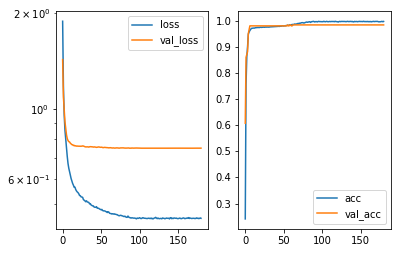

Predicted cell: Cells Probability: [[0.9910348]]
True Cell type: Cells
x [[0.43290722]]
True positional value x 0.5
y [[0.7475265]]
True positional value y 0.7083333333333334


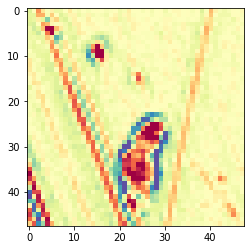

Epoch 182/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4513 - acc: 0.9969 - val_loss: 0.7503 - val_acc: 0.9853

Epoch 00182: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7503401737510066, 'val_acc': 0.9853479938629346, 'loss': 0.45129687077290304, 'acc': 0.9969111998569091, 'lr': 1e-27}


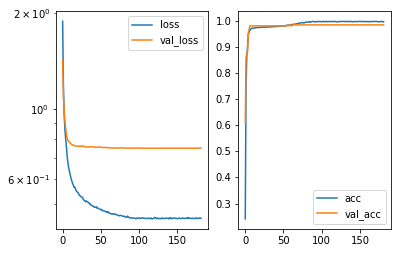

Predicted cell: Cells Probability: [[0.9361717]]
True Cell type: Cells
x [[0.61617255]]
True positional value x 0.5
y [[0.577862]]
True positional value y 0.2916666666666667


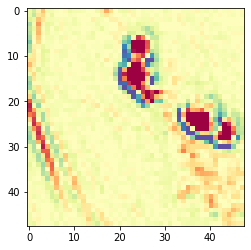

Epoch 183/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4519 - acc: 0.9975 - val_loss: 0.7504 - val_acc: 0.9853

Epoch 00183: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7504293859659971, 'val_acc': 0.9853479938629346, 'loss': 0.45193083152807817, 'acc': 0.9974903498837386, 'lr': 1e-27}


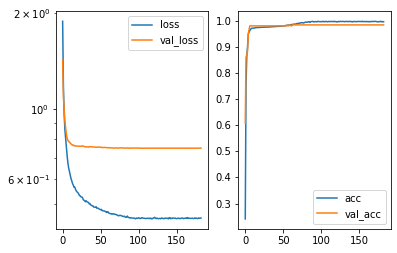

Predicted cell: Cells Probability: [[0.99496764]]
True Cell type: Cells
x [[0.27446866]]
True positional value x 0.2916666666666667
y [[0.715462]]
True positional value y 0.7083333333333334


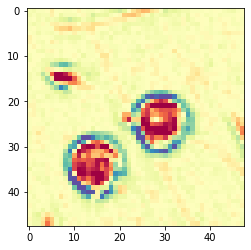

Epoch 184/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4512 - acc: 0.9985 - val_loss: 0.7503 - val_acc: 0.9853

Epoch 00184: ReduceLROnPlateau reducing learning rate to 1.0000000272452012e-28.

Epoch 00184: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7503262769171607, 'val_acc': 0.9853479938629346, 'loss': 0.45117950209319363, 'acc': 0.9984555999284546, 'lr': 1e-27}


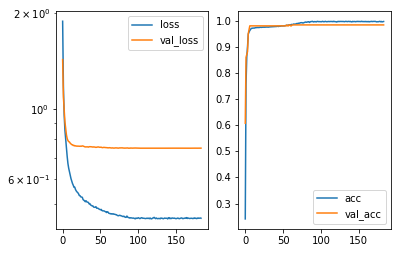

Predicted cell: Cells Probability: [[0.97271293]]
True Cell type: Cells
x [[0.76998764]]
True positional value x 0.7083333333333334
y [[0.82896656]]
True positional value y 0.7083333333333334


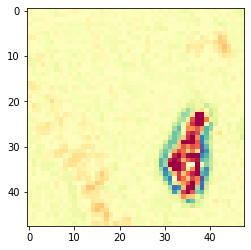

Epoch 185/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4510 - acc: 0.9981 - val_loss: 0.7502 - val_acc: 0.9853

Epoch 00185: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.750246891826937, 'val_acc': 0.9853479938629346, 'loss': 0.4509782756617631, 'acc': 0.9980694999105681, 'lr': 1e-28}


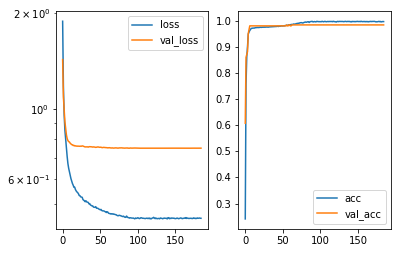

Predicted cell: Cells Probability: [[0.98630965]]
True Cell type: Cells
x [[0.7503699]]
True positional value x 0.7083333333333334
y [[0.63168937]]
True positional value y 0.7083333333333334


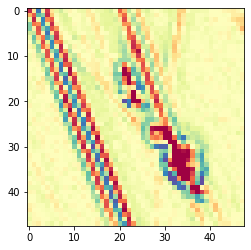

Epoch 186/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4506 - acc: 0.9985 - val_loss: 0.7503 - val_acc: 0.9853

Epoch 00186: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7503073160901611, 'val_acc': 0.9853479938629346, 'loss': 0.45058257768513155, 'acc': 0.9984555999284546, 'lr': 1e-28}


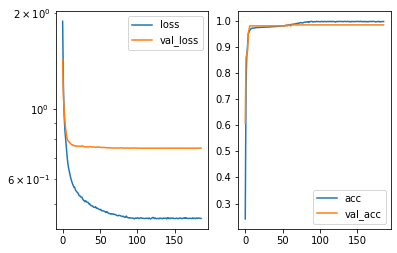

Predicted cell: Cells Probability: [[0.99541545]]
True Cell type: Cells
x [[0.39541787]]
True positional value x 0.7083333333333334
y [[0.5175775]]
True positional value y 0.5


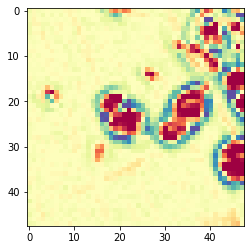

Epoch 187/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4496 - acc: 0.9990 - val_loss: 0.7502 - val_acc: 0.9853

Epoch 00187: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7501563975662539, 'val_acc': 0.9853479938629346, 'loss': 0.44962513561874745, 'acc': 0.9990347499552841, 'lr': 1e-28}


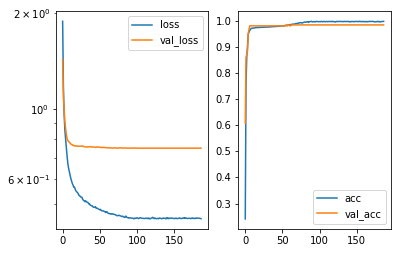

Predicted cell: Cells Probability: [[0.98535407]]
True Cell type: Cells
x [[0.38193503]]
True positional value x 0.2916666666666667
y [[0.69890267]]
True positional value y 0.5


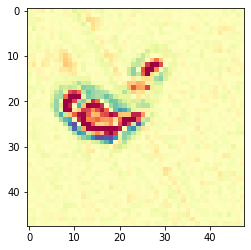

Epoch 188/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4504 - acc: 0.9973 - val_loss: 0.7502 - val_acc: 0.9853

Epoch 00188: ReduceLROnPlateau reducing learning rate to 1.0000000031710769e-29.

Epoch 00188: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7502173905844217, 'val_acc': 0.9853479938629346, 'loss': 0.4503907409413901, 'acc': 0.9972972987241266, 'lr': 1e-28}


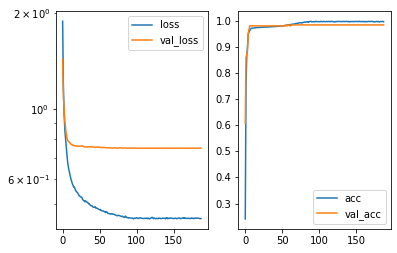

Predicted cell: Cells Probability: [[0.91568106]]
True Cell type: Cells
x [[0.22841702]]
True positional value x 0.2916666666666667
y [[0.30202118]]
True positional value y 0.2916666666666667


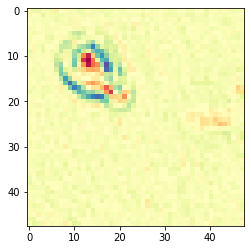

Epoch 189/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4500 - acc: 0.9979 - val_loss: 0.7502 - val_acc: 0.9853

Epoch 00189: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7502203985448286, 'val_acc': 0.9853479938629346, 'loss': 0.4500187980622398, 'acc': 0.997876449901625, 'lr': 1e-29}


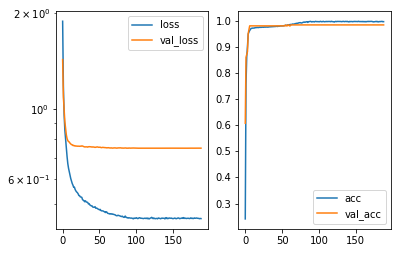

Predicted cell: Cells Probability: [[0.97424024]]
True Cell type: Cells
x [[0.7087327]]
True positional value x 0.7083333333333334
y [[0.76458275]]
True positional value y 0.7083333333333334


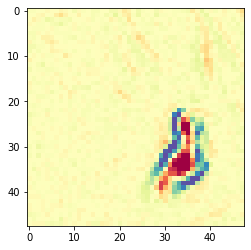

Epoch 190/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4522 - acc: 0.9979 - val_loss: 0.7502 - val_acc: 0.9853

Epoch 00190: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7502152323722839, 'val_acc': 0.9853479938629346, 'loss': 0.4522428344575595, 'acc': 0.9978764487509562, 'lr': 1e-29}


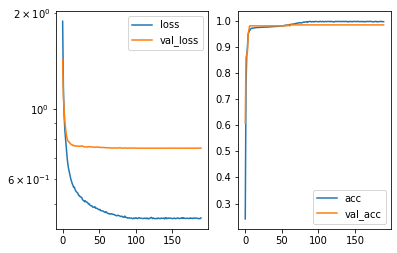

Predicted cell: Cells Probability: [[0.89740777]]
True Cell type: Cells
x [[0.6306495]]
True positional value x 0.7083333333333334
y [[0.42765427]]
True positional value y 0.2916666666666667


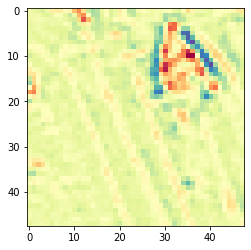

Epoch 191/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4502 - acc: 0.9985 - val_loss: 0.7502 - val_acc: 0.9853

Epoch 00191: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7502288888225626, 'val_acc': 0.9853479938629346, 'loss': 0.4501721863580947, 'acc': 0.9984555999284546, 'lr': 1e-29}


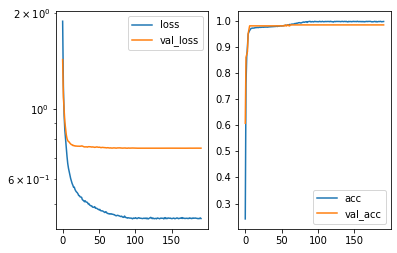

Predicted cell: Cells Probability: [[0.9447064]]
True Cell type: Cells
x [[0.759739]]
True positional value x 0.7083333333333334
y [[0.24240547]]
True positional value y 0.2916666666666667


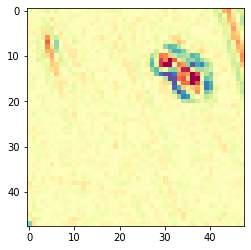

Epoch 192/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4502 - acc: 0.9983 - val_loss: 0.7501 - val_acc: 0.9853

Epoch 00192: ReduceLROnPlateau reducing learning rate to 1.0000000031710769e-30.

Epoch 00192: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7501239433830038, 'val_acc': 0.9853479938629346, 'loss': 0.450153661510659, 'acc': 0.9982625499195114, 'lr': 1e-29}


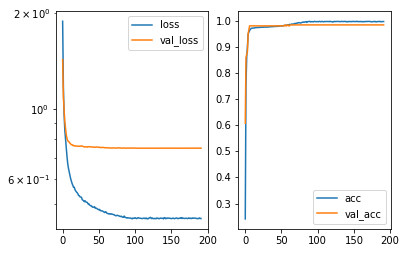

Predicted cell: Cells Probability: [[0.974477]]
True Cell type: Cells
x [[0.63378173]]
True positional value x 0.5
y [[0.68564284]]
True positional value y 0.7083333333333334


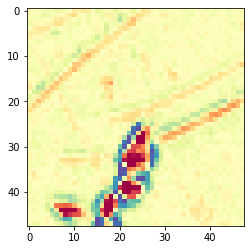

Epoch 193/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4538 - acc: 0.9981 - val_loss: 0.7502 - val_acc: 0.9853

Epoch 00193: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7501597712328146, 'val_acc': 0.9853479938629346, 'loss': 0.45381111965216264, 'acc': 0.9980694999105681, 'lr': 1e-30}


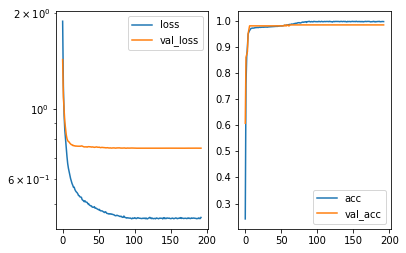

Predicted cell: Cells Probability: [[0.9755079]]
True Cell type: Cells
x [[0.15269506]]
True positional value x 0.2916666666666667
y [[0.5256246]]
True positional value y 0.7083333333333334


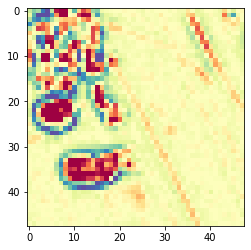

Epoch 194/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4496 - acc: 0.9990 - val_loss: 0.7502 - val_acc: 0.9853

Epoch 00194: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7501727731236608, 'val_acc': 0.9853479938629346, 'loss': 0.4495918605778668, 'acc': 0.9990347499552841, 'lr': 1e-30}


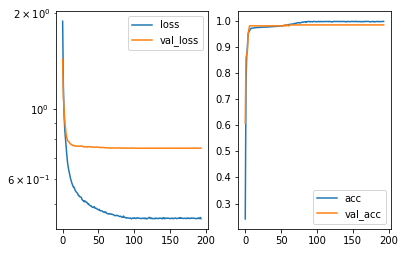

Predicted cell: Normal Probability: [[0.99167764]]
True Cell type: Normal
x [[0.49617755]]
True positional value x 0.5
y [[0.55405]]
True positional value y 0.5


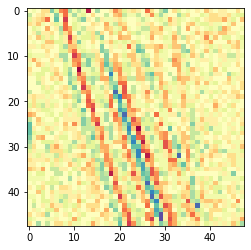

Epoch 195/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4497 - acc: 0.9990 - val_loss: 0.7501 - val_acc: 0.9853

Epoch 00195: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7501155657645984, 'val_acc': 0.9853479938629346, 'loss': 0.449727261388624, 'acc': 0.9990347499552841, 'lr': 1e-30}


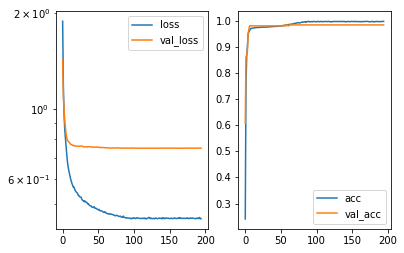

Predicted cell: Cells Probability: [[0.9918691]]
True Cell type: Cells
x [[0.49822286]]
True positional value x 0.5
y [[0.31769693]]
True positional value y 0.7083333333333334


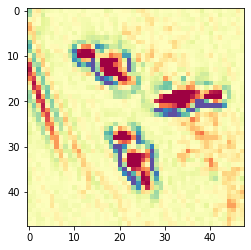

Epoch 196/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4492 - acc: 0.9985 - val_loss: 0.7502 - val_acc: 0.9853

Epoch 00196: ReduceLROnPlateau reducing learning rate to 1.000000003171077e-31.

Epoch 00196: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7501647633947296, 'val_acc': 0.9853479938629346, 'loss': 0.449151547489019, 'acc': 0.9984555999284546, 'lr': 1e-30}


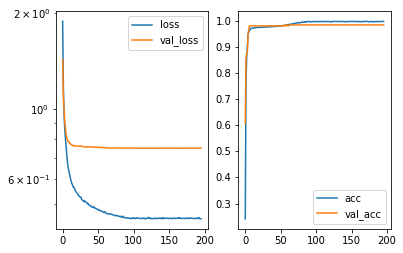

Predicted cell: Cells Probability: [[0.97100675]]
True Cell type: Cells
x [[0.4159293]]
True positional value x 0.2916666666666667
y [[0.7860978]]
True positional value y 0.7083333333333334


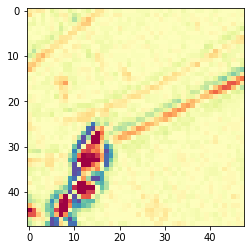

Epoch 197/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4505 - acc: 0.9988 - val_loss: 0.7502 - val_acc: 0.9853

Epoch 00197: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7501704836939718, 'val_acc': 0.9853479938629346, 'loss': 0.4505354235071013, 'acc': 0.9988416999463409, 'lr': 1e-31}


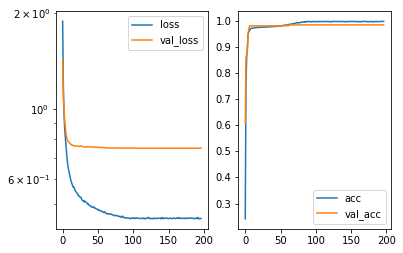

Predicted cell: Cells Probability: [[0.99389416]]
True Cell type: Cells
x [[0.53564626]]
True positional value x 0.2916666666666667
y [[0.26831678]]
True positional value y 0.2916666666666667


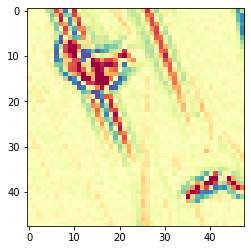

Epoch 198/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4507 - acc: 0.9981 - val_loss: 0.7501 - val_acc: 0.9853

Epoch 00198: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7500894231237335, 'val_acc': 0.9853479938629346, 'loss': 0.4507163528309826, 'acc': 0.9980694999105681, 'lr': 1e-31}


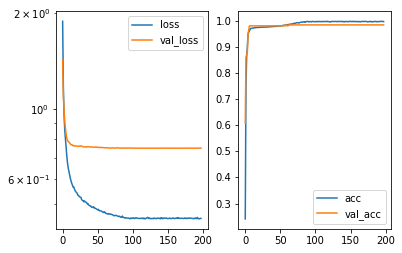

Predicted cell: Cells Probability: [[0.97258604]]
True Cell type: Cells
x [[0.29286438]]
True positional value x 0.2916666666666667
y [[0.83636445]]
True positional value y 0.7083333333333334


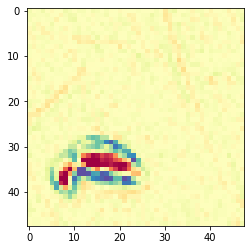

Epoch 199/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4493 - acc: 0.9986 - val_loss: 0.7502 - val_acc: 0.9853

Epoch 00199: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7501537520370204, 'val_acc': 0.9853479938629346, 'loss': 0.4493111434130135, 'acc': 0.9986486499373978, 'lr': 1e-31}


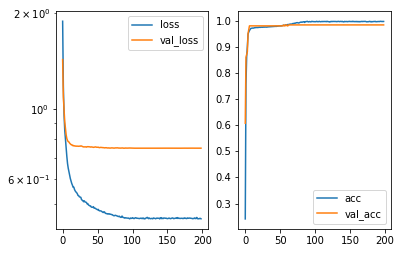

Predicted cell: Cells Probability: [[0.9923149]]
True Cell type: Cells
x [[0.28293604]]
True positional value x 0.2916666666666667
y [[0.84409595]]
True positional value y 0.7083333333333334


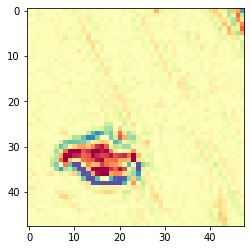

Epoch 200/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4498 - acc: 0.9985 - val_loss: 0.7503 - val_acc: 0.9853

Epoch 00200: ReduceLROnPlateau reducing learning rate to 9.999999796611899e-33.

Epoch 00200: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7502722724890097, 'val_acc': 0.9853479938629346, 'loss': 0.44982424850169295, 'acc': 0.9984555999284546, 'lr': 1e-31}


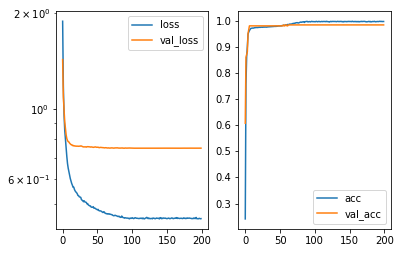

Predicted cell: Cells Probability: [[0.94473445]]
True Cell type: Cells
x [[0.7599398]]
True positional value x 0.7083333333333334
y [[0.24228415]]
True positional value y 0.2916666666666667


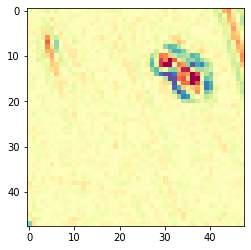

Epoch 201/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4504 - acc: 0.9985 - val_loss: 0.7502 - val_acc: 0.9853

Epoch 00201: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7502368282485794, 'val_acc': 0.9853479938629346, 'loss': 0.4504011489709832, 'acc': 0.9984555999284546, 'lr': 9.9999995e-33}


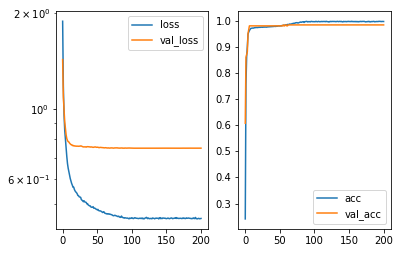

Predicted cell: Cells Probability: [[0.9286502]]
True Cell type: Cells
x [[0.69360715]]
True positional value x 0.7083333333333334
y [[0.4999616]]
True positional value y 0.2916666666666667


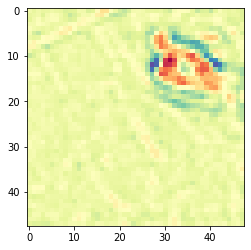

Epoch 202/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4514 - acc: 0.9973 - val_loss: 0.7502 - val_acc: 0.9853

Epoch 00202: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7501917865686801, 'val_acc': 0.9853479938629346, 'loss': 0.451386073381284, 'acc': 0.9972972978035916, 'lr': 9.9999995e-33}


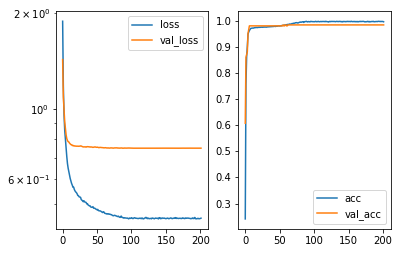

Predicted cell: Cells Probability: [[0.9876244]]
True Cell type: Cells
x [[0.06131401]]
True positional value x 0.2916666666666667
y [[0.74069226]]
True positional value y 0.7083333333333334


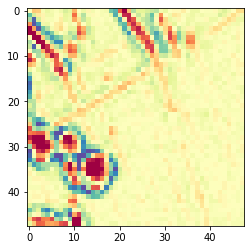

Epoch 203/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4514 - acc: 0.9990 - val_loss: 0.7502 - val_acc: 0.9853

Epoch 00203: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7502178386017516, 'val_acc': 0.9853479938629346, 'loss': 0.45144803068352485, 'acc': 0.9990347499552841, 'lr': 9.9999995e-33}


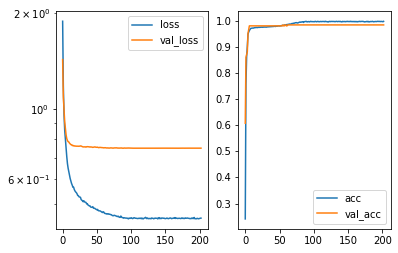

Predicted cell: Cells Probability: [[0.9378189]]
True Cell type: Cells
x [[0.51143265]]
True positional value x 0.7083333333333334
y [[0.71204484]]
True positional value y 0.7083333333333334


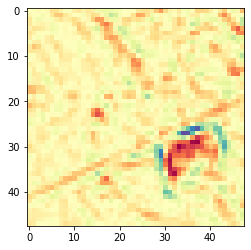

Epoch 204/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4505 - acc: 0.9977 - val_loss: 0.7502 - val_acc: 0.9853

Epoch 00204: ReduceLROnPlateau reducing learning rate to 9.999999502738312e-34.

Epoch 00204: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7502257195147839, 'val_acc': 0.9853479938629346, 'loss': 0.4504649422803901, 'acc': 0.997683398742013, 'lr': 9.9999995e-33}


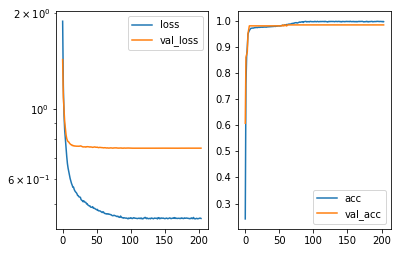

Predicted cell: Cells Probability: [[0.9946548]]
True Cell type: Cells
x [[0.7486863]]
True positional value x 0.5
y [[0.40465897]]
True positional value y 0.2916666666666667


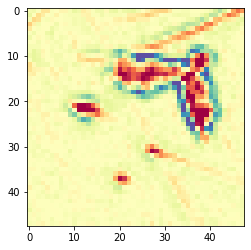

Epoch 205/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4520 - acc: 0.9971 - val_loss: 0.7502 - val_acc: 0.9853

Epoch 00205: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7502051432490785, 'val_acc': 0.9853479938629346, 'loss': 0.4519869379095129, 'acc': 0.9971042498658522, 'lr': 9.999999e-34}


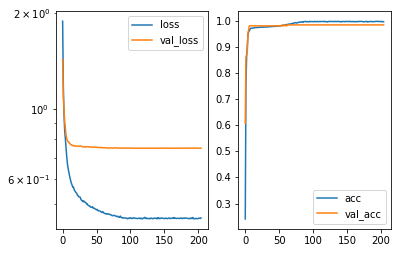

Predicted cell: Cells Probability: [[0.99667215]]
True Cell type: Cells
x [[0.6612947]]
True positional value x 0.5
y [[0.9018516]]
True positional value y 0.7083333333333334


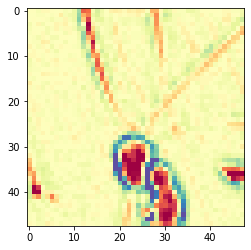

Epoch 206/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4512 - acc: 0.9973 - val_loss: 0.7502 - val_acc: 0.9853

Epoch 00206: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7502077130170969, 'val_acc': 0.9853479938629346, 'loss': 0.4511651306999236, 'acc': 0.9972972998747954, 'lr': 9.999999e-34}


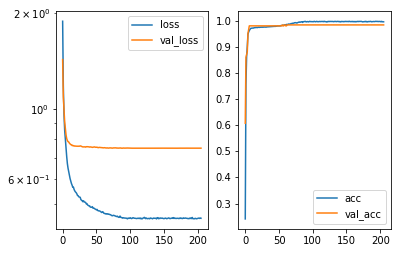

Predicted cell: Cells Probability: [[0.9872356]]
True Cell type: Cells
x [[0.3290535]]
True positional value x 0.5
y [[0.5235092]]
True positional value y 0.7083333333333334


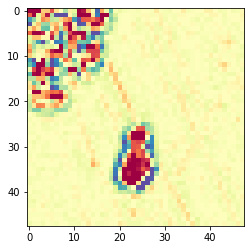

Epoch 207/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4511 - acc: 0.9983 - val_loss: 0.7502 - val_acc: 0.9853

Epoch 00207: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7501891897274897, 'val_acc': 0.9853479938629346, 'loss': 0.4510821373306186, 'acc': 0.9982625499195114, 'lr': 9.999999e-34}


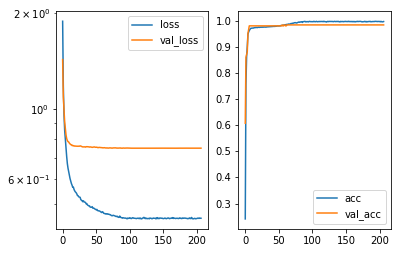

Predicted cell: Normal Probability: [[0.9860135]]
True Cell type: Normal
x [[0.5259588]]
True positional value x 0.5
y [[0.46674562]]
True positional value y 0.5


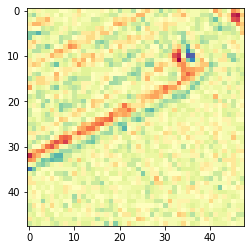

Epoch 208/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4501 - acc: 0.9988 - val_loss: 0.7502 - val_acc: 0.9853

Epoch 00208: ReduceLROnPlateau reducing learning rate to 9.999999319067318e-35.

Epoch 00208: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.750158218455402, 'val_acc': 0.9853479938629346, 'loss': 0.45009470239109056, 'acc': 0.9988416999463409, 'lr': 9.999999e-34}


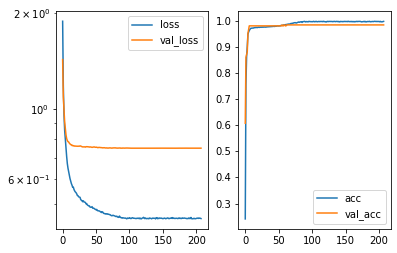

Predicted cell: Cells Probability: [[0.9953922]]
True Cell type: Cells
x [[0.24669276]]
True positional value x 0.2916666666666667
y [[0.6046163]]
True positional value y 0.5


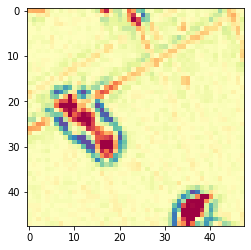

Epoch 209/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4507 - acc: 0.9977 - val_loss: 0.7502 - val_acc: 0.9853

Epoch 00209: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7501757107811533, 'val_acc': 0.9853479938629346, 'loss': 0.4507413718230936, 'acc': 0.9976833998926818, 'lr': 9.999999e-35}


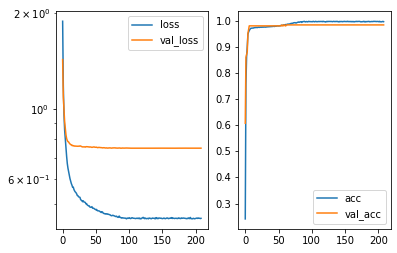

Predicted cell: Cells Probability: [[0.9987728]]
True Cell type: Cells
x [[0.38287103]]
True positional value x 0.5
y [[0.48122886]]
True positional value y 0.7083333333333334


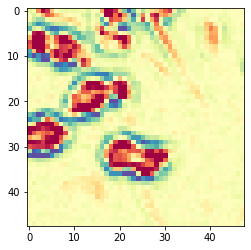

Epoch 210/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4504 - acc: 0.9983 - val_loss: 0.7502 - val_acc: 0.9853

Epoch 00210: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.750187547870608, 'val_acc': 0.9853479938629346, 'loss': 0.4503671651181107, 'acc': 0.9982625499195114, 'lr': 9.999999e-35}


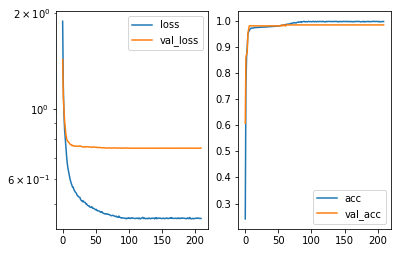

Predicted cell: Cells Probability: [[0.99994886]]
True Cell type: Cells
x [[0.18739784]]
True positional value x 0.2916666666666667
y [[0.2922432]]
True positional value y 0.5


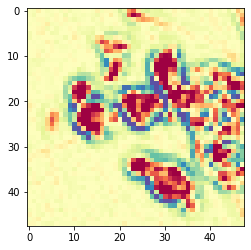

Epoch 211/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4503 - acc: 0.9986 - val_loss: 0.7503 - val_acc: 0.9853

Epoch 00211: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7502503392897246, 'val_acc': 0.9853479938629346, 'loss': 0.4502638085928663, 'acc': 0.9986486499373978, 'lr': 9.999999e-35}


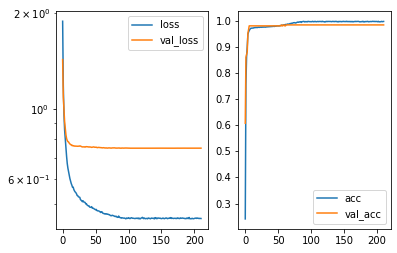

Predicted cell: Cells Probability: [[0.99084395]]
True Cell type: Cells
x [[0.3532755]]
True positional value x 0.5
y [[0.34454614]]
True positional value y 0.5


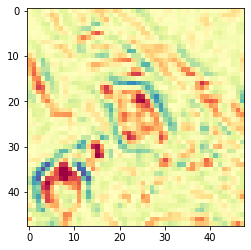

Epoch 212/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4512 - acc: 0.9981 - val_loss: 0.7503 - val_acc: 0.9853

Epoch 00212: ReduceLROnPlateau reducing learning rate to 9.999999319067319e-36.

Epoch 00212: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7503061034740546, 'val_acc': 0.9853479938629346, 'loss': 0.45118680907032205, 'acc': 0.9980694987598994, 'lr': 9.999999e-35}


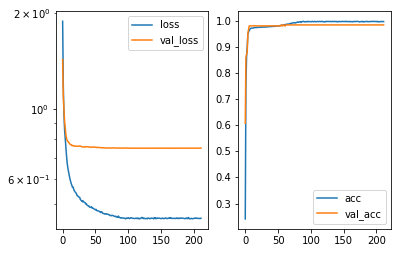

Predicted cell: Cells Probability: [[0.98043126]]
True Cell type: Cells
x [[0.64104587]]
True positional value x 0.7083333333333334
y [[0.47926146]]
True positional value y 0.5


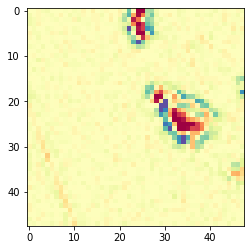

Epoch 213/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4528 - acc: 0.9973 - val_loss: 0.7503 - val_acc: 0.9853

Epoch 00213: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7503258808628543, 'val_acc': 0.9853479938629346, 'loss': 0.45277280397857017, 'acc': 0.9972972998747954, 'lr': 9.9999995e-36}


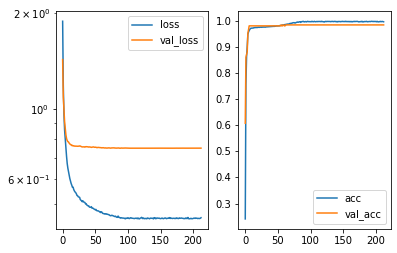

Predicted cell: Cells Probability: [[0.97797304]]
True Cell type: Cells
x [[0.6495992]]
True positional value x 0.7083333333333334
y [[0.37453043]]
True positional value y 0.5


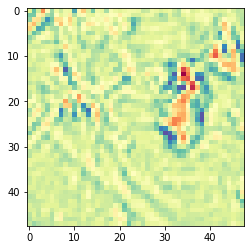

Epoch 214/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4491 - acc: 0.9994 - val_loss: 0.7502 - val_acc: 0.9853

Epoch 00214: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7501733189537412, 'val_acc': 0.9853479938629346, 'loss': 0.449094472704707, 'acc': 0.9994208499731705, 'lr': 9.9999995e-36}


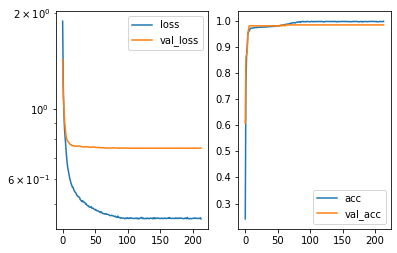

Predicted cell: Cells Probability: [[0.98404354]]
True Cell type: Cells
x [[0.4813315]]
True positional value x 0.5
y [[0.5398383]]
True positional value y 0.5


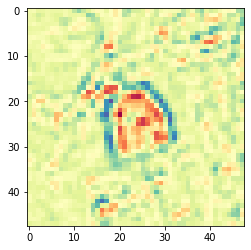

Epoch 215/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4491 - acc: 0.9992 - val_loss: 0.7501 - val_acc: 0.9853

Epoch 00215: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7501392233502734, 'val_acc': 0.9853479938629346, 'loss': 0.4491348411585834, 'acc': 0.9992277999642273, 'lr': 9.9999995e-36}


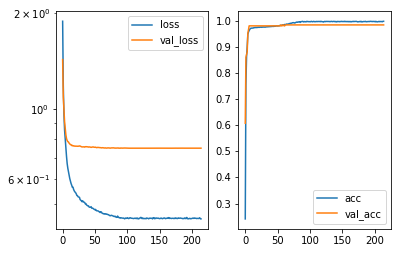

Predicted cell: Cells Probability: [[0.8971637]]
True Cell type: Cells
x [[0.6306175]]
True positional value x 0.7083333333333334
y [[0.42891237]]
True positional value y 0.2916666666666667


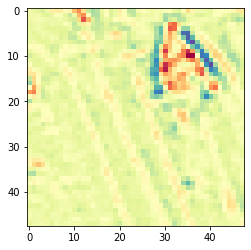

Epoch 216/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4494 - acc: 0.9988 - val_loss: 0.7501 - val_acc: 0.9853

Epoch 00216: ReduceLROnPlateau reducing learning rate to 9.999999462560281e-37.

Epoch 00216: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7501286189634722, 'val_acc': 0.9853479938629346, 'loss': 0.44935493096421586, 'acc': 0.9988416999463409, 'lr': 9.9999995e-36}


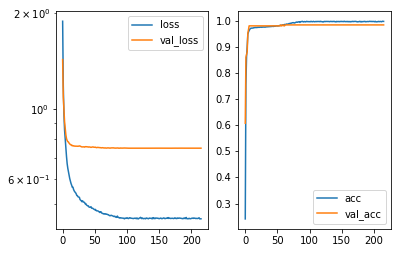

Predicted cell: Cells Probability: [[0.98390627]]
True Cell type: Cells
x [[0.57844555]]
True positional value x 0.5
y [[0.5414605]]
True positional value y 0.5


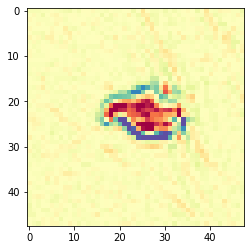

Epoch 217/250
5180/5180 [==============================] - 7s 1ms/step - loss: 0.4495 - acc: 0.9985 - val_loss: 0.7502 - val_acc: 0.9853

Epoch 00217: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47SMALL.h5
{'val_loss': 0.7501863005397084, 'val_acc': 0.9853479938629346, 'loss': 0.44949155976873567, 'acc': 0.9984555999284546, 'lr': 9.9999995e-37}


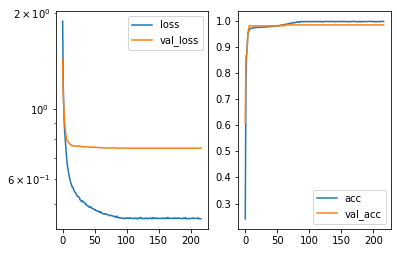

Predicted cell: Cells Probability: [[0.9901232]]
True Cell type: Cells
x [[0.73342323]]
True positional value x 0.7083333333333334
y [[0.24037449]]
True positional value y 0.7083333333333334


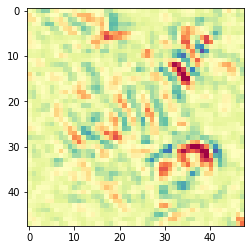

Epoch 218/250
1600/5180 [========>.....................] - ETA: 4s - loss: 0.4480 - acc: 0.9988

In [ ]:
static_model = NEATStatic(config, model_dir, model_name)

static_model.loadData()

static_model.TrainModel()
